# 1. Business Understanding

### 1.1. Context
- The real estate market is highly competitive, with property agents and brokers needing to provide accurate pricing and match clients with properties that best suit their needs. The availability of vast amounts of data offers an opportunity to leverage machine learning to improve decision-making, enhance client satisfaction, and optimize sales processes.

--

### 1.2. Problem Statement
- Who is the user facing the problem? 
    - The primary users are property agents and brokers who are responsible for evaluating property prices, advising clients, and closing deals in a competitive real estate market.
- What problem is the user facing?
    - Property agents and brokers often struggle to accurately estimate property prices, which can lead to overpricing or underpricing. Additionally, matching clients with suitable properties based on their preferences and budget is a challenge that requires a deep understanding of market trends and client behavior.
- Why does this problem need to be solved?
    - Accurate property pricing is critical to closing deals efficiently and maintaining client trust. Effective client-property matching increases the likelihood of successful transactions, thereby improving the agent’s reputation and profitability.

--

### 1.3. Objectives
- Develop a machine learning model that can accurately predict property prices based on historical data and current market conditions.
- Create a client matching algorithm that pairs clients with properties that best meet their needs, improving the efficiency and success rate of property transactions.
- Provide property agents with actionable insights into market trends, enabling them to set competitive prices and offer informed advice to clients.

--

### 1.4. Analytic Approach
- What solution design are you offering to solve the problem?
    - A. Type of question: Predictive (forecasting housing prices).
    - B. Type of ML algorithm: Supervised (e.g., Linear Regression, Random Forest Regressor).
- When and how will users use this solution?
    - Property agents and brokers will use the solution during the initial client consultation to provide accurate price estimates and suggest properties that meet the client’s criteria. Additionally, they can use the solution to stay informed about market trends and adjust their strategies accordingly.

--

### 1.5. Success Criteria
- What are the conditions of mis-prediction, and what are the consequences?
    - Regression:
        - Overprediction: Predicting higher property prices than the market can bear could lead to prolonged listing times or failed sales.
        - Underprediction: Predicting lower property prices might result in underselling, leading to lost revenue and client dissatisfaction.
- Explain the assumptions or research results from the data you will use.
    - The assumptions mean that old property data is still relevant for today’s market. It is also assumed that the selected features, such as location, property size, and market trends, correctly reflect what influences property prices. Before building the model, some research will be done to choose the right features and ensure the data is prepared correctly to maintain the model’s accuracy.

--

### 1.6. Project Limitation
- The project may be limited by the availability and quality of the data, especially in markets that change quickly where old data might not reflect current conditions. The model’s predictions will also be limited by the features used, which might not include all factors that affect property prices, such as unexpected economic changes or new policies.

---

# 2. Data Understanding

### 2.1. Data Source
- This data was initially featured in the following paper:
    - Pace, R. Kelley, and Ronald Barry. "Sparse spatial autoregressions." Statistics & Probability Letters 33.3 (1997): 291-297

--

### 2.2. Data Analysis

2.2.1. Columns
- There are 10 columns in the dataset with its unique identifier and description.


| **No** | **Column Name** | **Column Description**                                        |
|:----:|:---------------:|:-------------------------------------------------------------:|
| 1    | longitude         | A measure of how far west a house is; a higher value is farther west                     |
| 2    | latitude        | A measure of how far north a house is; a higher value is farther north                           |
| 3    | housing_median_age      | Median age of a house within a block; a lower number is a newer building                           |
| 4    | total_rooms        | Total number of rooms within a block      |
| 5    | total_bedrooms    | Total number of bedrooms within a block                  |
| 6    | population         | Total number of people residing within a block                       |
| 7    | households            | Total number of households, a group of people residing within a home unit, for a block                          |
| 8    | median_income          | Median income for households within a block of houses (measured in tens of thousands of US Dollars)                        |
| 9    | ocean_proximity        | Location of the house w.r.t ocean/sea                     |
| 10   | median_house_value        | Median house value for households within a block (measured in US Dollars)                |

--

2.2.2. Import Libraries

In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import plotly.express as px

from scipy.stats import spearmanr, kendalltau
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, RepeatedKFold, cross_val_score, learning_curve
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PolynomialFeatures, OneHotEncoder, FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV, cross_val_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import make_scorer

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 500)

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", message="Parameters: { 'verbose' } are not used.")

--

2.2.3. Load Data

In [3]:
data = pd.read_csv("data_california_house.csv")
data.sample(10)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
13486    -121.90     38.01                34.0       3779.0           766.0   
12052    -121.34     38.01                17.0       2033.0           452.0   
762      -118.15     33.93                34.0       1745.0           404.0   
8093     -122.48     37.79                52.0       4683.0          1055.0   
2524     -117.57     33.93                 3.0       1240.0           151.0   
10845    -121.52     38.90                32.0       1650.0           313.0   
998      -118.14     34.20                39.0       2569.0           426.0   
5520     -119.03     34.24                25.0       3655.0           545.0   
1658     -122.24     37.46                36.0       4686.0           781.0   
11482    -116.95     33.79                20.0       2399.0           546.0   

       population  households  median_income ocean_proximity  \
13486      2356.0       722.0         3.5129          INLAND   
12052      1114.0       446.0         3.2872          INLAND   
762        1084.0       410.0         3.3411       <1H OCEAN   
8093       2246.0       975.0         4.1148        NEAR BAY   
2524        519.0       146.0         7.5408          INLAND   
10845       802.0       284.0         2.9048          INLAND   
998        1282.0       432.0         5.0953          INLAND   
5520       1776.0       544.0         5.6870       <1H OCEAN   
1658       2254.0       845.0         6.1043      NEAR OCEAN   
11482      1726.0       542.0         1.8845          INLAND   

       median_house_value  
13486            110600.0  
12052            175000.0  
762              220500.0  
8093             457800.0  
2524             271900.0  
10845             98200.0  
998              207400.0  
5520             238100.0  
1658             343500.0  
11482             77700.0

--

### 2.3. Data Description

In [4]:
# Display column names to ensure they are appropriate
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


In [6]:
# Check unique count and values of each column
def unique_data(data):
    data_unique = pd.DataFrame()
    data_unique['Columns'] = data.columns
    data_unique['Unique Count'] = [data[col].nunique() for col in data.columns]
    data_unique['Unique'] = [data[col].unique() for col in data.columns]
    return data_unique

unique_data(data)

Columns  Unique Count  \
0           longitude           806   
1            latitude           836   
2  housing_median_age            52   
3         total_rooms          5227   
4      total_bedrooms          1748   
5          population          3498   
6          households          1649   
7       median_income          9797   
8     ocean_proximity             5   
9  median_house_value          3548   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Unique  
0                                                                                         [-119.79, -122.21, -118.04, -118.28, -119.81, -117.79, -117.8, -121.26, -117.65, -122.27, -121.94, -121.9, -118.15, -117.5, -121.33, -115.99, -117.09, -118.14, -120.9, -121.51, -117.32, -117.34, -121.53, -118.27, -120.84, -120.38, -118.2, -121.52, -121.09, -117.54, -119.29, -119.83, -118.12, -118.31, -118.24, -117.62, -121.95, -117.88, -117.68, -121.92, -118.85, -122.41, -117.59, -121.86, -118.02, -122.43, -122.26, -117.02, -118.26, -121.36, -119.9, -121.85, -120.85, -118.21, -121.65, -119.74, -122.03, -117.69, -122.04, -122.25, -118.43, -121.91, -124.0, -117.82, -123.98, -121.99, -120.6, -118.22, -122.05, -121.64, -117.75, -117.25, -118.29, -122.7, -121.49, -122.28, -122.02, -121.47, -117.72, -117.31, -121.38, -117.17, -119.12, -121.2, -117.22, -122.47, -118.36, -124.16, -122.42, -117.92, -124.13, -122.24, -121.8, -117.93, -120.46, -116.86, -117.28, -120.99, -117.89, -118.39, ...]  
1                                                                                                                                                                                                                                                                                                   [36.73, 37.77, 33.87, 34.06, 33.8, 33.81, 38.69, 33.48, 37.97, 37.28, 37.44, 34.05, 33.96, 38.64, 33.4, 32.68, 34.7, 38.2, 38.5, 34.14, 34.13, 38.61, 34.08, 38.77, 36.76, 33.93, 38.57, 38.68, 33.82, 37.98, 36.53, 36.8, 34.09, 33.67, 34.11, 38.31, 33.77, 35.63, 37.3, 34.21, 37.37, 37.6, 33.91, 37.32, 33.65, 37.71, 33.97, 37.88, 32.7, 33.94, 34.19, 38.67, 36.94, 38.0, 37.06, 36.71, 39.13, 34.44, 37.39, 37.36, 37.84, 34.22, 34.02, 33.71, 37.29, 40.22, 33.68, 40.88, 37.26, 33.95, 37.93, 36.68, 33.21, 34.17, 38.36, 38.58, 36.97, 37.9, 37.53, 33.51, 34.35, 32.77, 35.39, 33.84, 39.25, 34.26, 37.51, 35.6, 34.07, 40.79, 38.27, 33.63, 40.8, 37.59, 37.75, 34.03, 33.72, 38.09, 33.64, 33.05, ...]  
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

- The only categorical column:
    - ocean_proximity

--

### 2.4. Data Descriptive

In [7]:
data.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  14448.000000  14448.000000        14448.000000  14448.000000   
mean    -119.566647     35.630093           28.618702   2640.132683   
std        2.006587      2.140121           12.596694   2191.612441   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1451.000000   
50%     -118.490000     34.260000           29.000000   2125.000000   
75%     -118.000000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  32627.000000   

       total_bedrooms    population    households  median_income  \
count    14311.000000  14448.000000  14448.000000   14448.000000   
mean       538.260709   1425.157323    499.508929       3.866667   
std        423.577544   1149.580157    383.098390       1.891158   
min          1.000000      3.000000      1.000000       0.499900   
25%        295.000000    784.000000    279.000000       2.570600   
50%        435.000000   1165.000000    410.000000       3.539100   
75%        647.000000   1724.000000    604.000000       4.736100   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        14448.000000  
mean        206824.624516  
std         115365.476182  
min          14999.000000  
25%         119600.000000  
50%         180000.000000  
75%         263900.000000  
max         500001.000000

--

2.4.1. Housing Characteristics

| **Column** | **Statistic** | **Interpretation**                                        |
|:----:|:---------------:|:-------------------------------------------------------------|
| Median Age of Housing   | Mean        | 28.6 years                     |
|    | Range       | 1 year (min) to 52 years (max)                           |
|    | Support      | The dataset shows a wide variation in the age of houses, with an average (mean) age of around 28.6 years, indicating a mix of older and newer homes                           |
| Total Rooms   | Mean        | 2,640 rooms                     |
|    | Range       | 2 rooms (min) to 32,627 rooms (max)                           |
|    | Support      | The number of rooms varies greatly across different areas, with some areas having very few rooms and others having thousands, highlighting the diversity in property sizes                           |
| Total Bedrooms   | Mean        | 538 bedrooms                     |
|    | Range       | 1 bedroom (min) to 6,445 bedrooms (max)                          |
|    | Support      | The number of bedrooms also shows significant variation, further supporting the diversity in housing characteristics                           |
| Households   | Mean        | 499 households                     |
|    | Range       | 1 bedroom (min) to 6,445 bedrooms (max)                          |
|    | Support      | The dataset includes areas with a wide range of household sizes, from very small to very large communities.                         |

In [8]:
# Find the row with the minimum value for total_rooms
min_rooms_row = data[data['total_rooms'] == data['total_rooms'].min()]

# Find the row with the minimum value for total_bedrooms
min_bedrooms_row = data[data['total_bedrooms'] == data['total_bedrooms'].min()]

# Find the row with the minimum value for households
min_households_row = data[data['households'] == data['households'].min()]

# Combine the rows into a single dataframe
min_values_df = pd.concat([min_rooms_row, min_bedrooms_row, min_households_row])

# Drop duplicate rows if they exist
min_values_df = min_values_df.drop_duplicates()

# Display the combined dataframe
min_values_df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
148     -117.79     35.21                 4.0          2.0             2.0   
9191    -122.50     37.79                52.0          8.0             1.0   

      population  households  median_income ocean_proximity  \
148          6.0         2.0         2.3750          INLAND   
9191        13.0         1.0        15.0001        NEAR BAY   

      median_house_value  
148             137500.0  
9191            500001.0

--

2.4.2. Population Distribution

| **Column** | **Statistic** | **Interpretation**                                        |
|:----:|:---------------:|:-------------------------------------------------------------|
| Population   | Mean        | 1,425 people                     |
|    | Range       | 3 people (min) to 35,682 people (max)                           |
|    | Support      | Population counts vary widely, with some areas having only a few residents and others being densely populated, reflecting a broad range of community sizes                           |

In [9]:
data[data['population'] == data['population'].min()]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
4980    -118.44     34.04                16.0         18.0             6.0   

      population  households  median_income ocean_proximity  \
4980         3.0         4.0          0.536       <1H OCEAN   

      median_house_value  
4980            350000.0

- Understanding the Discrepancy:
1.	Data Entry Error:
    - The most straightforward explanation is that there may be a data entry or recording error. This is common in large datasets where occasional inconsistencies or inaccuracies can occur.
2.	Definition of Households:
    - It’s possible that the households variable in this dataset represents housing units rather than occupied households. If that’s the case, it might be possible for some housing units to be unoccupied or only partially occupied, which could lead to situations where the number of households is greater than the population.

--

2.4.3. 	Income and House Value

| **Column** | **Statistic** | **Interpretation**                                        |
|:----:|:---------------:|:-------------------------------------------------------------|
| Median Income   | Mean        | 3.87 (representing $38,700)                    |
|    | Range       | 0.50 (representing $5,000) to 15.00 (representing $150,000)                           |
|    | Support      | The median income varies significantly across areas, indicating economic diversity among the regions in the dataset                           |
| Median House Value   | Mean        | $206,825                    |
|    | Range       | $14,999 (min) to $500,001 (max)                           |
|    | Support      | House values also show substantial variation, with some properties priced very low and others reaching the maximum value in the dataset, further reflecting the economic diversity                           |

In [10]:
data[data['median_income'] == data['median_income'].min()]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
1863     -122.89     39.42                16.0        411.0           114.0   
2904     -123.32     40.43                15.0        661.0           146.0   
8215     -118.08     34.15                28.0        238.0            58.0   
8774     -118.04     33.90                36.0         15.0             5.0   
8840     -118.28     33.93                52.0        117.0            33.0   
10102    -121.01     37.65                52.0        178.0            53.0   
10244    -120.19     38.07                43.0        102.0            19.0   
12437    -122.29     37.81                46.0         12.0             4.0   

       population  households  median_income ocean_proximity  \
1863         26.0        19.0         0.4999          INLAND   
2904        131.0        57.0         0.4999          INLAND   
8215        142.0        31.0         0.4999          INLAND   
8774         15.0         6.0         0.4999       <1H OCEAN   
8840         74.0        45.0         0.4999       <1H OCEAN   
10102       152.0        62.0         0.4999          INLAND   
10244        44.0        13.0         0.4999          INLAND   
12437        18.0         7.0         0.4999        NEAR BAY   

       median_house_value  
1863              73500.0  
2904              56700.0  
8215             500001.0  
8774             162500.0  
8840              90600.0  
10102             82500.0  
10244            162500.0  
12437             67500.0

In [11]:
data[data['median_house_value'] == data['median_house_value'].min()]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
1376    -117.02     36.40                19.0        619.0           239.0   
4632    -122.74     39.71                16.0        255.0            73.0   
6572    -123.17     40.31                36.0         98.0            28.0   

      population  households  median_income ocean_proximity  \
1376       490.0       164.0         2.1000          INLAND   
4632        85.0        38.0         1.6607          INLAND   
6572        18.0         8.0         0.5360          INLAND   

      median_house_value  
1376             14999.0  
4632             14999.0  
6572             14999.0

- In the dataset, there is a row where the median income is at its lowest (0.536, likely representing $5,360), but the corresponding median house value is not the lowest. In fact, the house value is relatively high at $350,000. This situation may seem unusual, but it can be explained by several factors:
1.	Geographic Factors:
- Location Influence: 
    - The property is located <1H OCEAN (within one hour of the ocean). Proximity to desirable locations, such as coastal areas, can significantly inflate property values, even if the income levels in the area are low. People may be willing to pay a premium for properties in desirable locations regardless of the local income levels.
2.	Market Demand:
- High Demand Areas: 
    - Coastal properties often experience high demand, which drives up prices. Even in areas where the population might have lower incomes, the scarcity of available land or properties near the ocean can lead to higher prices due to competition among buyers.
3.	Property Characteristics:
- Unique or Premium Properties:
    - The specific property in this row might have characteristics that make it particularly valuable (e.g., ocean views, high-end construction, or historical significance), leading to a high market value despite being in a low-income area.
4.	Investment Potential:
- Speculative Investments:
    - Some buyers might see the property as a good investment, expecting future appreciation due to its location. This can push up prices independently of the current income levels in the area.

--

### 2.5. Categorial Data

2.5.1. Value Counts

In [12]:
data['ocean_proximity'].value_counts()

<1H OCEAN     6369
INLAND        4576
NEAR OCEAN    1879
NEAR BAY      1622
ISLAND           2
Name: ocean_proximity, dtype: int64

| **Insight** | **Interpretation**                                        |
|:---------------:|:-------------------------------------------------------------|
|Coastal Preference       | The majority of properties in the dataset are located near the ocean (<1H OCEAN, NEAR OCEAN, NEAR BAY), indicating a strong coastal preference, which is typical in regions where proximity to water is highly valued                    |
| Diverse Locations       | The dataset includes a mix of properties from different geographic settings, ranging from coastal regions to inland areas, which could contribute to a diverse range of property values and characteristics                           |

2.5.2. Handle Rarity

In [13]:
# Remove rows with the 'ISLAND' category
data = data[data['ocean_proximity'] != 'ISLAND']

--

### 2.6. Data Anomalies

2.6.1. Check Null Values

In [14]:
# Check for null values
null_values = data.isnull().sum()
print(null_values)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64


2.6.2. Handle Null Values
- Impute with Median (Recommended for Skewed Data):

In [15]:
# Impute missing values in 'total_bedrooms' with the median
data['total_bedrooms'].fillna(data['total_bedrooms'].median(), inplace=True)

2.6.3. Double-check Null Values

In [16]:
# Check for null values
null_values = data.isnull().sum()
print(null_values)

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64


--

2.6.4. Check Duplicated Data

In [17]:
data.duplicated().sum()

0

In [18]:
data[data.duplicated(keep=False)]

Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, ocean_proximity, median_house_value]
Index: []

--

2.6.5. Check Outliers

In [19]:
# Select only the float columns
float_columns = data.select_dtypes(include=['float64']).columns

# Initialize a dictionary to store the number of outliers for each column
outliers_dict = {}

# Loop through each float column and calculate outliers
for col in float_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR))]
    outliers_dict[col] = outliers.shape[0]

# Display the number of outliers for each column
outliers_dict

{'longitude': 0,
 'latitude': 0,
 'housing_median_age': 0,
 'total_rooms': 900,
 'total_bedrooms': 888,
 'population': 827,
 'households': 842,
 'median_income': 482,
 'median_house_value': 757}

| **Column** | **Outlier** | **Interpretation**                                        |
|:----:|:---------------:|:-------------------------------------------------------------|
| Total Rooms   | Outliers        | 900                    |
|    | Percentage       |  6.23%                            |
|    | Explanation      | Approximately 6.23% of the properties have an unusually high or low number of rooms. This might indicate the presence of very small or very large properties in the dataset                           |
| Total Bedrooms   | Outliers        | 888                    |
|    | Percentage       |  6.15%                            |
|    | Explanation      | About 6.15% of the properties have an extreme number of bedrooms, which could be due to very large homes or possible data anomalies                         |
| Population   | Outliers        | 827                    |
|    | Percentage       |  5.72%                            |
|    | Explanation      | Around 5.72% of the areas have an unusually high or low population, indicating that some regions might be very sparsely or densely populated compared to the norm                        |
| Households   | Outliers        | 842                    |
|    | Percentage       |  5.83%                            |
|    | Explanation      | Approximately 5.83% of the data points have an extreme number of households. This might correlate with the outliers in the population and total_rooms columns                      |
| Median Income   | Outliers        | 482                    |
|    | Percentage       |  3.34%                            |
|    | Explanation      | About 3.34% of the regions have an extreme median income, either very low or very high, indicating economic diversity or data anomalies                      |
| Median House Value   | Outliers        | 757                    |
|    | Percentage       |  5.24%                            |
|    | Explanation      | Approximately 5.24% of the properties have extreme values for median_house_value, which could be attributed to high-value coastal properties or very low-value inland properties                     |

- The identified outliers in the dataset, could potentially be handled later to ensure more robust machine learning models. Addressing these outliers—whether by treating them, transforming the data, or using algorithms that are less sensitive to outliers—may improve the accuracy and reliability of the model’s predictions.

2.6.6. Check Data Distribution

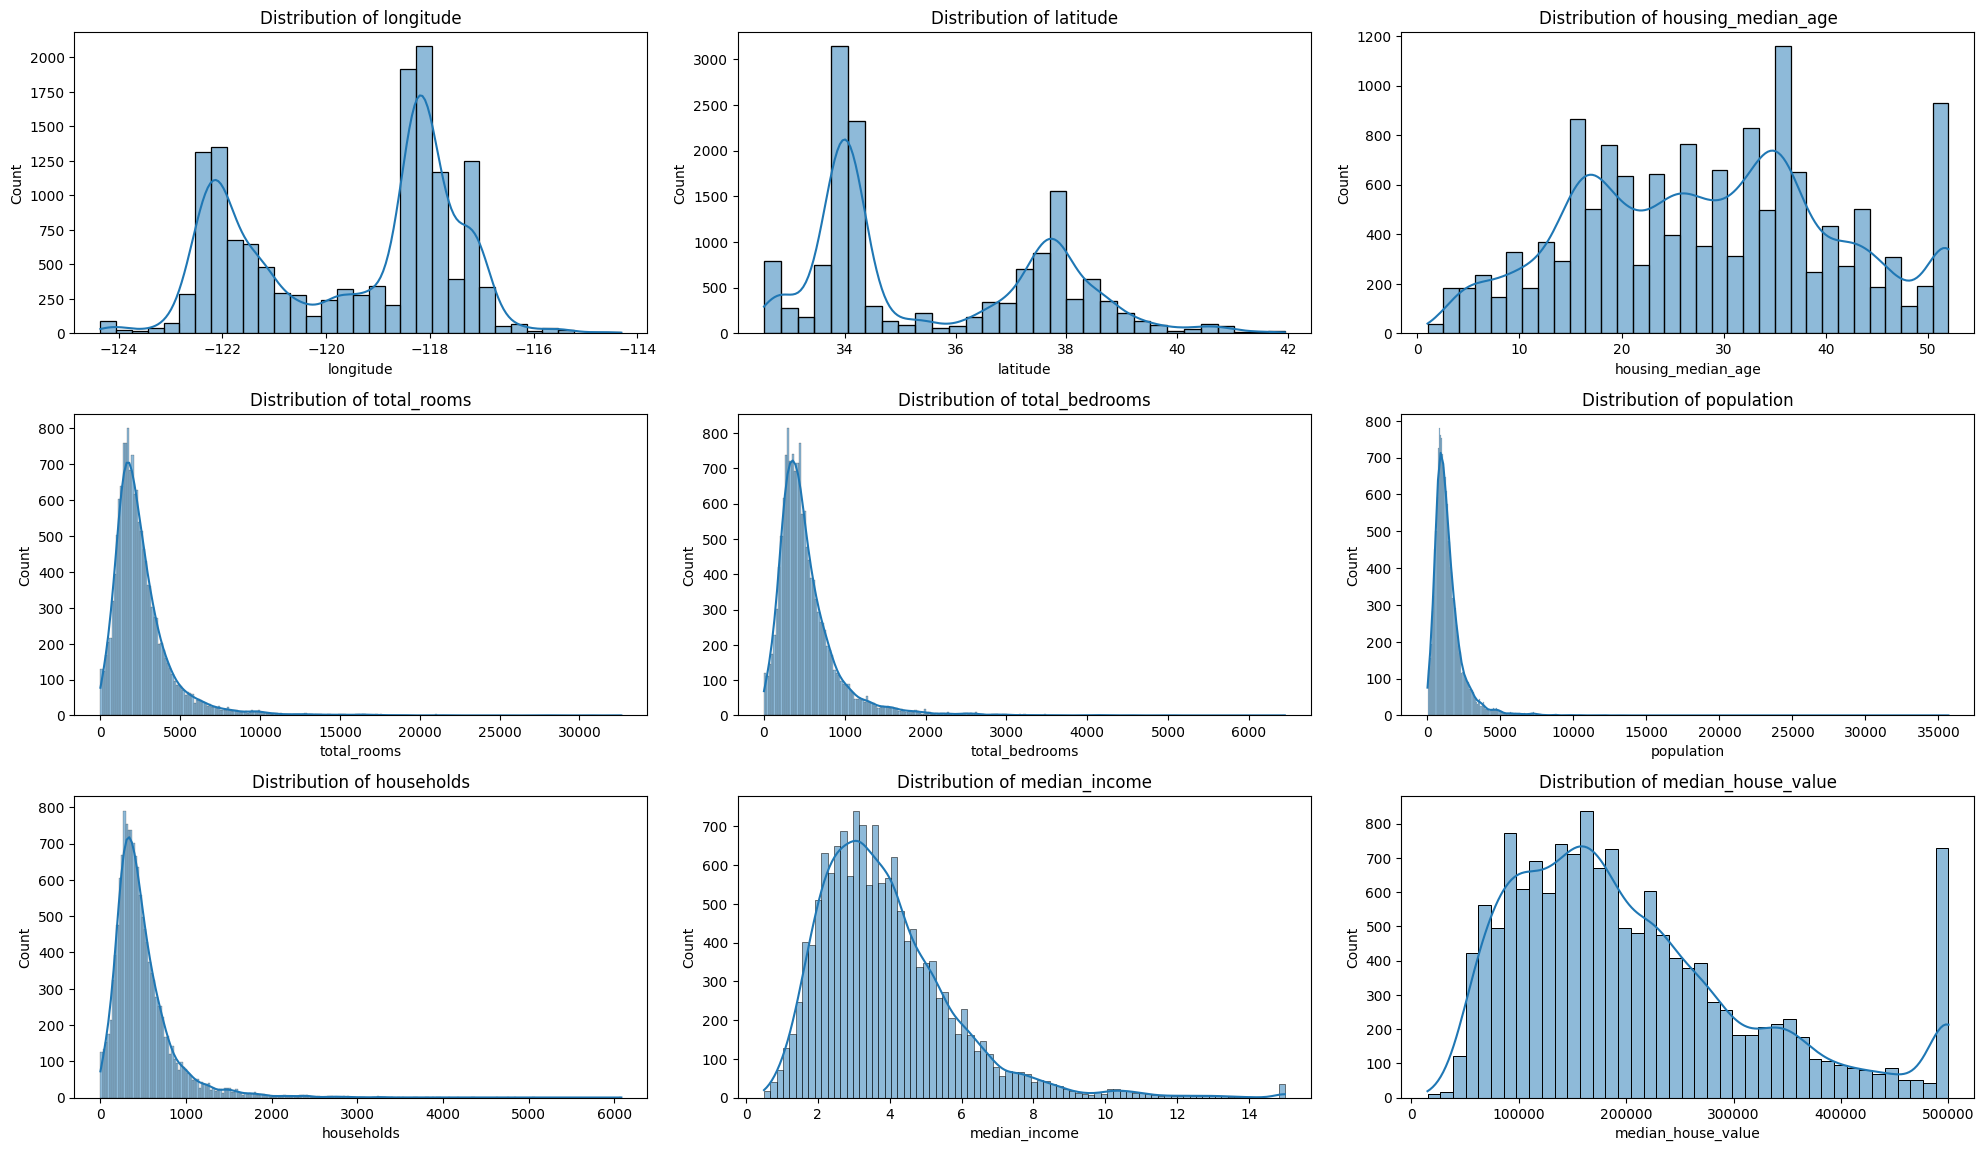

In [20]:
# Data distribution
def plot_data_distribution(data):
    numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
    plt.figure(figsize=(20, 15))
    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(4, 3, i)
        sns.histplot(data[col], kde=True)
        plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

# Plotting data distribution
plot_data_distribution(data)

- Key Insights:

| **Insight** | **Interpretation**                                        |
|:---------------:|:-------------------------------------------------------------|
|Skewed Distributions       | Several variables (total_rooms, total_bedrooms, population, households, median_income, and median_house_value) show skewed distributions, indicating that most values are concentrated at the lower end, with some extreme outliers                    |
| Diverse Property Characteristics       | The variation in housing age and the skewed distributions of property features like rooms and bedrooms reflect the diversity of properties in the dataset, from small homes to very large estates                    |
| Income and House Value Relationship       | The distribution of median income and house values suggests that while most properties are within a certain price range, there are some high-value properties, possibly reflecting desirable locations or unique property features                           |

--

### 2.7. Scatter Plot Location

2.7.1. Raw Scatter Plot

<Axes: xlabel='longitude', ylabel='latitude'>

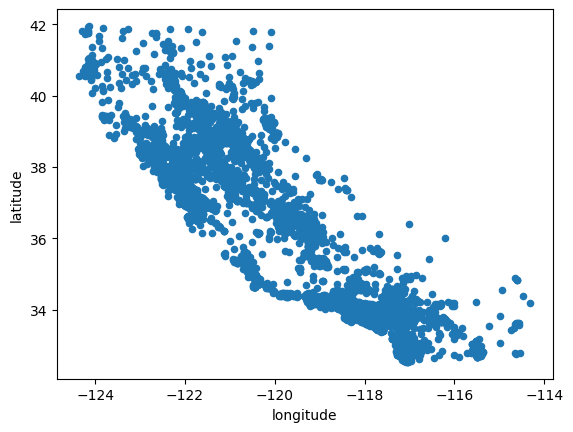

In [21]:
data.plot(kind='scatter', x='longitude', y='latitude')

2.7.2. Better Scatter Plot

<Axes: xlabel='longitude', ylabel='latitude'>

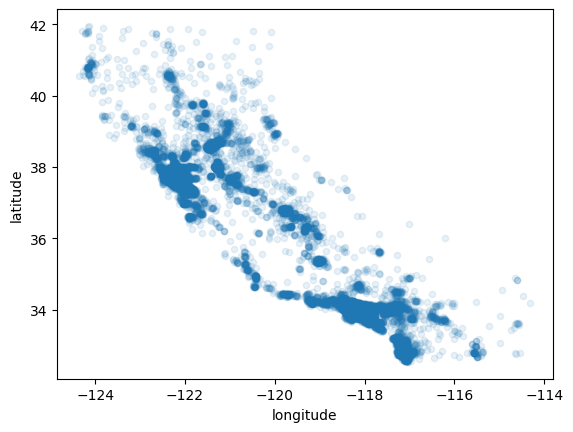

In [22]:
data.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

---

# 3. Exploratory Data Analysis

### 3.1. Data Correlation

3.1.1. Heatmap

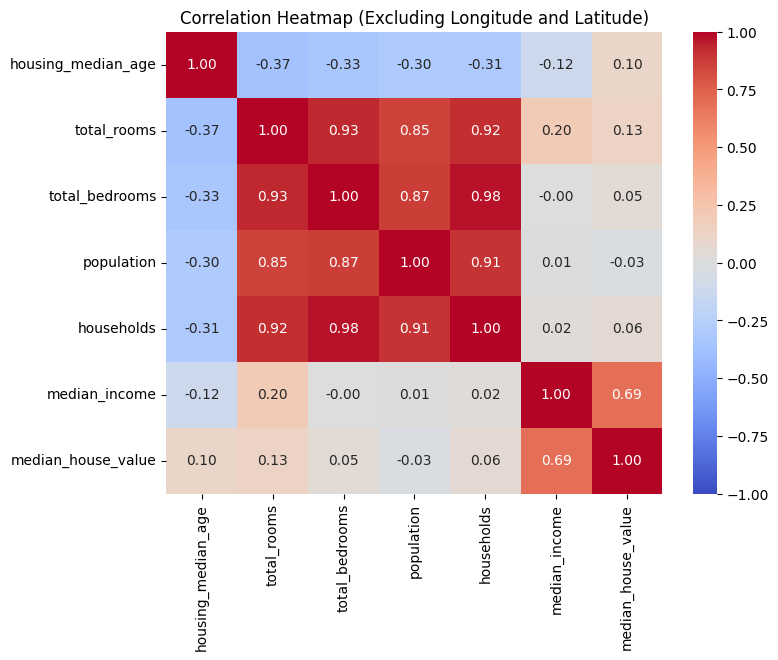

In [23]:
# Exclude 'longitude' and 'latitude' columns
selected_columns = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

# Calculate correlation matrix for the selected columns
correlation_matrix = data[selected_columns].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap (Excluding Longitude and Latitude)')
plt.show()

- This heatmap reveals strong positive correlations between total_rooms, total_bedrooms, population, and households, with correlation coefficients ranging from 0.85 to 0.98.
- These variables are closely related, likely because they all measure aspects of property size and community density.
- Additionally, median_income shows a moderate positive correlation with median_house_value (0.69), indicating that higher income areas tend to have higher property values. These relationships are significant and can be important predictors in modeling property prices.

--

3.1.2. Statistical Tests Correlation For Low Correlation Columns

In [24]:
import pandas as pd
from scipy.stats import spearmanr, kendalltau

# List of pairs with low correlations to test
low_corr_pairs = [
    ('housing_median_age', 'median_house_value'),
    ('total_rooms', 'median_income'),
    ('total_bedrooms', 'median_house_value'),
    ('population', 'median_house_value'),
    ('households', 'median_house_value'),
]

# Dictionary to store results for Spearman and Kendall
spearman_results = {}
kendall_results = {}

# Perform Spearman and Kendall correlation tests
for pair in low_corr_pairs:
    spearman_corr, spearman_p_value = spearmanr(data[pair[0]], data[pair[1]])
    kendall_corr, kendall_p_value = kendalltau(data[pair[0]], data[pair[1]])
    
    spearman_results[pair] = {'spearman_corr': spearman_corr, 'spearman_p_value': spearman_p_value}
    kendall_results[pair] = {'kendall_corr': kendall_corr, 'kendall_p_value': kendall_p_value}

# Convert the results into DataFrames
spearman_df = pd.DataFrame(spearman_results).T
kendall_df = pd.DataFrame(kendall_results).T

In [25]:
spearman_df

spearman_corr  spearman_p_value
housing_median_age median_house_value       0.071909      5.003942e-18
total_rooms        median_income            0.271077     1.011916e-241
total_bedrooms     median_house_value       0.081205      1.434753e-22
population         median_house_value      -0.001521      8.549883e-01
households         median_house_value       0.108335      5.705029e-39

In [26]:
kendall_df

kendall_corr  kendall_p_value
housing_median_age median_house_value      0.047868     1.754132e-17
total_rooms        median_income           0.183345    1.881396e-239
total_bedrooms     median_house_value      0.054304     1.511274e-22
population         median_house_value     -0.001314     8.130851e-01
households         median_house_value      0.072397     8.753323e-39

- Summary:
    - This analysis highlights that while there may be some significant correlations, their practical impact is limited.
    - It is quite similar to what have the heatmap shown.

--

### 3.2. Explore Feature and Target Relationships
- Objective: Understand how individual features impact the target variable (median_house_value).
- Approach:
    - Generate scatter plots, box plots, or other visualizations to explore relationships between features and the target variable
    - Consider the potential use of advanced techniques like clustering to identify groups within the data that share similar characteristics and analyze their impact on house values

3.2.1. Scatter Plot for median_income vs. median_house_value
- Purpose: 
    - To observe the trend between income and house values. Typically, higher income is associated with higher house values.

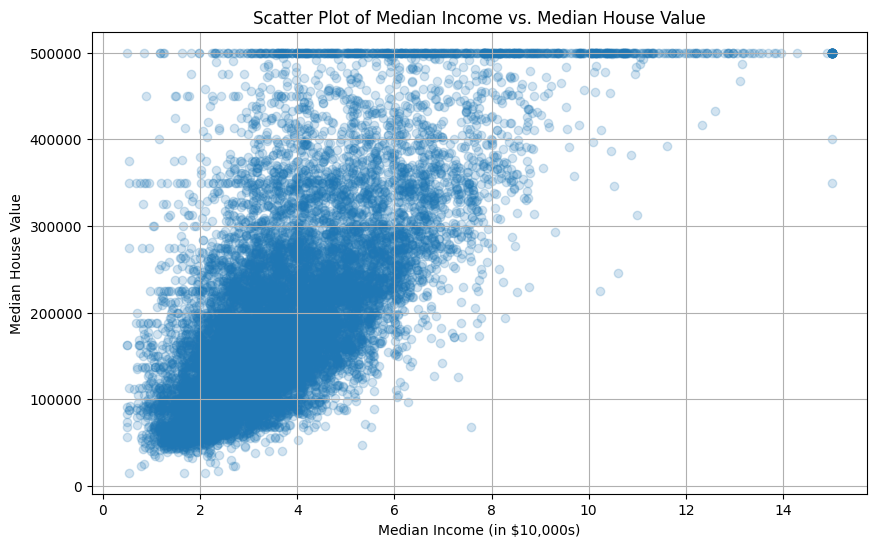

In [27]:
# Scatter plot of median_income vs. median_house_value
plt.figure(figsize=(10, 6))
plt.scatter(data['median_income'], data['median_house_value'], alpha=0.2)
plt.title('Scatter Plot of Median Income vs. Median House Value')
plt.xlabel('Median Income (in $10,000s)')
plt.ylabel('Median House Value')
plt.grid(True)
plt.show()

- Analysis:

| **Analysis** | **Interpretation**                                        |
|:---------------:|:-------------------------------------------------------------|
| Positive Correlation       | There is a clear positive correlation between median_income and median_house_value. As median income increases, the median house value also tends to increase. This relationship is intuitive, as higher income levels generally lead to higher purchasing power, enabling people to afford more expensive homes                    |
| Ceiling Effect at $500,000       | There is a noticeable horizontal line at the $500,000 mark, indicating a cap on median_house_value. This suggests that the dataset may have a maximum recorded value for house prices, possibly due to a data collection or reporting limit. Many homes have values clustered at this upper limit, which could distort some analyses if not accounted for                    |
| Distribution of Data Points       | The majority of data points are concentrated in the lower left section of the plot, where both income and house values are relatively low. This suggests that a significant portion of the population falls within lower income brackets, correlating with more affordable housing                           |
|      | There are fewer data points as income increases, with a wider spread of house values. This indicates more variability in house prices as income levels rise                           |

--

3.2.2. Distribution of Median House Values

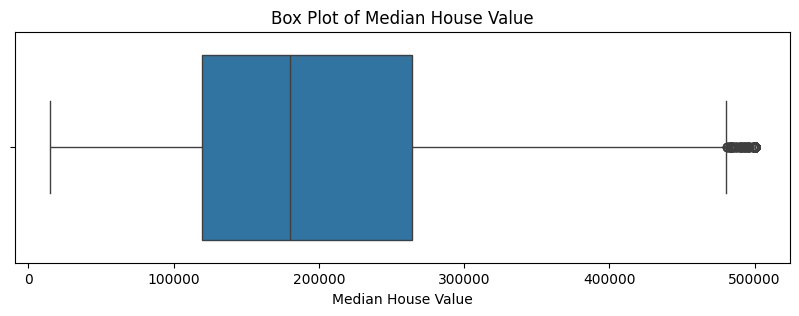

In [28]:
# Box plot for 'median_house_value'
plt.figure(figsize=(10, 3))
sns.boxplot(x=data['median_house_value'])
plt.title('Box Plot of Median House Value')
plt.xlabel('Median House Value')
plt.show()

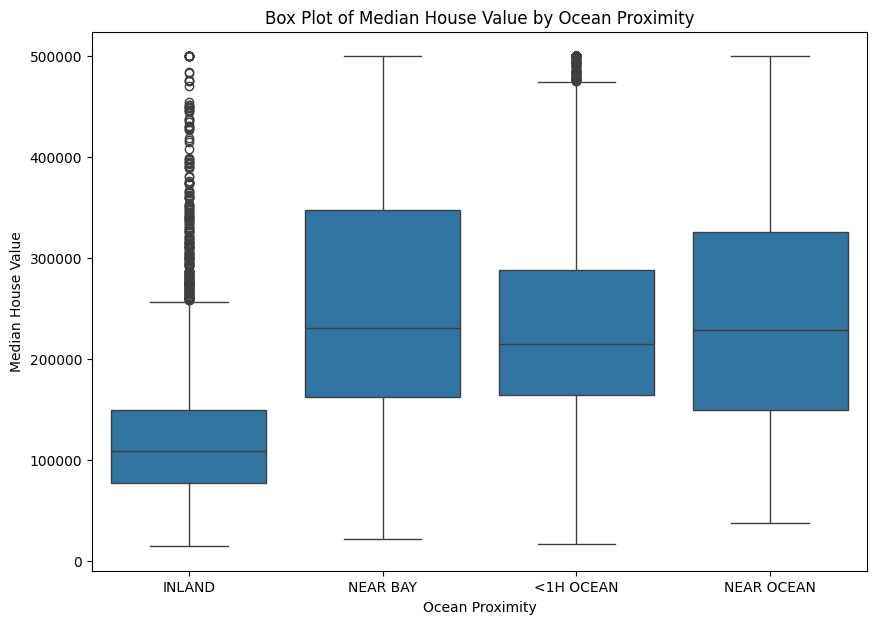

In [29]:
# Box plot for 'median_house_value' by 'ocean_proximity'
plt.figure(figsize=(10, 7))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=data)
plt.title('Box Plot of Median House Value by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.show()

- Key Insights:

| **Insight** | **Interpretation**                                        |
|:---------------:|:-------------------------------------------------------------|
|Impact of Proximity to Water       | Proximity to water (ocean, bay, or being on an island) significantly increases property values. Inland properties are generally less valuable, while those near water or on islands command higher prices                    |
| Variation in Property Values       | There is considerable variation in property values within each category, especially for inland and near-ocean properties. This could be due to differences in property size, amenities, or specific location factors                    |
| Outliers       | Inland properties have the most significant number of outliers, indicating that while most properties are less expensive, there are some high-value exceptions, likely due to specific desirable characteristics                           |

- These insights highlight the importance of location, especially proximity to water, in determining property values. The outliers in the inland category suggest that even in generally less expensive areas, certain properties can achieve much higher prices, possibly due to unique features.

--

3.2.3. Population and Median House Value Scatter Plot

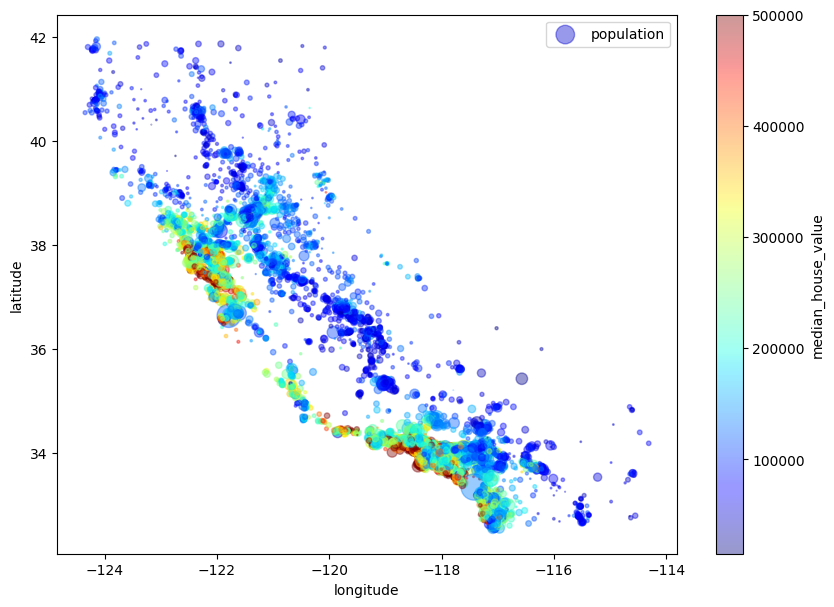

In [30]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, 
        s= data["population"]/100, label="population", figsize=(10,7),
        c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
sharex=False)
plt.legend()

- The scatter plot reveals distinct patterns and areas with varying house prices. 
- Generally, house prices increase as properties are located closer to the ocean and in densely populated regions. Applying a clustering algorithm could help identify the main clusters, which could lead to creating new features that measure proximity to these cluster centers. 
- The ocean_proximity attribute might also be beneficial, although in Northern California, coastal districts don’t always have the highest prices, indicating that location alone doesn’t fully determine property value.

--

3.2.4. Ceiling Effects Analysis

In [31]:
# Count the number of rows where median_house_value is capped at $500,000
capped_values_count = data[data['median_house_value'] == 500000].shape[0]

# Display the result
print(f"Number of rows with capped values at $500,000: {capped_values_count}")

Number of rows with capped values at $500,000: 18


In [32]:
# Filter rows with capped median_house_value
capped_rows = data[data['median_house_value'] == 500000]

# Summary statistics for capped rows
capped_rows_summary = capped_rows.describe()

# Display the summary
capped_rows_summary

longitude   latitude  housing_median_age  total_rooms  total_bedrooms  \
count   18.000000  18.000000           18.000000    18.000000       18.000000   
mean  -120.461111  35.908889           37.944444  2195.611111      545.833333   
std      2.223600   1.968669           13.527628  1194.100210      358.113234   
min   -122.490000  33.190000           19.000000   352.000000       41.000000   
25%   -122.437500  34.002500           26.750000  1630.000000      366.750000   
50%   -122.130000  37.050000           33.500000  2189.500000      422.000000   
75%   -118.230000  37.767500           52.000000  2596.000000      613.250000   
max   -117.380000  37.800000           52.000000  5283.000000     1330.000000   

        population   households  median_income  median_house_value  
count    18.000000    18.000000      18.000000                18.0  
mean   1014.166667   500.555556       3.875456            500000.0  
std     696.184750   317.814823       1.239169                 0.0  
min      99.000000    34.000000       1.265600            500000.0  
25%     751.250000   356.250000       3.311225            500000.0  
50%     859.000000   414.000000       3.825400            500000.0  
75%    1054.000000   576.750000       4.673800            500000.0  
max    2667.000000  1269.000000       5.840800            500000.0

In [33]:
# Summary statistics for the full dataset
full_dataset_summary = data.describe()

# Display the summary for comparison
full_dataset_summary

longitude      latitude  housing_median_age   total_rooms  \
count  14446.000000  14446.000000        14446.000000  14446.000000   
mean    -119.566807     35.630404           28.617057   2640.285339   
std        2.006679      2.140106           12.596064   2191.704433   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1451.000000   
50%     -118.490000     34.260000           29.000000   2125.000000   
75%     -118.000000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  32627.000000   

       total_bedrooms    population    households  median_income  \
count    14446.000000  14446.000000  14446.000000   14446.000000   
mean       537.300222   1425.249273    499.536273       3.866826   
std        421.703530   1149.626251    383.114853       1.891240   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    784.000000    279.000000       2.570400   
50%        435.000000   1165.000000    410.000000       3.539100   
75%        645.000000   1724.000000    604.000000       4.736100   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        14446.000000  
mean        206804.650076  
std         115358.542671  
min          14999.000000  
25%         119600.000000  
50%         179950.000000  
75%         263800.000000  
max         500001.000000

- Conclusion:

    - The analysis shows that capped values, though few, represent properties in potentially older and more established neighborhoods. These properties are not necessarily in areas with the highest incomes, indicating that other factors (e.g., location, demand, and scarcity) might be driving the high prices.

--

3.2.5. Explanation for Not Mitigating the Ceiling Effect

- In this analysis, the decision was made not to mitigate the ceiling effect present in the median_house_value at $500,000. Instead, the focus is on using the median for feature engineering and other modeling steps. This approach was chosen for the following reasons:

    1.	Robustness Against Outliers:
        - The median is less sensitive to outliers and extreme values, such as the capped house values at $500,000. By relying on the median, the model remains robust and reduces the influence of these extreme values, ensuring more reliable insights from the data.
    2.	Simplicity and Consistency:
        - Avoiding additional steps to mitigate the ceiling effect allows the analysis to proceed in a straightforward manner. This approach ensures consistency across the dataset and avoids introducing complexity that might complicate the interpretation of results.
    3.	Representation of Real-World Conditions:
        - The ceiling effect at $500,000 likely reflects real-world market conditions, such as reporting limits or demand saturation in certain areas. By retaining the original data distribution, the analysis maintains its alignment with these real-world phenomena.
    4.	Focus on Median-Based Insights:
        - Given the skewed nature of the data, using the median as the central tendency measure throughout the analysis helps provide a more accurate representation of typical values, minimizing the impact of extreme data points on the overall model.
    
- Future Consideration:
    - As the analysis progresses, especially during model evaluation, the decision to not mitigate the ceiling effect will be revisited if significant issues arise in predicting high-value properties. Adjustments may be made post-modeling if necessary to ensure accurate predictions across all property values.

---

# 4. Data Preparation

### 4.1. Data Preprocessing

4.1.1. Correlation Matrix and Heatmap

median_house_value    1.000000
median_income         0.693481
total_rooms           0.132051
housing_median_age    0.103656
households            0.061655
total_bedrooms        0.045661
population           -0.026109
longitude            -0.045887
latitude             -0.143803
Name: median_house_value, dtype: float64


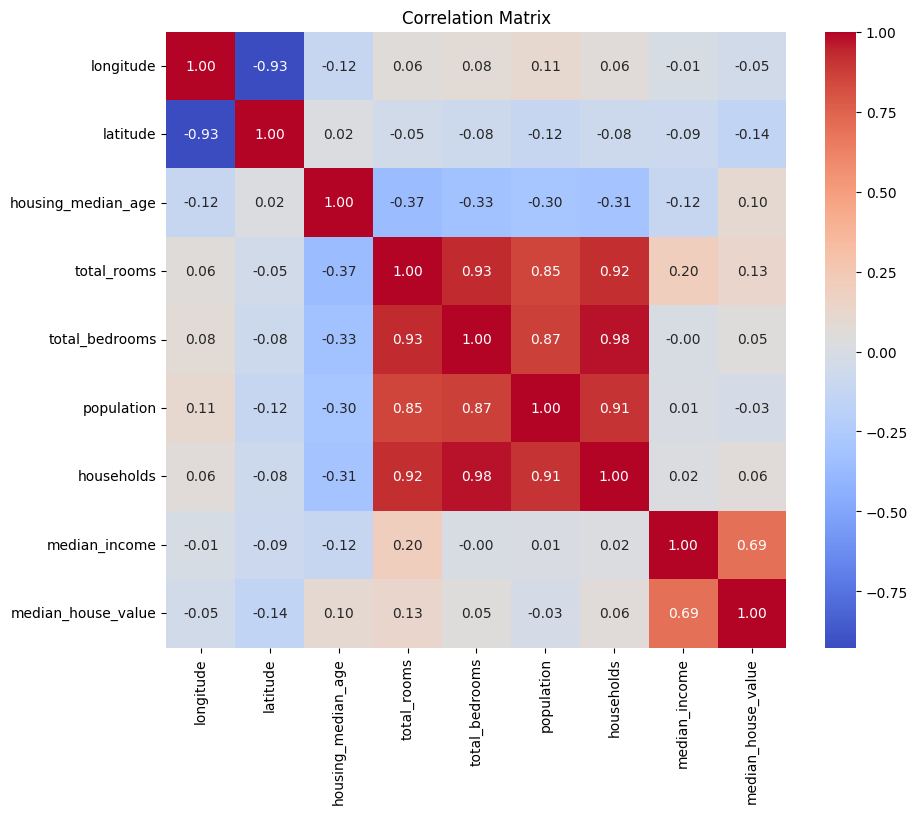

In [34]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Display the correlation with respect to the target variable
print(correlation_matrix['median_house_value'].sort_values(ascending=False))

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

- Correlation Matrix Key Observations:

1.	Median Income:
    - Has the strongest positive correlation with median_house_value at 0.69. This suggests that higher incomes are generally associated with higher house values.
2.	Total Rooms:
    - Shows a weak positive correlation with median_house_value at 0.13. This implies that as the number of rooms increases, the house value might slightly increase, but the relationship is not strong.
3.	Housing Median Age:
    - Also has a weak positive correlation with median_house_value at 0.10, indicating a slight relationship between older houses and house value.
4.	Households, Total Bedrooms, and Population:
    - These features show very weak correlations with median_house_value, with values close to 0. This indicates that these features may not be very predictive of house values.
5.	Longitude and Latitude:
    - Both have weak negative correlations with median_house_value, especially latitude (-0.14). This suggests that geographic location (as measured by these coordinates) has a minimal, but somewhat negative impact on house value.

- Next Steps:

    - Given the weak correlations observed, especially for features like total_bedrooms, population, and households, it might be worth considering further statistical tests, like Spearman and Kendall tests, to confirm the relevance of these features.

- Heatmap Key Observations:

1.	Strong Correlations Among Some Features:
    - There are strong positive correlations between total_rooms, total_bedrooms, population, and households. For example:
        - total_rooms and total_bedrooms have a very high correlation (around 0.93).
        - population and households also show a strong positive correlation (around 0.91).
            - This suggests that these features might be capturing similar aspects of housing density or size, potentially leading to multicollinearity issues in some models.
2.	Median Income as a Significant Predictor:
    - median_income has a relatively strong positive correlation with median_house_value (around 0.69). 
        - This suggests that median_income is likely a significant predictor of housing prices, which aligns with expectations—higher income areas typically have higher property values.
3.	Weak or Minimal Correlations:
    - Features like housing_median_age, total_rooms, and households have weak positive correlations with median_house_value.
        - These weak correlations suggest that these features might not be as impactful in predicting house values individually.
    - population shows a very weak negative correlation with median_house_value, indicating it might not be a strong predictor.
4.	Overall Interpretation:
    - The heatmap shows that median_income stands out as a strong predictor, while other features might contribute less individually but could still play a role in combination.
    - The strong correlations among features related to housing size and density suggest a need to carefully consider their inclusion to avoid redundancy in the model.

--

4.1.2. Spearman and Kendall Correlation Tests

In [35]:
# List of additional features to test (those with weak correlations from the heatmap)
additional_features = ['total_bedrooms', 'population', 'households']

# Dictionary to store results
spearman_results = {}
kendall_results = {}

# Perform Spearman and Kendall correlation tests
for feature in additional_features:
    spearman_corr, spearman_p_value = spearmanr(data[feature], data['median_house_value'])
    kendall_corr, kendall_p_value = kendalltau(data[feature], data['median_house_value'])
    
    spearman_results[feature] = {'spearman_corr': spearman_corr, 'spearman_p_value': spearman_p_value}
    kendall_results[feature] = {'kendall_corr': kendall_corr, 'kendall_p_value': kendall_p_value}

# Convert results to DataFrame for display
spearman_df = pd.DataFrame(spearman_results).T
kendall_df = pd.DataFrame(kendall_results).T

In [36]:
spearman_df

spearman_corr  spearman_p_value
total_bedrooms       0.081205      1.434753e-22
population          -0.001521      8.549883e-01
households           0.108335      5.705029e-39

- total_bedrooms: 
    - Shows a weak positive correlation with median_house_value (0.081205) with a very significant p-value, indicating that while the relationship is weak, it is statistically significant.
- population: 
    - Has a near-zero correlation (-0.001521) with median_house_value and an insignificant p-value, suggesting no meaningful relationship.
- households: 
    - Shows a weak positive correlation with median_house_value (0.108335) with a very significant p-value, indicating a statistically significant but weak relationship.

In [37]:
kendall_df

kendall_corr  kendall_p_value
total_bedrooms      0.054304     1.511274e-22
population         -0.001314     8.130851e-01
households          0.072397     8.753323e-39

- total_bedrooms: 
    - Similarly to the Spearman test, there is a weak positive correlation (0.054304) with a very significant p-value.
- population:
    - Also reflects a near-zero correlation (-0.001314) with an insignificant p-value, reinforcing the Spearman test’s result.
- households:
    - Shows a weak positive correlation (0.072397) with a significant p-value, consistent with the Spearman test.

- Key Insights:

| **Insight** | **Interpretation**                                        |
|:---------------:|:-------------------------------------------------------------|
|Weak Correlations       | total_bedrooms and households suggest that while these features have some relationship with median_house_value, their impact is likely minimal                    |
| Near-Zero Correlation       | population suggests it may not be a valuable predictor for median_house_value and might be considered for exclusion in feature selection                    |
| Both Tests       | onsistent in their results, confirming the relationships (or lack thereof) between these features and median_house_value                           |

--

### 4.2. Feature Engineering

4.2.1. Creating New Features

In [38]:
# 1. rooms_per_capita
data['rooms_per_capita'] = data['total_rooms'] / data['population']

# 2. rooms_per_household
data['rooms_per_household'] = data['total_rooms'] / data['households']

# 3. Population per Room
data['population_per_room'] = data['population'] / data['total_rooms']

# 4. Income per Capita
data['income_per_capita'] = data['median_income'] / data['population']

# 5. Household Density
data['household_density'] = data['households'] / data['population']

# Display the first few rows to confirm the new features have been added correctly
data[['rooms_per_capita', 'rooms_per_household', 'population_per_room', 'income_per_capita', 'household_density']].head()

rooms_per_capita  rooms_per_household  population_per_room  \
0          0.580311             2.800000             1.723214   
1          1.216507             3.671480             0.822026   
2          1.700072             6.478022             0.588210   
3          0.825303             2.518000             1.211676   
4          1.273927             4.622754             0.784974   

   income_per_capita  household_density  
0           0.010233           0.207254  
1           0.002704           0.331340  
2           0.004541           0.262437  
3           0.000564           0.327761  
4           0.003664           0.275578

| **New Feature** | **Interpretation**                                        |
|:---------------:|:-------------------------------------------------------------|
|Rooms per Capita        | Areas with higher rooms_per_capita may be associated with higher property values, as more space per person often correlates with better living conditions and higher demand                    |
| Rooms per Household       | Homes with more rooms per household could suggest larger, potentially more expensive properties, contributing to higher median house values                    |
| Population per Room       | A higher population_per_room might indicate overcrowding, which could be associated with lower property values. Conversely, lower values might indicate more luxurious living conditions                           |
| Income per Capita        | It helps capture the economic status of an area, which is a critical factor in real estate pricing                    |
| Household Density       | Higher household density might suggest smaller households or more households in a given area, which could correlate with different property types or price ranges                    |

- Feature Engineering Reasons:
    - These features are chosen because they provide a deeper understanding of the living conditions, economic status, and demographic distribution within the dataset, which are all factors that can significantly influence property values.
    - By engineering these features, the model can capture more nuanced relationships in the data, potentially improving its predictive performance.

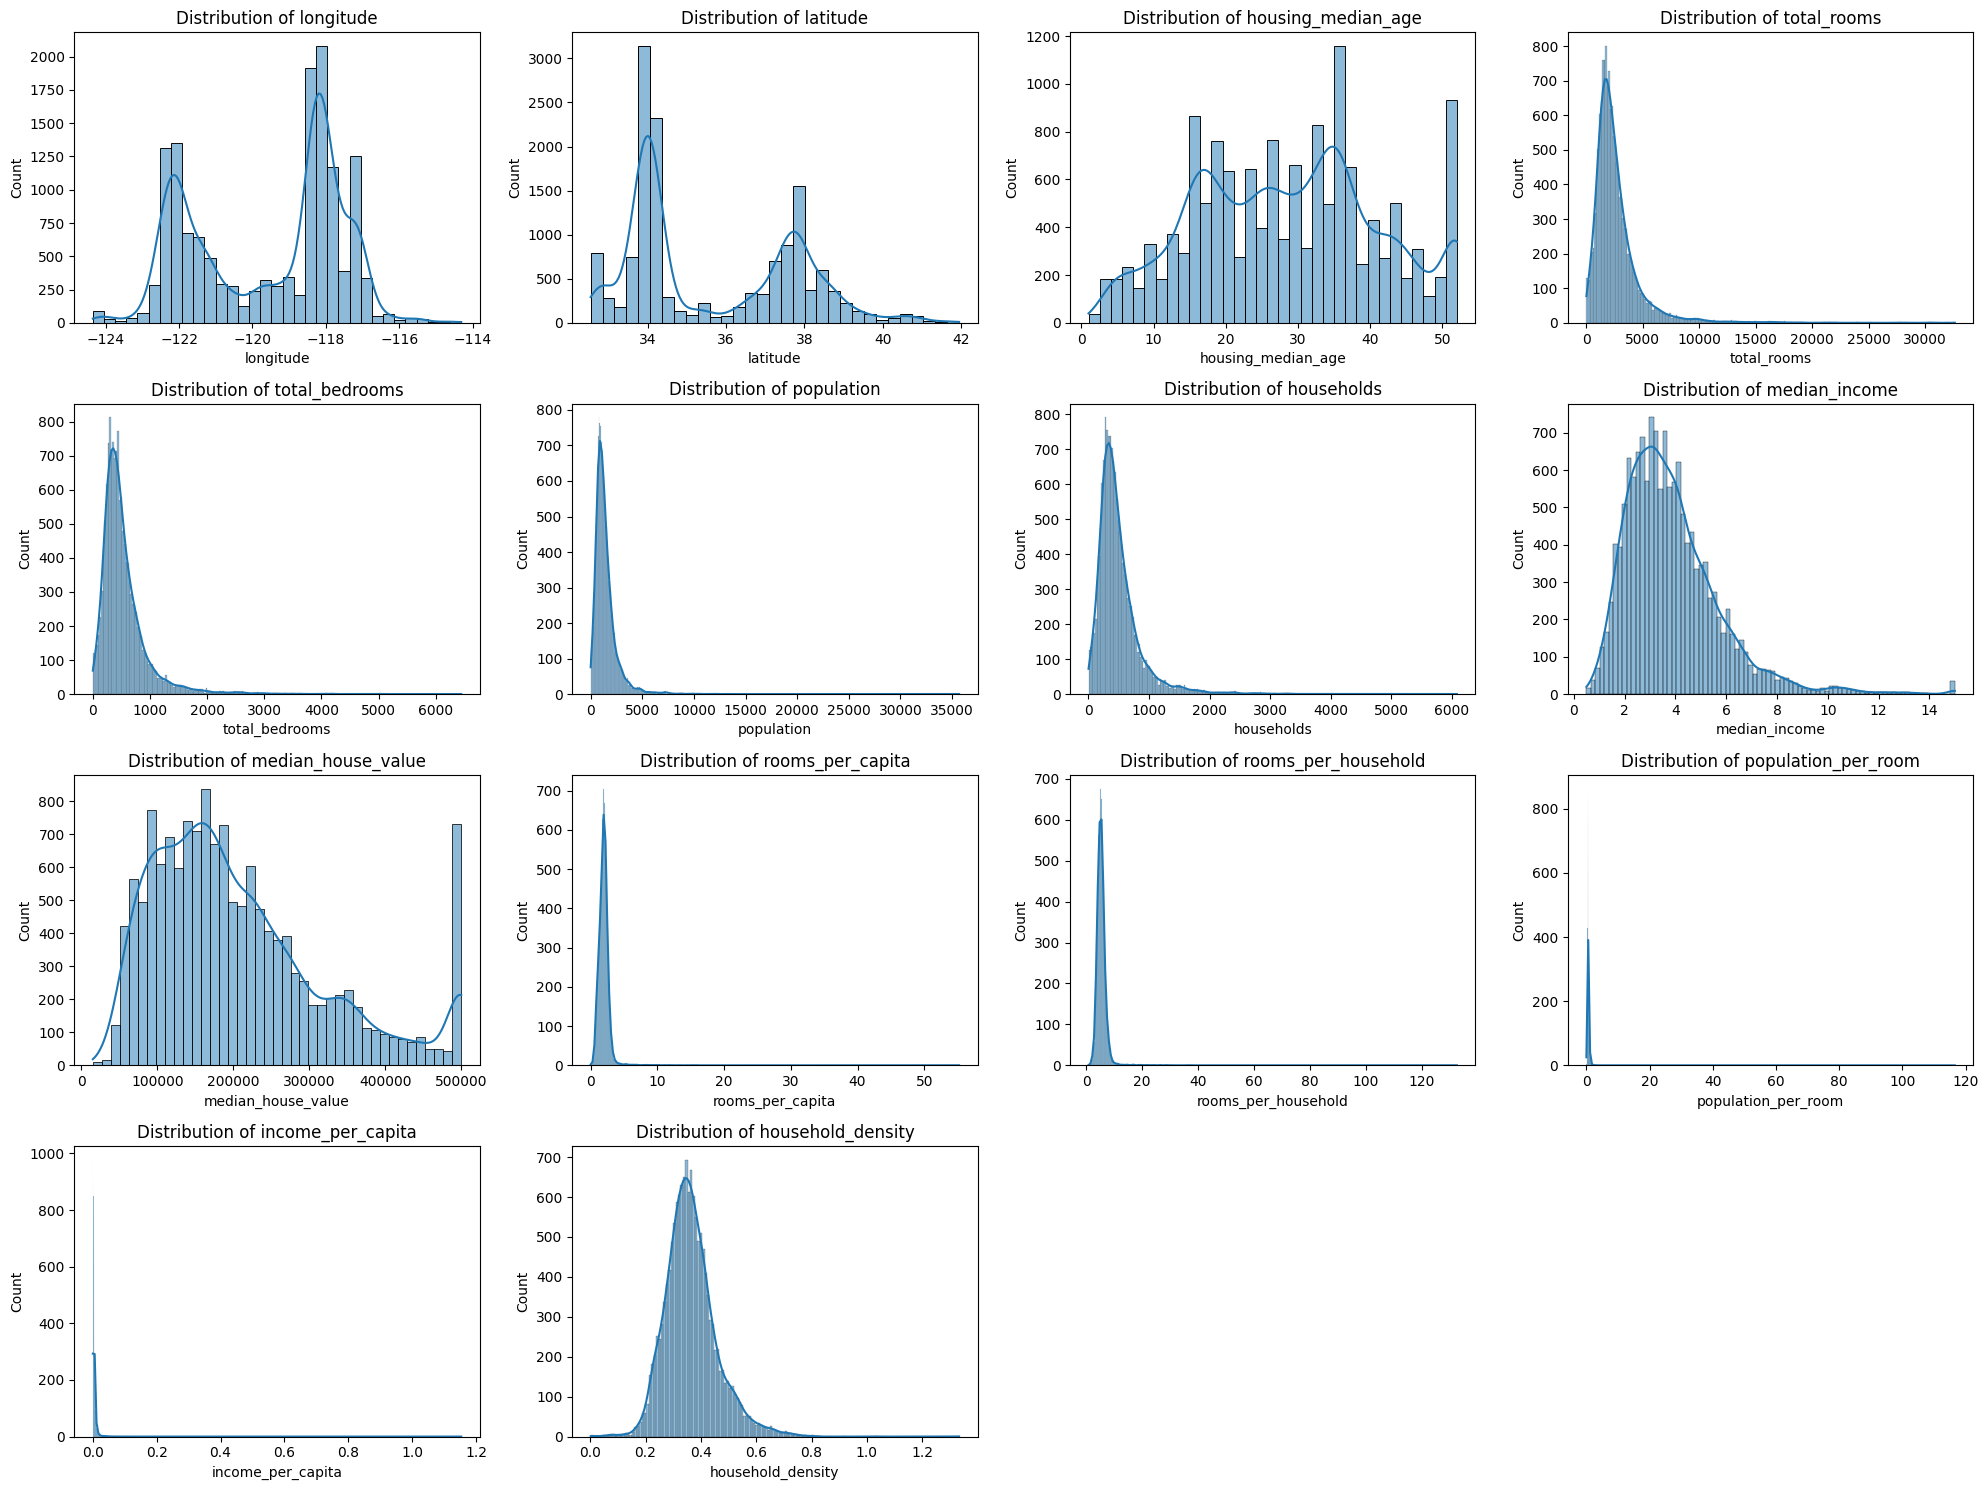

In [39]:
# Data distribution plotting function
def plot_data_distribution(data):
    numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
    fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 15))  # Adjusted to 4x4 grid
    axes = axes.flatten()  # Flatten the array of axes for easy iteration

    for i, col in enumerate(numerical_cols):
        sns.histplot(data[col], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')

    # Hide any remaining empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Plotting data distribution
plot_data_distribution(data)

--

### 4.3. Transforming the Target Variable

4.3.1. Finding the Best Scaler

In [40]:
# Define features and target
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

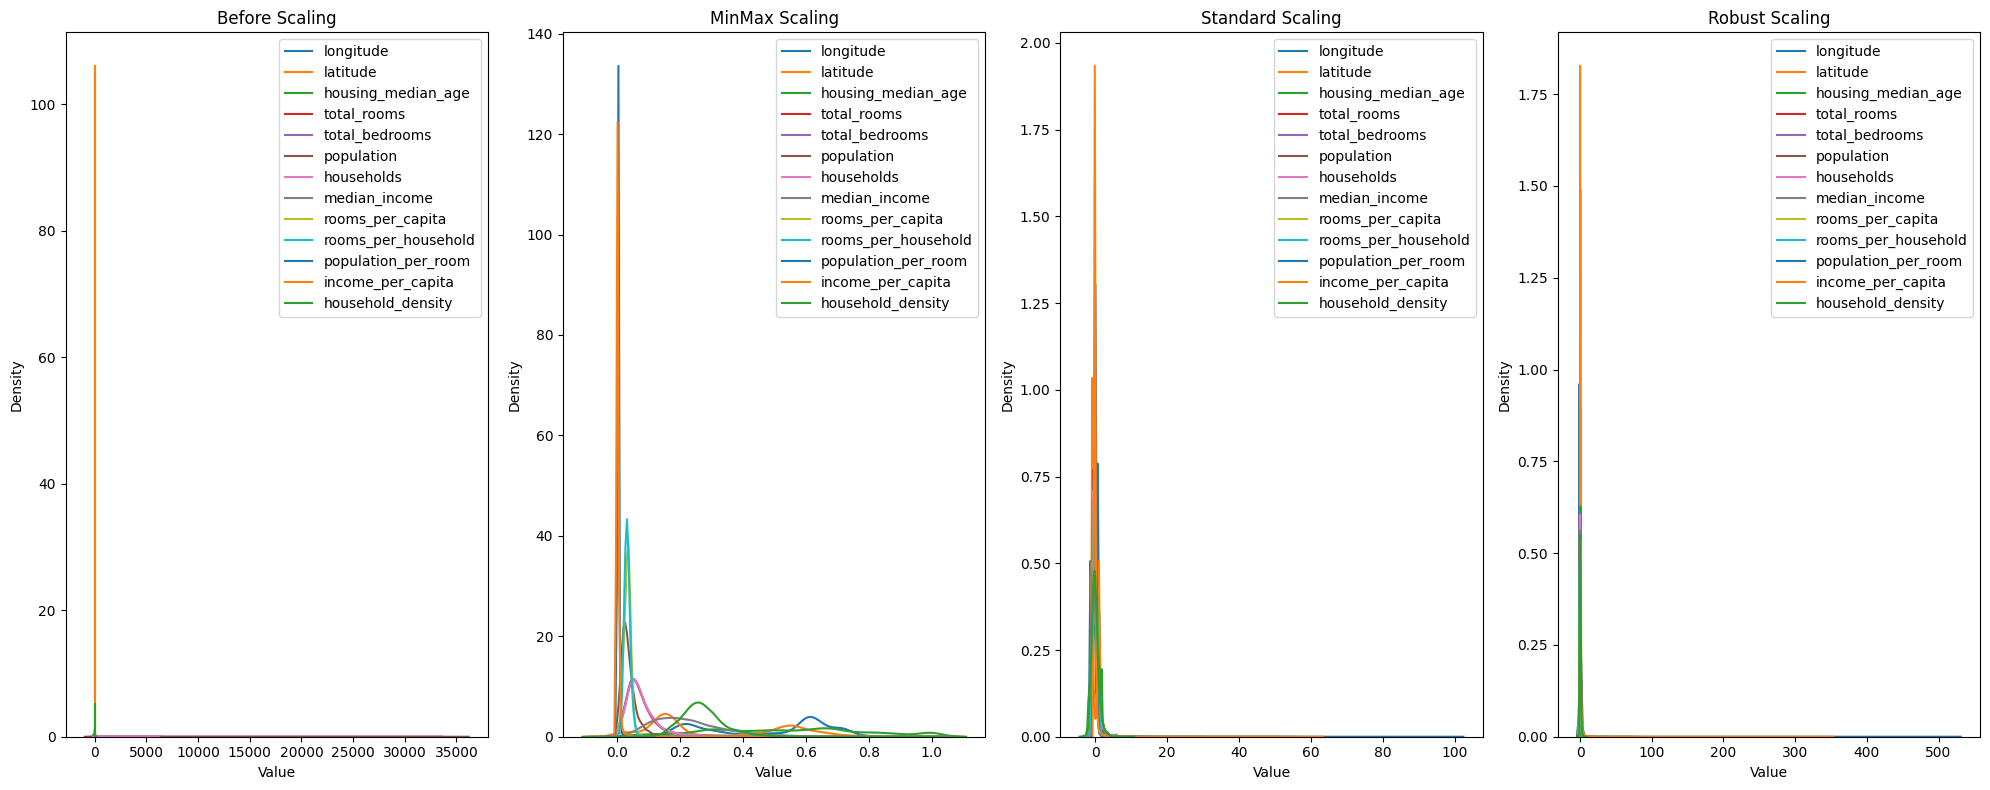

In [41]:
# Combine X_train and X_test for visualization purposes
combined_data = pd.concat([X_train, X_test], axis=0)

# Select only numeric columns
numeric_cols = combined_data.select_dtypes(include=['float64', 'int64']).columns

# Define scalers
scalers = {
    'Before Scaling': combined_data[numeric_cols],
    'MinMax Scaling': MinMaxScaler(),
    'Standard Scaling': StandardScaler(),
    'Robust Scaling': RobustScaler()
}

# Plotting
plt.figure(figsize=(20, 8))

for i, (scaler_name, scaler) in enumerate(scalers.items()):
    plt.subplot(1, 4, i + 1)

    if scaler_name == 'Before Scaling':
        scaled_data = combined_data[numeric_cols]
    else:
        scaled_data = pd.DataFrame(scaler.fit_transform(combined_data[numeric_cols]), columns=numeric_cols)

    for column in scaled_data.columns:
        sns.kdeplot(scaled_data[column], label=column)

    plt.title(scaler_name)
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [42]:
# Drop the target variable
X = data.drop(['median_house_value'], axis=1)  # assuming 'median_house_value' is the target column
y = data['median_house_value']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the log transform functions
def log_transform(x):
    return np.log1p(x)

def inverse_log_transform(x):
    return np.expm1(x)

# Define the scalers to evaluate
scalers = [
    ('StandardScaler', StandardScaler()),
    ('MinMaxScaler', MinMaxScaler()),
    ('RobustScaler', RobustScaler())
]

# Evaluate each scaler
best_scaler = None
best_score = float('inf')

for scaler_name, scaler in scalers:
    # Apply OneHotEncoder to the categorical column and the scaler to the numerical columns
    transformer = ColumnTransformer([
        ('OneHot', OneHotEncoder(handle_unknown='ignore', drop='first'), ['ocean_proximity']),
        ('Scaler', scaler, X_train.columns.drop('ocean_proximity'))  # Apply scaler only to numeric columns
    ], remainder='passthrough')
    
    # Create a pipeline with log transformation for the target variable
    estimator = Pipeline(steps=[
        ('preprocessing', transformer),
        ('model', TransformedTargetRegressor(
            regressor=RandomForestRegressor(random_state=42),
            func=log_transform,
            inverse_func=inverse_log_transform
        ))
    ])
    
    # Perform cross-validation
    cv_mae = cross_val_score(estimator, X_train, y_train, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
    mean_mae = -cv_mae.mean()
    
    print(f"{scaler_name}: Mean MAE = {mean_mae:.4f}")
    
    if mean_mae < best_score:
        best_score = mean_mae
        best_scaler = scaler_name

print(f"Best scaler: {best_scaler}")

StandardScaler: Mean MAE = 32986.1954
MinMaxScaler: Mean MAE = 32989.8295
RobustScaler: Mean MAE = 33010.5188
Best scaler: StandardScaler


--

### 4.4. Model Selection and Training

In [43]:
# Drop the target variable
X = data.drop(['median_house_value'], axis=1)  # assuming 'median_house_value' is the target column
y = data['median_house_value']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
        ('num', StandardScaler(), X_train.drop(['ocean_proximity'], axis=1).columns)
    ]
)

# Define a function for log transformation and its inverse
log_transform = np.log1p
inverse_log_transform = np.expm1

# Define models to be evaluated
models = {
    'XGBoost': XGBRegressor(),
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'LinearRegression': LinearRegression(),
    'SVR': SVR(),
    'DecisionTree': DecisionTreeRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'LightGBM': LGBMRegressor(verbose=-1),
    'ExtraTrees': ExtraTreesRegressor()
}

# Evaluate each model
results = []

for model_name, model in models.items():
    # Create a pipeline with the preprocessor and the model with TransformedTargetRegressor
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', TransformedTargetRegressor(
            regressor=model,
            func=log_transform,
            inverse_func=inverse_log_transform,
            check_inverse=False
        ))
    ])
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Predict on the training and test sets
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)
    
    # Calculate evaluation metrics
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
    mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
    
    # Append results
    results.append({
        'Model': model_name,
        'MAE Train': mae_train,
        'MAE Test': mae_test,
        'RMSE Train': rmse_train,
        'RMSE Test': rmse_test,
        'R² Train': r2_train,
        'R² Test': r2_test,
        'MAPE Train': mape_train,
        'MAPE Test': mape_test
    })

# Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(results)
results_df.set_index('Model', inplace=True)
results_df.sort_values(by='MAPE Test', ascending=True, inplace=True)

# Display the DataFrame
results_df

MAE Train      MAE Test    RMSE Train      RMSE Test  \
Model                                                                       
LightGBM          2.658190e+04  29727.778878  4.058288e+04   46312.836431   
XGBoost           1.778411e+04  30499.000727  2.705147e+04   48029.120381   
RandomForest      1.236149e+04  30872.891459  2.087759e+04   48761.160177   
ExtraTrees        1.387020e-06  31781.714194  8.320320e-05   49277.446910   
GradientBoosting  3.512714e+04  35328.511936  5.243553e+04   52769.388352   
SVR               3.437980e+04  35056.229079  5.241912e+04   52387.463612   
DecisionTree      1.833165e-10  43376.958478  8.186047e-10   67972.980498   
Ridge             4.891575e+04  48005.119525  8.226858e+04   82103.611727   
LinearRegression  4.890604e+04  47993.502992  8.224001e+04   82070.522317   
AdaBoost          5.552628e+04  53896.466923  8.207993e+04   80202.065407   
Lasso             8.854666e+04  87108.436214  1.194132e+05  117786.810627   
ElasticNet        8.854666e+04  87108.436214  1.194132e+05  117786.810627   

                  R² Train   R² Test    MAPE Train  MAPE Test  
Model                                                          
LightGBM          0.876832  0.835588  1.341411e-01   0.154934  
XGBoost           0.945274  0.823176  8.768473e-02   0.160100  
RandomForest      0.967403  0.817745  6.088485e-02   0.161677  
ExtraTrees        1.000000  0.813865  2.780830e-12   0.165943  
GradientBoosting  0.794381  0.786550  1.794942e-01   0.182144  
SVR               0.794509  0.789629  1.780858e-01   0.185209  
DecisionTree      1.000000  0.645836  6.335465e-16   0.236414  
Ridge             0.493848  0.483279  2.503393e-01   0.243978  
LinearRegression  0.494200  0.483696  2.503585e-01   0.243995  
AdaBoost          0.496167  0.506937  2.692842e-01   0.260161  
Lasso            -0.066394 -0.063468  5.209230e-01   0.510436  
ElasticNet       -0.066394 -0.063468  5.209230e-01   0.510436

- Key Observations:

	1.	LightGBM: 
		- Shows the best performance with the lowest MAPE on the test set (0.154934). It also has a strong R² score, indicating a good fit.
	2.	XGBoost: 
		- Close second, with a slightly higher MAPE but still a solid choice for further optimization.
	3.	RandomForest: 
		- Also shows competitive performance but slightly higher MAPE compared to LightGBM and XGBoost.

--

### 4.5. Feature Selection of Top 3 Models Using SelectFromModel

In [44]:
# Drop the target variable
X = data.drop(['median_house_value'], axis=1)  # assuming 'median_house_value' is the target column
y = data['median_house_value']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the log transform functions
def log_transform(x):
    return np.log1p(x)

def inverse_log_transform(x):
    return np.expm1(x)

# Define the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
        ('num', MinMaxScaler(), X_train.drop(['ocean_proximity'], axis=1).columns)
    ]
)

# Define a list of models to evaluate
models = {
    'LightGBM': LGBMRegressor(),
    'XGBoost': XGBRegressor(),
    'RandomForest': RandomForestRegressor()
}

# Initialize a list to store the feature selection results
feature_selection_results = []

# Iterate through each model
for model_name, model in models.items():
    # Create a TransformedTargetRegressor to apply log transformation
    transformed_model = TransformedTargetRegressor(
        regressor=model, 
        func=log_transform, 
        inverse_func=inverse_log_transform
    )
    
    # Create a pipeline with preprocessing and the transformed model
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', transformed_model),
    ])
    
    # Fit the pipeline
    pipeline.fit(X_train, y_train)
    
    # Perform feature selection using SelectFromModel
    selector = SelectFromModel(pipeline.named_steps['model'].regressor_, prefit=True, threshold="mean")
    
    # Apply the selector to the transformed data
    X_train_transformed = pipeline.named_steps['preprocessor'].transform(X_train)
    X_train_selected = selector.transform(X_train_transformed)
    
    # Evaluate the model with the selected features
    cv_scores = cross_val_score(transformed_model, X_train_selected, y_train, cv=5, scoring='neg_mean_absolute_percentage_error')
    
    # Get feature names after transformation (one-hot encoded)
    selected_features = np.array(pipeline.named_steps['preprocessor'].get_feature_names_out())[selector.get_support()]
    
    # Store the results in a dictionary
    feature_selection_results.append({
        'model': model_name,
        'selected_features': list(selected_features),
        'cv_scores': list(cv_scores),
        'avg_score': np.mean(cv_scores)
    })

# Convert the results to a DataFrame
results_df = pd.DataFrame(feature_selection_results)

# Display the DataFrame
results_df

model  \
0      LightGBM   
1       XGBoost   
2  RandomForest   

                                                                                                                selected_features  \
0  [num__longitude, num__latitude, num__housing_median_age, num__median_income, num__rooms_per_household, num__household_density]   
1                                                                            [onehot__ocean_proximity_INLAND, num__median_income]   
2                     [onehot__ocean_proximity_INLAND, num__longitude, num__latitude, num__median_income, num__household_density]   

                                                                                                      cv_scores  \
0   [-0.172938333801953, -0.16510024155082448, -0.1618792491496946, -0.15959706288724043, -0.16460543365001856]   
1   [-0.2871938347525291, -0.28086475942656086, -0.269395074595225, -0.26958406826996556, -0.26941036298177384]   
2  [-0.18415141483646494, -0.17115372249710228, -0.172042889867087, -0.17234146649045567, -0.16838594252957265]   

   avg_score  
0  -0.164824  
1  -0.275290  
2  -0.173615

- Key Observation:

| **Model** | **Interpretation**                                        |
|:---------------:|:-------------------------------------------------------------|
|LightGBM     | Shows the best performance after feature selection with an average MAPE score of -0.164824                 |
|  XGBoost   | Performs worse than LightGBM with an average MAPE score of -0.275290                  |
| RandomForest     | Also underperforms compared to LightGBM with an average MAPE score of -0.173635                         |

- Summary
    - Given that LightGBM continues to outperform the other models even after feature selection, it remains the best candidate for further optimization.

- Statement:

    - After performing feature selection using SelectFromModel, I’ve identified the key features for each model, as shown in the results. However, to gain deeper insights into the importance of each feature and to potentially identify more optimal subsets, I plan to further analyze the feature selection process using the Sequential Feature Selector (SFS) method. This approach will allow me to evaluate the contribution of individual features to model performance more comprehensively, enabling a more refined selection tailored to each model’s characteristics.

--

### 4.6. LightGBM

4.6.1. LightGBM Features Selection Using SFS

In [45]:
# Drop the target variable
X = data.drop(['median_house_value'], axis=1)  # assuming 'median_house_value' is the target column
y = data['median_house_value']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define log transformation functions
def log_transform(x):
    return np.log1p(x)

def inverse_log_transform(x):
    return np.expm1(x)

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
        ('num', StandardScaler(), X_train.columns.drop('ocean_proximity'))
    ]
)

# Apply the preprocessing to the data to get the feature names after transformation
preprocessor.fit(X_train)
X_train_transformed = preprocessor.transform(X_train)

# Get the feature names after preprocessing (OneHotEncoder, Scaling)
feature_names = preprocessor.get_feature_names_out()

# Define the model with log transformation
model = TransformedTargetRegressor(
    regressor=LGBMRegressor(n_estimators=5),
    func=log_transform,
    inverse_func=inverse_log_transform
)

# Perform backward feature selection
sfs = SFS(
    estimator=model,
    k_features='best',
    forward=False,
    verbose=0,
    scoring='neg_mean_absolute_percentage_error',  # Using MAPE for scoring
    cv=5
)

# Fit the SFS on the preprocessed data
sfs.fit(X_train_transformed, y_train)

# Retrieve all the scores for each feature combination
results_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T

# Map the feature indices to the original feature names
results_df['feature_names'] = results_df['feature_idx'].apply(lambda x: [feature_names[i] for i in x])

# Display the DataFrame with all feature selection scores
results_df = results_df.sort_values(by='avg_score', ascending=False)
results_df

feature_idx  \
15        (0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14, 15, 16)   
14           (0, 1, 2, 3, 4, 5, 6, 10, 11, 12, 13, 14, 15, 16)   
13              (0, 1, 2, 4, 5, 6, 10, 11, 12, 13, 14, 15, 16)   
12                 (1, 2, 4, 5, 6, 10, 11, 12, 13, 14, 15, 16)   
11                    (1, 4, 5, 6, 10, 11, 12, 13, 14, 15, 16)   
16     (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16)   
10                        (1, 4, 5, 6, 10, 11, 12, 13, 15, 16)   
7                                     (1, 4, 5, 6, 11, 12, 16)   
9                             (1, 4, 5, 6, 10, 11, 12, 13, 16)   
8                                 (1, 4, 5, 6, 11, 12, 13, 16)   
6                                        (1, 4, 5, 11, 12, 16)   
17  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16)   
5                                            (1, 4, 5, 11, 16)   
4                                               (1, 5, 11, 16)   
3                                                   (1, 5, 11)   
2                                                      (1, 11)   
1                                                        (11,)   

                                                                                                         cv_scores  \
15      [-0.3652390569825203, -0.3663816231988662, -0.3465238547086836, -0.35102828255302704, -0.3522407933448131]   
14      [-0.3652390569825203, -0.3663816231988662, -0.3465238547086836, -0.35102828255302704, -0.3522407933448131]   
13      [-0.3652390569825203, -0.3663816231988662, -0.3465238547086836, -0.35102828255302704, -0.3522407933448131]   
12      [-0.3652390569825203, -0.3663816231988662, -0.3465238547086836, -0.35102828255302704, -0.3522407933448131]   
11      [-0.3652390569825203, -0.3663816231988662, -0.3465411540658212, -0.35102828255302704, -0.3522407933448131]   
16     [-0.36529552974915014, -0.3663816231988662, -0.3465238547086836, -0.35102828255302704, -0.3522407933448131]   
10    [-0.3652605930060415, -0.3664413089009444, -0.34653977255054585, -0.35102828255302704, -0.35221448386195786]   
7     [-0.3645079684500537, -0.36732325331973337, -0.34672771837557986, -0.35065869248919357, -0.3523331487627514]   
9     [-0.3652605930060415, -0.3665733469328535, -0.34653977255054585, -0.35103948352094627, -0.35221448386195786]   
8      [-0.3652605930060415, -0.36694505145495515, -0.3464728391101696, -0.35103948352094627, -0.3520461408272097]   
6      [-0.3650938718740425, -0.3671822062058049, -0.34658696768443326, -0.35032143647469166, -0.3526074747005508]   
17     [-0.36529552974915014, -0.3663816231988662, -0.3465238547086836, -0.35154969132260633, -0.3522617315518015]   
5         [-0.3662578771613555, -0.367591861816356, -0.3463437725471182, -0.3501166142929634, -0.3526645404512774]   
4   [-0.36790180437816544, -0.36889746443387295, -0.34677184404117356, -0.35222663510567837, -0.35424923838111233]   
3       [-0.3702185589737239, -0.3743652892034572, -0.3494525773436891, -0.3576442607691087, -0.35796041209009927]   
2    [-0.38239633487342156, -0.38608369109525514, -0.36179795602039444, -0.3664873400194106, -0.36873689855888453]   
1       [-0.42475268285502205, -0.4293208669668291, -0.40498322308905815, -0.413215425443604, -0.4095448071173776]   

   avg_score  \
15 -0.356283   
14 -0.356283   
13 -0.356283   
12 -0.356283   
11 -0.356286   
16 -0.356294   
10 -0.356297   
7   -0.35631   
9  -0.356326   
8  -0.356353   
6  -0.356358   
17 -0.356402   
5  -0.356595   
4  -0.358009   
3  -0.361928   
2    -0.3731   
1  -0.416363   

                                                                                                                                                                                                                                                                                                                                                                                                                feature_names  \
15                             

- Statement:

    - While the feature selection process using Sequential Feature Selector (SFS) provides a comprehensive analysis of the best feature combinations, the inclusion of encoded features, particularly those from ocean_proximity, makes it challenging to clearly identify which features have the most significant impact on the model’s performance. The encoded categorical features add complexity to the interpretation of the results.

    - Therefore, to simplify the analysis and gain clearer insights, I plan to exclude these encoded features from the feature selection process and treat them as mandatory selected features. This will allow me to focus the feature selection on the numerical features, ensuring that the categorical feature’s impact is consistently included while simplifying the selection process for the other features.


4.6.2. LightGBM Features Selection Using SFS (Exclude ocean_proximity)

In [46]:
# Drop the target variable and ocean_proximity from feature selection
X = data.drop(['median_house_value', 'ocean_proximity'], axis=1)  # Drop 'ocean_proximity' as well
y = data['median_house_value']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define log transformation functions
def log_transform(x):
    return np.log1p(x)

def inverse_log_transform(x):
    return np.expm1(x)

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X_train.columns)  # Only apply scaler to numerical columns
    ]
)

# Apply the preprocessing to the data to get the feature names after transformation
preprocessor.fit(X_train)
X_train_transformed = preprocessor.transform(X_train)

# Get the feature names after preprocessing (Scaling)
feature_names = preprocessor.get_feature_names_out()

# Define the model with log transformation
model = TransformedTargetRegressor(
    regressor=LGBMRegressor(n_estimators=5),
    func=log_transform,
    inverse_func=inverse_log_transform
)

# Perform backward feature selection
sfs = SFS(
    estimator=model,
    k_features='best',
    forward=False,
    verbose=0,
    scoring='neg_mean_absolute_percentage_error',  # Using MAPE for scoring
    cv=5
)

# Fit the SFS on the preprocessed data
sfs.fit(X_train_transformed, y_train)

# Retrieve all the scores for each feature combination
results_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T

# Map the feature indices to the original feature names
results_df['feature_names'] = results_df['feature_idx'].apply(lambda x: [feature_names[i] for i in x])

# Display the DataFrame with all feature selection scores
results_df = results_df.sort_values(by='avg_score', ascending=False)
results_df

feature_idx  \
8                    (0, 1, 3, 4, 5, 6, 7, 11)   
7                        (0, 1, 3, 4, 5, 6, 7)   
6                           (0, 1, 3, 4, 6, 7)   
5                              (0, 1, 3, 6, 7)   
4                                 (0, 1, 3, 7)   
3                                    (0, 1, 7)   
9                 (0, 1, 3, 4, 5, 6, 7, 8, 11)   
10            (0, 1, 3, 4, 5, 6, 7, 8, 10, 11)   
11         (0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11)   
12     (0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12)   
13  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)   
2                                       (0, 1)   
1                                         (0,)   

                                                                                                        cv_scores  \
8     [-0.36780008030308853, -0.3736343631800366, -0.34965530482562324, -0.354719358846383, -0.35707008913881894]   
7     [-0.36780008030308853, -0.3736343631800366, -0.34965530482562324, -0.354719358846383, -0.35707008913881894]   
6     [-0.36780008030308853, -0.3736343631800366, -0.34965530482562324, -0.354719358846383, -0.35707008913881894]   
5     [-0.36780008030308853, -0.3736343631800366, -0.34965530482562324, -0.354719358846383, -0.35707008913881894]   
4    [-0.36780008030308853, -0.37371868892651616, -0.34965530482562324, -0.354719358846383, -0.35707008913881894]   
3   [-0.36780008030308853, -0.37371868892651616, -0.34965530482562324, -0.3554227537024108, -0.35715081641055374]   
9    [-0.3689383304913973, -0.37495095567062825, -0.34847555934216407, -0.3539784280078221, -0.35894176479767664]   
10   [-0.36889907432594926, -0.37496367271489184, -0.3484543839300295, -0.3540061604435975, -0.36018403071527655]   
11    [-0.3716575367525696, -0.37638236747182374, -0.3512454969908494, -0.35566584260471296, -0.3600820125002829]   
12      [-0.3710520752574601, -0.3756419299780554, -0.3531902797655227, -0.3555659627172031, -0.3602899317244436]   
13     [-0.3790677412658737, -0.376081026707272, -0.35709984318124716, -0.36474433945381574, -0.3618173816228156]   
2      [-0.38148881774614185, -0.3892137541609342, -0.3670659289637781, -0.3734174056537079, -0.3778142575314615]   
1    [-0.44018443436367155, -0.4497379261200933, -0.42849404917004097, -0.4342233684086365, -0.43544090655953166]   

   avg_score  \
8  -0.360576   
7  -0.360576   
6  -0.360576   
5  -0.360576   
4  -0.360593   
3   -0.36075   
9  -0.361057   
10 -0.361301   
11 -0.363007   
12 -0.363148   
13 -0.367762   
2    -0.3778   
1  -0.437616   

                                                                                                                                                                                                                                                                       feature_names  \
8                                                                                                                               [num__longitude, num__latitude, num__total_rooms, num__total_bedrooms, num__population, num__households, num__median_income, num__income_per_capita]   
7                                                                                                                                                       [num__longitude, num__latitude, num__total_rooms, num__total_bedrooms, num__population, num__households, num__median_income]   
6                                                                                                                                                                        [num__longitude, num__latitude, num__total_rooms, num__total_bedrooms, num__households, num__median_income]   
5                                                                                                                                                                                             [num__longitude, num__latitude, num__total_rooms, num__households, num__median_income]   
4                                                                     

- Statement:

    - By excluding the encoded categorical features and focusing only on numerical features for the feature selection process, I’ve obtained a more straightforward and interpretable set of results. The simplification allows for a clearer analysis of which numerical features most significantly impact the model’s performance.

- Next Steps:

    - Inclusion of Encoded Features:
        - Moving forward, I plan to include ocean_proximity (the encoded feature) as a mandatory feature, while applying the feature selection process to the numerical features. This approach should balance both interpretability and model performance.
    - Evaluation:
        - After the feature selection, I will evaluate the model performance using the selected features, including the mandatory encoded feature. This will help confirm the importance of the selected numerical features in combination with the categorical information.

4.6.2.1. LightGBM All Features Tests Score

A. Average MAPE

In [47]:
# Drop the target variable from the feature set
X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define log transformation functions
def log_transform(x):
    return np.log1p(x)

def inverse_log_transform(x):
    return np.expm1(x)

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),  # Encode categorical feature
        ('num', StandardScaler(), X_train.columns.drop('ocean_proximity'))  # Scale numerical features
    ]
)

# Apply the preprocessing to the data to get the feature names after transformation
preprocessor.fit(X_train)
X_train_transformed = preprocessor.transform(X_train)

# Define the model with log transformation
model = TransformedTargetRegressor(
    regressor=LGBMRegressor(n_estimators=5),
    func=log_transform,
    inverse_func=inverse_log_transform
)

# Evaluate the model using cross-validation on all features
cv_scores = cross_val_score(model, X_train_transformed, y_train, cv=5, scoring='neg_mean_absolute_percentage_error')

# Calculate the average score
avg_score = np.mean(cv_scores)

# Print the result
print(f"Avg MAPE score using all features (including ocean_proximity): {avg_score:.6f}")

Avg MAPE score using all features (including ocean_proximity): -0.356402


B. Different Tests Score

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Drop the target variable from the feature set
X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define log transformation functions
def log_transform(x):
    return np.log1p(x)

def inverse_log_transform(x):
    return np.expm1(x)

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),  # Encode categorical feature
        ('num', StandardScaler(), X_train.columns.drop('ocean_proximity'))  # Scale numerical features
    ]
)

# Apply the preprocessing to the data to get the feature names after transformation
preprocessor.fit(X_train)
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Define the model with log transformation
model = TransformedTargetRegressor(
    regressor=LGBMRegressor(n_estimators=5),
    func=log_transform,
    inverse_func=inverse_log_transform
)

# Train the model on the training data
model.fit(X_train_transformed, y_train)

# Predict on the training and test sets
y_train_pred = model.predict(X_train_transformed)
y_test_pred = model.predict(X_test_transformed)

# Calculate evaluation metrics
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

# Print the results
print(f"MAE Train: {mae_train:.2f}")
print(f"MAE Test: {mae_test:.2f}")
print(f"RMSE Train: {rmse_train:.2f}")
print(f"RMSE Test: {rmse_test:.2f}")
print(f"R² Train: {r2_train:.6f}")
print(f"R² Test: {r2_test:.6f}")
print(f"MAPE Train: {mape_train:.6f}")
print(f"MAPE Test: {mape_test:.6f}")

# Evaluate the model using cross-validation on all features
cv_scores = cross_val_score(model, X_train_transformed, y_train, cv=5, scoring='neg_mean_absolute_percentage_error')

# Calculate the average score
avg_score = np.mean(cv_scores)

# Print the cross-validated result
print(f"Avg MAPE score using all features (including ocean_proximity): {avg_score:.6f}")

MAE Train: 65157.47
MAE Test: 63515.04
RMSE Train: 92111.07
RMSE Test: 90383.93
R² Train: 0.365493
R² Test: 0.373799
MAPE Train: 0.353910
MAPE Test: 0.343608
Avg MAPE score using all features (including ocean_proximity): -0.356402


- Key Observation:

| **Insight** | **Interpretation**                                        |
|:---------------:|:-------------------------------------------------------------|
|Generalization     | The relatively close MAE, RMSE, and MAPE values between the training and test sets suggest that the model is not overfitting and is generalizing well.                 |
|  Low R² Values   | The low R² values are a sign that the model isn’t explaining much of the variance in the house prices. This might indicate the need for more or different features or more complex modeling techniques to better capture the underlying relationships.                 |
| MAPE Interpretation     | The MAPE is reasonably consistent between the train and test sets, suggesting stable performance. However, a MAPE of around 34-35% may still be considered high in some contexts.                        |

4.6.2.2. LightGBM Selected Features No 1 Tests Score

A. Average MAPE Score

In [49]:
# Drop the target variable
X = data.drop(['median_house_value'], axis=1)  # assuming 'median_house_value' is the target column
y = data['median_house_value']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define log transformation functions
def log_transform(x):
    return np.log1p(x)

def inverse_log_transform(x):
    return np.expm1(x)

# Selected features based on the previous result
selected_featuresLGBM1 = ['longitude', 'latitude', 'total_rooms', 'median_income']

# Add 'ocean_proximity' back into the selected features
features_to_includeLGBM1 = selected_featuresLGBM1 + ['ocean_proximity']

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
        ('num', StandardScaler(), selected_featuresLGBM1)
    ]
)

# Define the RandomForestRegressor model with log transformation
model = TransformedTargetRegressor(
    regressor=LGBMRegressor(random_state=42),
    func=log_transform,
    inverse_func=inverse_log_transform
)

# Create a pipeline with preprocessing and the model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

# Evaluate the model with the selected features and ocean_proximity included
cv_scores = cross_val_score(pipeline, X_train[features_to_includeLGBM1], y_train, cv=5, scoring='neg_mean_absolute_percentage_error')

# Calculate the average score
avg_score = np.mean(cv_scores)

print(f"Average MAPE score with selected features including ocean_proximity: {avg_score:.6f}")

Average MAPE score with selected features including ocean_proximity: -0.176271


B. Different Tests Score

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from lightgbm import LGBMRegressor

# Drop the target variable
X = data.drop(['median_house_value'], axis=1)  # assuming 'median_house_value' is the target column
y = data['median_house_value']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define log transformation functions
def log_transform(x):
    return np.log1p(x)

def inverse_log_transform(x):
    return np.expm1(x)

# Selected features based on the previous result
selected_featuresLGBM1 = ['longitude', 'latitude', 'total_rooms', 'median_income']

# Add 'ocean_proximity' back into the selected features
features_to_includeLGBM1 = selected_featuresLGBM1 + ['ocean_proximity']

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
        ('num', StandardScaler(), selected_featuresLGBM1)
    ]
)

# Define the RandomForestRegressor model with log transformation
model = TransformedTargetRegressor(
    regressor=LGBMRegressor(random_state=42),
    func=log_transform,
    inverse_func=inverse_log_transform
)

# Create a pipeline with preprocessing and the model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

# Fit the pipeline on the training data
pipeline.fit(X_train[features_to_includeLGBM1], y_train)

# Predict on the training and test sets
y_train_pred = pipeline.predict(X_train[features_to_includeLGBM1])
y_test_pred = pipeline.predict(X_test[features_to_includeLGBM1])

# Calculate evaluation metrics
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

# Print the results
print(f"MAE Train: {mae_train:.2f}")
print(f"MAE Test: {mae_test:.2f}")
print(f"RMSE Train: {rmse_train:.2f}")
print(f"RMSE Test: {rmse_test:.2f}")
print(f"MAPE Train: {mape_train:.6f}")
print(f"MAPE Test: {mape_test:.6f}")

# Evaluate the model with cross-validation for MAPE
cv_scores = cross_val_score(pipeline, X_train[features_to_includeLGBM1], y_train, cv=5, scoring='neg_mean_absolute_percentage_error')

# Calculate the average score
avg_score = np.mean(cv_scores)

print(f"Average MAPE score with selected features including ocean_proximity (cross-validated): {avg_score:.6f}")

MAE Train: 30345.22
MAE Test: 32361.56
RMSE Train: 46077.84
RMSE Test: 49250.65
MAPE Train: 0.154918
MAPE Test: 0.166203
Average MAPE score with selected features including ocean_proximity (cross-validated): -0.176271


- Comparison All Features vs LGBM 1:

| **All Features Performance** |
|:---------------:|
|MAE Train: 65,157.47 → MAE Test: 63,515.04   | 
| RMSE Train: 92,111.07 → RMSE Test: 90,383.93   | 
| MAPE Train: 0.353910 → MAPE Test: 0.343608    | 
| Average Cross-Validated MAPE: -0.356402  | 
| **LGBM 1** |
|MAE Train: 30,345.22 → MAE Test: 32,361.56   | 
| RMSE Train: 46,077.84 → RMSE Test: 49,250.65   | 
| MAPE Train: 0.154918 → MAPE Test: 0.166203   | 
| Average Cross-Validated MAPE: -0.176271  | 

- Key Observation:

| **Insight** | **Interpretation**                                        |
|:---------------:|:-------------------------------------------------------------|
|Error Reduction     | By selecting specific features, the errors (both MAE and RMSE) significantly reduced compared to using all features. This shows that the model is likely benefiting from the removal of irrelevant or redundant features, which often contributes to noise rather than informative predictions.                |
| Improved Generalization   | The selected features result in a much lower MAPE, indicating better generalization and predictive accuracy, particularly in out-of-sample data (test data). This is a significant improvement from the results with all features.                |
| Cross-Validation    | The cross-validated MAPE score for the selected features also shows an improvement, further confirming that the model’s performance is more stable and robust across different data splits.                      |

4.6.2.3. LightGBM Selected Features No 2 Tests Score

A. Average MAPE Score

In [51]:
# Drop the target variable
X = data.drop(['median_house_value'], axis=1)  # assuming 'median_house_value' is the target column
y = data['median_house_value']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define log transformation functions
def log_transform(x):
    return np.log1p(x)

def inverse_log_transform(x):
    return np.expm1(x)

# Selected features based on the previous result
selected_featuresLGBM2 = ['longitude', 'latitude', 'total_rooms', 'households', 'total_bedrooms', 'median_income']

# Add 'ocean_proximity' back into the selected features
features_to_includeLGBM2 = selected_featuresLGBM2 + ['ocean_proximity']

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
        ('num', StandardScaler(), selected_featuresLGBM2)
    ]
)

# Define the RandomForestRegressor model with log transformation
model = TransformedTargetRegressor(
    regressor=LGBMRegressor(random_state=42),
    func=log_transform,
    inverse_func=inverse_log_transform
)

# Create a pipeline with preprocessing and the model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

# Evaluate the model with the selected features and ocean_proximity included
cv_scores = cross_val_score(pipeline, X_train[features_to_includeLGBM2], y_train, cv=5, scoring='neg_mean_absolute_percentage_error')

# Calculate the average score
avg_score = np.mean(cv_scores)

print(f"Average MAPE score with selected features including ocean_proximity: {avg_score:.6f}")

Average MAPE score with selected features including ocean_proximity: -0.179140


B. Different Tests Score

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from lightgbm import LGBMRegressor

# Drop the target variable
X = data.drop(['median_house_value'], axis=1)  # assuming 'median_house_value' is the target column
y = data['median_house_value']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define log transformation functions
def log_transform(x):
    return np.log1p(x)

def inverse_log_transform(x):
    return np.expm1(x)

# Selected features based on the previous result
selected_featuresLGBM2 = ['longitude', 'latitude', 'total_rooms', 'total_bedrooms', 'households', 'median_income']

# Add 'ocean_proximity' back into the selected features
features_to_includeLGBM2 = selected_featuresLGBM2 + ['ocean_proximity']

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
        ('num', StandardScaler(), selected_featuresLGBM2)
    ]
)

# Define the RandomForestRegressor model with log transformation
model = TransformedTargetRegressor(
    regressor=LGBMRegressor(random_state=42),
    func=log_transform,
    inverse_func=inverse_log_transform
)

# Create a pipeline with preprocessing and the model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

# Fit the pipeline on the training data
pipeline.fit(X_train[features_to_includeLGBM2], y_train)

# Predict on the training and test sets
y_train_pred = pipeline.predict(X_train[features_to_includeLGBM2])
y_test_pred = pipeline.predict(X_test[features_to_includeLGBM2])

# Calculate evaluation metrics
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

# Print the results
print(f"MAE Train: {mae_train:.2f}")
print(f"MAE Test: {mae_test:.2f}")
print(f"RMSE Train: {rmse_train:.2f}")
print(f"RMSE Test: {rmse_test:.2f}")
print(f"MAPE Train: {mape_train:.6f}")
print(f"MAPE Test: {mape_test:.6f}")

# Evaluate the model with cross-validation for MAPE
cv_scores = cross_val_score(pipeline, X_train[features_to_includeLGBM2], y_train, cv=5, scoring='neg_mean_absolute_percentage_error')

# Calculate the average score
avg_score = np.mean(cv_scores)

print(f"Average MAPE score with selected features including ocean_proximity (cross-validated): {avg_score:.6f}")

MAE Train: 30255.09
MAE Test: 32858.77
RMSE Train: 45678.12
RMSE Test: 50139.99
MAPE Train: 0.153937
MAPE Test: 0.168375
Average MAPE score with selected features including ocean_proximity (cross-validated): -0.179144


| **LGBM 1** |
|:---------------:|
|MAE Train: 30,345.22 → MAE Test: 32,361.56   | 
| RMSE Train: 46,077.84 → RMSE Test: 49,250.65   | 
| MAPE Train: 0.154918 → MAPE Test: 0.166203    | 
| Average Cross-Validated MAPE: -0.176271  | 
| **LGBM 2** |
|MAE Train: 30,255.09 → MAE Test: 32,858.77   | 
| RMSE Train: 45,678.12 → RMSE Test: 50,139.99   | 
| MAPE Train: 0.153937 → MAPE Test: 0.168375   | 
| Average Cross-Validated MAPE: -0.179144  | 

- Key Observation:

| **Insight** | **Interpretation**                                        |
|:---------------:|:-------------------------------------------------------------|
|MAE Comparison     | Both models perform similarly in terms of MAE, with LGBM 2 slightly better on the training set but slightly worse on the test set compared to LGBM 1.              |
|   | This small difference suggests that both sets of selected features contribute similarly to the model’s predictive power.                |
| RMSE Comparison    | LGBM 2 shows slightly lower RMSE on the training set, indicating a slightly better fit to the training data.                     |
|    | However, LGBM 2 has a higher RMSE on the test set compared to LGBM 1, which suggests that LGBM 1 generalizes slightly better to unseen data.                     |
|MAPE Comparison    | LGBM 2 has a marginally lower MAPE on the training set, indicating slightly better accuracy during training.           |
|   | On the test set, LGBM 1 outperforms LGBM 2 in terms of MAPE, with a slightly lower percentage error.               |
|   | The cross-validated MAPE is also better for LGBM 1, suggesting it is more robust across different folds of the data.             |

- Conclusion:

    - LGBM 1 seems to offer a slightly better balance between training and test performance, particularly in terms of generalization, as evidenced by the lower test MAPE and RMSE.
    - LGBM 2, while close in performance, appears to slightly overfit compared to LGBM 1, as shown by the higher test RMSE and MAPE.


--

### 4.7. XGBoost

4.7.1. XGBoost Features Selection Using SFS

In [53]:
# Drop the target variable
X = data.drop(['median_house_value'], axis=1)  # assuming 'median_house_value' is the target column
y = data['median_house_value']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define log transformation functions
def log_transform(x):
    return np.log1p(x)

def inverse_log_transform(x):
    return np.expm1(x)

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
        ('num', StandardScaler(), X_train.columns.drop('ocean_proximity'))
    ]
)

# Apply the preprocessing to the data to get the feature names after transformation
preprocessor.fit(X_train)
X_train_transformed = preprocessor.transform(X_train)

# Get the feature names after preprocessing (OneHotEncoder, Scaling)
feature_names = preprocessor.get_feature_names_out()

# Define the model with log transformation
model = TransformedTargetRegressor(
    regressor=XGBRegressor(n_estimators=5),
    func=log_transform,
    inverse_func=inverse_log_transform
)

# Perform backward feature selection
sfs = SFS(
    estimator=model,
    k_features='best',
    forward=False,
    verbose=0,
    scoring='neg_mean_absolute_percentage_error',  # Using MAPE for scoring
    cv=5
)

# Fit the SFS on the preprocessed data
sfs.fit(X_train_transformed, y_train)

# Retrieve all the scores for each feature combination
results_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T

# Map the feature indices to the original feature names
results_df['feature_names'] = results_df['feature_idx'].apply(lambda x: [feature_names[i] for i in x])

# Display the DataFrame with all feature selection scores
results_df = results_df.sort_values(by='avg_score', ascending=False)
results_df

feature_idx  \
13                (0, 1, 2, 3, 4, 5, 6, 8, 11, 12, 13, 14, 16)   
12                   (0, 1, 3, 4, 5, 6, 8, 11, 12, 13, 14, 16)   
11                      (1, 3, 4, 5, 6, 8, 11, 12, 13, 14, 16)   
7                                     (1, 4, 5, 6, 11, 12, 16)   
10                         (1, 4, 5, 6, 8, 11, 12, 13, 14, 16)   
8                                 (1, 4, 5, 6, 11, 12, 13, 16)   
9                              (1, 4, 5, 6, 8, 11, 12, 13, 16)   
14             (0, 1, 2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14, 16)   
15          (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 16)   
6                                        (1, 4, 5, 11, 12, 16)   
16      (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16)   
17  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16)   
5                                            (1, 4, 5, 11, 16)   
4                                               (4, 5, 11, 16)   
3                                                   (4, 5, 11)   
2                                                      (4, 11)   
1                                                        (11,)   

                                                                                                         cv_scores  \
13       [-0.2339880334433651, -0.2273674507559264, -0.22004339114893612, -0.2254189656550187, -0.222773509421337]   
12       [-0.2339880334433651, -0.2273674507559264, -0.22004339114893612, -0.2254189656550187, -0.222773509421337]   
11       [-0.2339880334433651, -0.2273674507559264, -0.22010615144907897, -0.2254189656550187, -0.222773509421337]   
7     [-0.2377552927276657, -0.2284038370369548, -0.21790393836966646, -0.22404377403094672, -0.22162291352810856]   
10       [-0.2339880334433651, -0.22798503202931777, -0.2201724960712582, -0.2254189656550187, -0.222773509421337]   
8      [-0.2362605735600169, -0.22804271823207944, -0.21927488078551782, -0.2249259120817667, -0.2224103005101514]   
9    [-0.23397611782970437, -0.22798503202931777, -0.21998550938995795, -0.2254189656550187, -0.22370167351920123]   
14    [-0.23739679308215117, -0.2284883410944602, -0.21995964751736138, -0.2249690031271804, -0.22281405906125915]   
15  [-0.23510538166108672, -0.22938137419591523, -0.21986299807868562, -0.22669793307031413, -0.22260175492961243]   
6   [-0.23721633256047905, -0.22831573519405302, -0.21956023066234823, -0.22578551524648074, -0.22430689565061285]   
16  [-0.23548761209902863, -0.23145803953490218, -0.21987598547227352, -0.22623681330594886, -0.22224376308277147]   
17  [-0.23752798879667342, -0.23044690401666015, -0.21994359892097487, -0.22623681330594886, -0.22249195771681501]   
5     [-0.24118206320007624, -0.23116842496368714, -0.2229644477923443, -0.2263249033613016, -0.22433140770705576]   
4      [-0.2481036832084876, -0.2432188588406609, -0.23260020202084586, -0.22698410322074267, -0.2312187866416524]   
3     [-0.24621827640070812, -0.2474628221956016, -0.23234855480250818, -0.23265229428176698, -0.2365569699368377]   
2       [-0.2925779066883129, -0.2875581402663875, -0.2787932606318979, -0.2814608573857286, -0.28247727409722106]   
1      [-0.3573446207706349, -0.35717350205152143, -0.3412051456289313, -0.3471731696895989, -0.34077162250948423]   

   avg_score  \
13 -0.225918   
12 -0.225918   
11 -0.225931   
7  -0.225946   
10 -0.226068   
8  -0.226183   
9  -0.226213   
14 -0.226726   
15  -0.22673   
6  -0.227037   
16  -0.22706   
17 -0.227329   
5  -0.229194   
4  -0.236425   
3  -0.239048   
2  -0.284573   
1  -0.348734   

                                                                                                                                                                                                                                                                                                                                                                                                                feature_names  \
13                             

- Statement:

    - While the feature selection process using Sequential Feature Selector (SFS) provides a comprehensive analysis of the best feature combinations, the inclusion of encoded features, particularly those from ocean_proximity, makes it challenging to clearly identify which features have the most significant impact on the model’s performance. The encoded categorical features add complexity to the interpretation of the results.

    - Therefore, to simplify the analysis and gain clearer insights, I plan to exclude these encoded features from the feature selection process and treat them as mandatory selected features. This will allow me to focus the feature selection on the numerical features, ensuring that the categorical feature’s impact is consistently included while simplifying the selection process for the other features.


4.7.2. XGBoost Features Selection Using SFS (Exclude ocean_proximity)

In [54]:
# Drop the target variable and ocean_proximity from feature selection
X = data.drop(['median_house_value', 'ocean_proximity'], axis=1)  # Drop 'ocean_proximity' as well
y = data['median_house_value']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define log transformation functions
def log_transform(x):
    return np.log1p(x)

def inverse_log_transform(x):
    return np.expm1(x)

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X_train.columns)  # Only apply scaler to numerical columns
    ]
)

# Apply the preprocessing to the data to get the feature names after transformation
preprocessor.fit(X_train)
X_train_transformed = preprocessor.transform(X_train)

# Get the feature names after preprocessing (Scaling)
feature_names = preprocessor.get_feature_names_out()

# Define the model with log transformation
model = TransformedTargetRegressor(
    regressor=XGBRegressor(n_estimators=5),
    func=log_transform,
    inverse_func=inverse_log_transform
)

# Perform backward feature selection
sfs = SFS(
    estimator=model,
    k_features='best',
    forward=False,
    verbose=0,
    scoring='neg_mean_absolute_percentage_error',  # Using MAPE for scoring
    cv=5
)

# Fit the SFS on the preprocessed data
sfs.fit(X_train_transformed, y_train)

# Retrieve all the scores for each feature combination
results_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T

# Map the feature indices to the original feature names
results_df['feature_names'] = results_df['feature_idx'].apply(lambda x: [feature_names[i] for i in x])

# Display the DataFrame with all feature selection scores
results_df = results_df.sort_values(by='avg_score', ascending=False)
results_df

feature_idx  \
8                   (0, 1, 2, 4, 7, 8, 11, 12)   
9               (0, 1, 2, 4, 7, 8, 10, 11, 12)   
10           (0, 1, 2, 4, 5, 7, 8, 10, 11, 12)   
7                       (0, 1, 2, 4, 7, 8, 12)   
11        (0, 1, 2, 3, 4, 5, 7, 8, 10, 11, 12)   
12     (0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12)   
6                          (0, 1, 2, 7, 8, 12)   
4                                 (0, 1, 7, 8)   
5                             (0, 1, 7, 8, 12)   
3                                    (0, 1, 7)   
13  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)   
2                                       (0, 7)   
1                                         (7,)   

                                                                                                         cv_scores  \
8   [-0.24088123083156418, -0.23949342510420127, -0.22849154766173285, -0.22489495176705346, -0.23067991483853592]   
9      [-0.2408775663389315, -0.2394574674635478, -0.22849154766173285, -0.22489495176705346, -0.2307672356253557]   
10  [-0.24087827181507326, -0.23988564658856731, -0.22912086521978783, -0.22496462037972126, -0.23086358277158556]   
7     [-0.23970857268758125, -0.2404117262438439, -0.23004912905460068, -0.2268506955956692, -0.22992300311359415]   
11    [-0.24323604252158032, -0.23911909332687079, -0.22897511187097402, -0.2244234090258795, -0.2320593161421622]   
12  [-0.24225473727816862, -0.24032634467870823, -0.22943618442811484, -0.22481128213053608, -0.23220945737139762]   
6      [-0.24406702844581174, -0.24015547222632186, -0.2288093772954041, -0.22545305494159446, -0.231451219532814]   
4       [-0.24066193711808262, -0.23594684190771922, -0.2292614092746301, -0.233509265637876, -0.2362071054244828]   
5      [-0.2456404510206509, -0.2446303583734457, -0.2274661556082213, -0.22626419647883192, -0.23185193113423358]   
3     [-0.24621827640070812, -0.2474628221956016, -0.23234855480250818, -0.23265229428176698, -0.2365569699368377]   
13    [-0.25527196781172795, -0.24807969233657254, -0.22792424924084853, -0.2371357547318913, -0.2315828225879874]   
2       [-0.2925779066883129, -0.2875581402663875, -0.2787932606318979, -0.2814608573857286, -0.28247727409722106]   
1      [-0.3573446207706349, -0.35717350205152143, -0.3412051456289313, -0.3471731696895989, -0.34077162250948423]   

   avg_score  \
8  -0.232888   
9  -0.232898   
10 -0.233143   
7  -0.233389   
11 -0.233563   
12 -0.233808   
6  -0.233987   
4  -0.235117   
5  -0.235171   
3  -0.239048   
13 -0.239999   
2  -0.284573   
1  -0.348734   

                                                                                                                                                                                                                                                                       feature_names  \
8                                                                                                           [num__longitude, num__latitude, num__housing_median_age, num__total_bedrooms, num__median_income, num__rooms_per_capita, num__income_per_capita, num__household_density]   
9                                                                                 [num__longitude, num__latitude, num__housing_median_age, num__total_bedrooms, num__median_income, num__rooms_per_capita, num__population_per_room, num__income_per_capita, num__household_density]   
10                                                               [num__longitude, num__latitude, num__housing_median_age, num__total_bedrooms, num__population, num__median_income, num__rooms_per_capita, num__population_per_room, num__income_per_capita, num__household_density]   
7                                                                                                                                   [num__longitude, num__latitude, num__housing_median_age, num__total_bedrooms, num__median_income, num__rooms_per_capita, num__household_density]   
11                                             [num__lon

- Statement:

    - By excluding the encoded categorical features and focusing only on numerical features for the feature selection process, I’ve obtained a more straightforward and interpretable set of results. The simplification allows for a clearer analysis of which numerical features most significantly impact the model’s performance.

- Next Steps:

    - Inclusion of Encoded Features:
        - Moving forward, I plan to include ocean_proximity (the encoded feature) as a mandatory feature, while applying the feature selection process to the numerical features. This approach should balance both interpretability and model performance.
    - Evaluation:
        - After the feature selection, I will evaluate the model performance using the selected features, including the mandatory encoded feature. This will help confirm the importance of the selected numerical features in combination with the categorical information.

4.7.2.1. XGBoost All Features Average MAPE Test Score

A. Average MAPE Score

In [55]:
# Drop the target variable from the feature set
X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define log transformation functions
def log_transform(x):
    return np.log1p(x)

def inverse_log_transform(x):
    return np.expm1(x)

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),  # Encode categorical feature
        ('num', StandardScaler(), X_train.columns.drop('ocean_proximity'))  # Scale numerical features
    ]
)

# Apply the preprocessing to the data to get the feature names after transformation
preprocessor.fit(X_train)
X_train_transformed = preprocessor.transform(X_train)

# Define the model with log transformation
model = TransformedTargetRegressor(
    regressor=XGBRegressor(n_estimators=5),
    func=log_transform,
    inverse_func=inverse_log_transform
)

# Evaluate the model using cross-validation on all features
cv_scores = cross_val_score(model, X_train_transformed, y_train, cv=5, scoring='neg_mean_absolute_percentage_error')

# Calculate the average score
avg_score = np.mean(cv_scores)

# Print the result
print(f"Avg MAPE score using all features (including ocean_proximity): {avg_score:.6f}")

Avg MAPE score using all features (including ocean_proximity): -0.227329


B. Different Tests Score

In [56]:
# Drop the target variable from the feature set
X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define log transformation functions
def log_transform(x):
    return np.log1p(x)

def inverse_log_transform(x):
    return np.expm1(x)

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),  # Encode categorical feature
        ('num', StandardScaler(), X_train.columns.drop('ocean_proximity'))  # Scale numerical features
    ]
)

# Apply the preprocessing to the data to get the feature names after transformation
preprocessor.fit(X_train)
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Define the model with log transformation
model = TransformedTargetRegressor(
    regressor=XGBRegressor(n_estimators=5),
    func=log_transform,
    inverse_func=inverse_log_transform
)

# Train the model on the training data
model.fit(X_train_transformed, y_train)

# Predict on the training and test sets
y_train_pred = model.predict(X_train_transformed)
y_test_pred = model.predict(X_test_transformed)

# Calculate evaluation metrics
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

# Print the results
print(f"MAE Train: {mae_train:.2f}")
print(f"MAE Test: {mae_test:.2f}")
print(f"RMSE Train: {rmse_train:.2f}")
print(f"RMSE Test: {rmse_test:.2f}")
print(f"R² Train: {r2_train:.6f}")
print(f"R² Test: {r2_test:.6f}")
print(f"MAPE Train: {mape_train:.6f}")
print(f"MAPE Test: {mape_test:.6f}")

# Evaluate the model using cross-validation on all features
cv_scores = cross_val_score(model, X_train_transformed, y_train, cv=5, scoring='neg_mean_absolute_percentage_error')

# Calculate the average score
avg_score = np.mean(cv_scores)

# Print the cross-validated result
print(f"Avg MAPE score using all features (including ocean_proximity): {avg_score:.6f}")

MAE Train: 41607.47
MAE Test: 41306.71
RMSE Train: 61441.16
RMSE Test: 61212.75
R² Train: 0.717687
R² Test: 0.712780
MAPE Train: 0.213307
MAPE Test: 0.213601
Avg MAPE score using all features (including ocean_proximity): -0.227329


- Key Observation:

| **Insight** | **Interpretation**                                        |
|:---------------:|:-------------------------------------------------------------|
|MAE (Mean Absolute Error)    | The MAE values are close between the training (41,607.47) and test sets (41,306.71), which shows that the model is consistent in its error levels across different data splits.          |
| RMSE (Root Mean Squared Error)  | The RMSE values are also very close between the training (61,441.16) and test sets (61,212.75). This reinforces the notion that the model is stable and not overfitting.               |
| R² (Coefficient of Determination)    | The R² values of 0.717687 for the training set and 0.712780 for the test set indicate that the model explains around 71% of the variance in the data. This suggests a decent fit but leaves room for improvement in capturing the full variability of the target variable.                |
|  	MAPE (Mean Absolute Percentage Error)  | The MAPE values are very close, with 0.213307 for the training set and 0.213601 for the test set, indicating that the model’s percentage errors are consistent across the data.       |
|Average Cross-Validated MAPE    | The average cross-validated MAPE score is -0.227329. This shows that the model maintains a fairly steady performance across different data folds, further confirming its stability.          |

- Conclusion:

    - The XGBoost model performs reasonably well on both the training and test sets, with minimal signs of overfitting and a good balance in error metrics. The model’s ability to explain around 71% of the variance in the target variable, along with consistent MAE, RMSE, and MAPE values across the training and test sets, suggests that this model could be a reliable choice for predicting house prices with the given features. However, there is still room for improvement, particularly in reducing the residual error and improving the model’s overall fit.

4.7.2.2. XGBoost Selected Features No 1 Tests Score

A. Average MAPE Score

In [57]:
# Drop the target variable
X = data.drop(['median_house_value'], axis=1)  # assuming 'median_house_value' is the target column
y = data['median_house_value']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define log transformation functions
def log_transform(x):
    return np.log1p(x)

def inverse_log_transform(x):
    return np.expm1(x)

# Selected features based on the previous result
selected_featuresXGB1 = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'median_income', 'total_bedrooms', 'rooms_per_capita', 'household_density', 'income_per_capita']

# Add 'ocean_proximity' back into the selected features
features_to_includeXGB1 = selected_featuresXGB1 + ['ocean_proximity']

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
        ('num', StandardScaler(), selected_featuresXGB1)
    ]
)

# Define the RandomForestRegressor model with log transformation
model = TransformedTargetRegressor(
    regressor=XGBRegressor(random_state=42),
    func=log_transform,
    inverse_func=inverse_log_transform
)

# Create a pipeline with preprocessing and the model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

# Evaluate the model with the selected features and ocean_proximity included
cv_scores = cross_val_score(pipeline, X_train[features_to_includeXGB1], y_train, cv=5, scoring='neg_mean_absolute_percentage_error')

# Calculate the average score
avg_score = np.mean(cv_scores)

print(f"Average MAPE score with selected features including ocean_proximity: {avg_score:.6f}")

Average MAPE score with selected features including ocean_proximity: -0.166119


B. Different Tests Score

In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from lightgbm import LGBMRegressor

# Drop the target variable
X = data.drop(['median_house_value'], axis=1)  # assuming 'median_house_value' is the target column
y = data['median_house_value']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define log transformation functions
def log_transform(x):
    return np.log1p(x)

def inverse_log_transform(x):
    return np.expm1(x)

# Selected features based on the previous result
selected_featuresXGB1 = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'median_income', 'total_bedrooms', 'rooms_per_capita', 'household_density', 'income_per_capita']

# Add 'ocean_proximity' back into the selected features
features_to_includeXGB1 = selected_featuresXGB1 + ['ocean_proximity']

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
        ('num', StandardScaler(), selected_featuresXGB1)
    ]
)

# Define the RandomForestRegressor model with log transformation
model = TransformedTargetRegressor(
    regressor=XGBRegressor(random_state=42),
    func=log_transform,
    inverse_func=inverse_log_transform
)

# Create a pipeline with preprocessing and the model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

# Fit the pipeline on the training data
pipeline.fit(X_train[features_to_includeXGB1], y_train)

# Predict on the training and test sets
y_train_pred = pipeline.predict(X_train[features_to_includeXGB1])
y_test_pred = pipeline.predict(X_test[features_to_includeXGB1])

# Calculate evaluation metrics
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

# Print the results
print(f"MAE Train: {mae_train:.2f}")
print(f"MAE Test: {mae_test:.2f}")
print(f"RMSE Train: {rmse_train:.2f}")
print(f"RMSE Test: {rmse_test:.2f}")
print(f"MAPE Train: {mape_train:.6f}")
print(f"MAPE Test: {mape_test:.6f}")

# Evaluate the model with cross-validation for MAPE
cv_scores = cross_val_score(pipeline, X_train[features_to_includeXGB1], y_train, cv=5, scoring='neg_mean_absolute_percentage_error')

# Calculate the average score
avg_score = np.mean(cv_scores)

print(f"Average MAPE score with selected features including ocean_proximity (cross-validated): {avg_score:.6f}")

MAE Train: 17958.77
MAE Test: 29431.58
RMSE Train: 27295.52
RMSE Test: 46317.22
MAPE Train: 0.088881
MAPE Test: 0.154381
Average MAPE score with selected features including ocean_proximity (cross-validated): -0.166119


| **All Features** |
|:---------------:|
|MAE Train: 41,607.47 → MAE Test: 41,306.71   | 
| RMSE Train: 61,441.16 → RMSE Test: 61,212.75   | 
| MAPE Train: 0.213307 → MAPE Test: 0.213601    | 
| Average Cross-Validated MAPE: -0.227329  | 
| **XGB 1** |
|MAE Train: 17,958.77 → MAE Test: 29,431.58   | 
| RMSE Train: 27,295.52 → RMSE Test: 46,317.22   | 
| MAPE Train: 0.088881 → MAPE Test: 0.154381   | 
| Average Cross-Validated MAPE: -0.166119  | 

- Key Observation:

| **Insight** | **Interpretation**                                        |
|:---------------:|:-------------------------------------------------------------|
|MAE Comparison     | The MAE for XGB 1 shows a significant reduction in error compared to the model using all features. The MAE on the training set decreased from 41,607.47 to 17,958.77.         |
|   | However, the MAE on the test set also decreased, but to a lesser extent, from 41,306.71 to 29,431.58.                |
|   | This indicates improved accuracy on the training set with the selected features, but the larger difference between train and test MAE suggests possible overfitting.               |
| RMSE Comparison    | The RMSE for XGB 1 is also considerably lower on the training set (from 61,441.16 to 27,295.52).                     |
|    | The RMSE on the test set decreased as well (from 61,212.75 to 46,317.22), indicating that the selected features have led to better model performance, though with signs of overfitting.                  |
|MAPE Comparison    | The MAPE improved significantly with the selected features, dropping from 0.213307 (Train) and 0.213601 (Test) to 0.088881 (Train) and 0.154381 (Test).           |
|   | This indicates better model performance in terms of percentage errors, but the larger gap between train and test MAPE again suggests overfitting.              |
|  Average Cross-Validated MAPE | The average cross-validated MAPE improved from -0.227329 to -0.166119 with the selected features, indicating a better overall generalization in cross-validation, though the overfitting concern remains.            |

- Conclusion:

    - The XGB 1 model with selected features shows a marked improvement in performance metrics compared to the model using all features, particularly in the training set.
    - However, the larger gap between training and test metrics indicates potential overfitting. The model is more accurate but less robust, suggesting that further tuning, possibly including regularization, is necessary to improve generalization to unseen data.


4.7.2.3. XGBoost Selected Features No 2 Tests Score

A. Average MAPE Score

In [59]:
# Drop the target variable
X = data.drop(['median_house_value'], axis=1)  # assuming 'median_house_value' is the target column
y = data['median_house_value']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define log transformation functions
def log_transform(x):
    return np.log1p(x)

def inverse_log_transform(x):
    return np.expm1(x)

# Selected features based on the previous result
selected_featuresXGB2 = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'median_income', 'total_bedrooms', 'rooms_per_capita', 'household_density']

# Add 'ocean_proximity' back into the selected features
features_to_includeXGB2 = selected_featuresXGB2 + ['ocean_proximity']

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
        ('num', StandardScaler(), selected_featuresXGB2)
    ]
)

# Define the RandomForestRegressor model with log transformation
model = TransformedTargetRegressor(
    regressor=XGBRegressor(random_state=42),
    func=log_transform,
    inverse_func=inverse_log_transform
)

# Create a pipeline with preprocessing and the model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

# Evaluate the model with the selected features and ocean_proximity included
cv_scores = cross_val_score(pipeline, X_train[features_to_includeXGB2], y_train, cv=5, scoring='neg_mean_absolute_percentage_error')

# Calculate the average score
avg_score = np.mean(cv_scores)

print(f"Average MAPE score with selected features including ocean_proximity: {avg_score:.6f}")

Average MAPE score with selected features including ocean_proximity: -0.165915


B. Different Tests Score

In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from lightgbm import LGBMRegressor

# Drop the target variable
X = data.drop(['median_house_value'], axis=1)  # assuming 'median_house_value' is the target column
y = data['median_house_value']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define log transformation functions
def log_transform(x):
    return np.log1p(x)

def inverse_log_transform(x):
    return np.expm1(x)

# Selected features based on the previous result
selected_featuresXGB2 = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'median_income', 'total_bedrooms', 'rooms_per_capita', 'household_density']

# Add 'ocean_proximity' back into the selected features
features_to_includeXGB2 = selected_featuresXGB2 + ['ocean_proximity']

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
        ('num', StandardScaler(), selected_featuresXGB2)
    ]
)

# Define the RandomForestRegressor model with log transformation
model = TransformedTargetRegressor(
    regressor=XGBRegressor(random_state=42),
    func=log_transform,
    inverse_func=inverse_log_transform
)

# Create a pipeline with preprocessing and the model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

# Fit the pipeline on the training data
pipeline.fit(X_train[features_to_includeXGB2], y_train)

# Predict on the training and test sets
y_train_pred = pipeline.predict(X_train[features_to_includeXGB2])
y_test_pred = pipeline.predict(X_test[features_to_includeXGB2])

# Calculate evaluation metrics
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

# Print the results
print(f"MAE Train: {mae_train:.2f}")
print(f"MAE Test: {mae_test:.2f}")
print(f"RMSE Train: {rmse_train:.2f}")
print(f"RMSE Test: {rmse_test:.2f}")
print(f"MAPE Train: {mape_train:.6f}")
print(f"MAPE Test: {mape_test:.6f}")

# Evaluate the model with cross-validation for MAPE
cv_scores = cross_val_score(pipeline, X_train[features_to_includeXGB2], y_train, cv=5, scoring='neg_mean_absolute_percentage_error')

# Calculate the average score
avg_score = np.mean(cv_scores)

print(f"Average MAPE score with selected features including ocean_proximity (cross-validated): {avg_score:.6f}")

MAE Train: 18263.29
MAE Test: 30367.65
RMSE Train: 27916.48
RMSE Test: 47642.78
MAPE Train: 0.089769
MAPE Test: 0.159672
Average MAPE score with selected features including ocean_proximity (cross-validated): -0.165915


| **XGB 1** |
|:---------------:|
|MAE Train: 17,958.77 → MAE Test: 29,431.58   | 
| RMSE Train: 27,295.52 → RMSE Test: 46,317.22   | 
| MAPE Train: 0.088881 → MAPE Test: 0.154381    | 
| Average Cross-Validated MAPE: -0.166119  | 
| **XGB 2** |
|MAE Train: 18,263.29 → MAE Test: 30,367.65   | 
| RMSE Train: 27,916.48 → RMSE Test: 47,642.78   | 
| MAPE Train: 0.089769 → MAPE Test: 0.159672   | 
| Average Cross-Validated MAPE: -0.165915  | 

- Key Observation:

| **Insight** | **Interpretation**                                        |
|:---------------:|:-------------------------------------------------------------|
|MAE Comparison     | The MAE for XGB 2 is slightly higher than for XGB 1, indicating that XGB 1 has slightly better accuracy on both the training and test sets. However, the difference is minimal, suggesting that both feature sets perform similarly.       |
| RMSE Comparison    | The RMSE for XGB 2 is slightly higher than for XGB 1, indicating that the predictions for XGB 1 are generally closer to the actual values, with lower errors on average.                  |
|MAPE Comparison    | The MAPE for XGB 1 is lower than for XGB 2 on both the training and test sets. This suggests that XGB 1 provides a better percentage error overall, indicating better model performance.           |
|	Average Cross-Validated MAPE  |  The average cross-validated MAPE is slightly better for XGB 1 (-0.166119) compared to XGB 2 (-0.165915). This indicates that XGB 1 might generalize slightly better to unseen data, though the difference is very small.        |

- Conclusion:

    - XGB 1, with its selected features, shows slightly better performance metrics compared to XGB 2.
    - Although the differences are marginal, XGB 1 generally outperforms XGB 2, particularly in terms of MAPE and RMSE. This suggests that the feature set chosen for XGB 1 might be more effective in capturing the underlying patterns in the data.


4.7.2.4. XGBoost Selected Features No 3 Tests Score

A. Average MAPE Score

In [61]:
# Drop the target variable
X = data.drop(['median_house_value'], axis=1)  # assuming 'median_house_value' is the target column
y = data['median_house_value']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define log transformation functions
def log_transform(x):
    return np.log1p(x)

def inverse_log_transform(x):
    return np.expm1(x)

# Selected features based on the previous result
selected_featuresXGB3 = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'median_income', 'rooms_per_capita', 'household_density']

# Add 'ocean_proximity' back into the selected features
features_to_includeXGB3 = selected_featuresXGB3 + ['ocean_proximity']

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
        ('num', StandardScaler(), selected_featuresXGB3)
    ]
)

# Define the RandomForestRegressor model with log transformation
model = TransformedTargetRegressor(
    regressor=XGBRegressor(random_state=42),
    func=log_transform,
    inverse_func=inverse_log_transform
)

# Create a pipeline with preprocessing and the model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

# Evaluate the model with the selected features and ocean_proximity included
cv_scores = cross_val_score(pipeline, X_train[features_to_includeXGB3], y_train, cv=5, scoring='neg_mean_absolute_percentage_error')

# Calculate the average score
avg_score = np.mean(cv_scores)

print(f"Average MAPE score with selected features including ocean_proximity: {avg_score:.6f}")

Average MAPE score with selected features including ocean_proximity: -0.163291


B. Different Tests Score

In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from lightgbm import LGBMRegressor

# Drop the target variable
X = data.drop(['median_house_value'], axis=1)  # assuming 'median_house_value' is the target column
y = data['median_house_value']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define log transformation functions
def log_transform(x):
    return np.log1p(x)

def inverse_log_transform(x):
    return np.expm1(x)

# Selected features based on the previous result
selected_featuresXGB3 = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'median_income', 'rooms_per_capita', 'household_density']

# Add 'ocean_proximity' back into the selected features
features_to_includeXGB3 = selected_featuresXGB3 + ['ocean_proximity']

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
        ('num', StandardScaler(), selected_featuresXGB3)
    ]
)

# Define the RandomForestRegressor model with log transformation
model = TransformedTargetRegressor(
    regressor=XGBRegressor(random_state=42),
    func=log_transform,
    inverse_func=inverse_log_transform
)

# Create a pipeline with preprocessing and the model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

# Fit the pipeline on the training data
pipeline.fit(X_train[features_to_includeXGB3], y_train)

# Predict on the training and test sets
y_train_pred = pipeline.predict(X_train[features_to_includeXGB3])
y_test_pred = pipeline.predict(X_test[features_to_includeXGB3])

# Calculate evaluation metrics
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

# Print the results
print(f"MAE Train: {mae_train:.2f}")
print(f"MAE Test: {mae_test:.2f}")
print(f"RMSE Train: {rmse_train:.2f}")
print(f"RMSE Test: {rmse_test:.2f}")
print(f"MAPE Train: {mape_train:.6f}")
print(f"MAPE Test: {mape_test:.6f}")

# Evaluate the model with cross-validation for MAPE
cv_scores = cross_val_score(pipeline, X_train[features_to_includeXGB3], y_train, cv=5, scoring='neg_mean_absolute_percentage_error')

# Calculate the average score
avg_score = np.mean(cv_scores)

print(f"Average MAPE score with selected features including ocean_proximity (cross-validated): {avg_score:.6f}")

MAE Train: 18537.16
MAE Test: 29617.80
RMSE Train: 28171.62
RMSE Test: 46614.30
MAPE Train: 0.091487
MAPE Test: 0.154389
Average MAPE score with selected features including ocean_proximity (cross-validated): -0.163291


| **XGB 1** |
|:---------------:|
|MAE Train: 17,958.77 → MAE Test: 29,431.58   | 
| RMSE Train: 27,295.52 → RMSE Test: 46,317.22   | 
| MAPE Train: 0.088881 → MAPE Test: 0.154381    | 
| Average Cross-Validated MAPE: -0.166119  | 
| **XGB 3** |
|MAE Train: 18,537.16 → MAE Test: 29,617.80   | 
| RMSE Train: 28,171.62 → RMSE Test: 46,614.30   | 
| MAPE Train: 0.091487 → MAPE Test: 0.154389   | 
| Average Cross-Validated MAPE: -0.163291  | 

- Key Observation:

| **Insight** | **Interpretation**                                        |
|:---------------:|:-------------------------------------------------------------|
|MAE Comparison     | XGB 1 has slightly lower MAE on the training set, suggesting better accuracy during training. However, the MAE on the test set is also marginally better for XGB 1 compared to XGB 3.      |
| RMSE Comparison    | RMSE is slightly lower for XGB 1, indicating better performance in predicting values closer to the actual target. The difference is small, showing that both models perform similarly.               |
|MAPE Comparison    | The MAPE values for both training and test sets are very close between XGB 1 and XGB 3. XGB 1 has a slight edge in terms of lower MAPE, indicating better percentage error.         |
|	Average Cross-Validated MAPE  |  XGB 1 has a slightly better cross-validated MAPE score (-0.166119) compared to XGB 3 (-0.163291), suggesting that XGB 1 might have better generalization to unseen data.       |

- Conclusion:

    - While both XGB 1 and XGB 3 perform well, XGB 1 has a slight advantage across all evaluation metrics. 
    - The differences are minimal, but XGB 1 appears to have better overall accuracy and generalization compared to XGB 3.


4.7.2.5. XGBoost Selected Features No 4 Tests Score

A. Average MAPE Score

In [63]:
# Drop the target variable
X = data.drop(['median_house_value'], axis=1)  # assuming 'median_house_value' is the target column
y = data['median_house_value']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define log transformation functions
def log_transform(x):
    return np.log1p(x)

def inverse_log_transform(x):
    return np.expm1(x)

# Selected features based on the previous result
selected_featuresXGB4 = ['longitude', 'latitude', 'total_rooms', 'median_income', 'rooms_per_capita']

# Add 'ocean_proximity' back into the selected features
features_to_includeXGB4 = selected_featuresXGB4 + ['ocean_proximity']

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
        ('num', StandardScaler(), selected_featuresXGB4)
    ]
)

# Define the RandomForestRegressor model with log transformation
model = TransformedTargetRegressor(
    regressor=XGBRegressor(random_state=42),
    func=log_transform,
    inverse_func=inverse_log_transform
)

# Create a pipeline with preprocessing and the model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

# Evaluate the model with the selected features and ocean_proximity included
cv_scores = cross_val_score(pipeline, X_train[features_to_includeXGB4], y_train, cv=5, scoring='neg_mean_absolute_percentage_error')

# Calculate the average score
avg_score = np.mean(cv_scores)

print(f"Average MAPE score with selected features including ocean_proximity: {avg_score:.6f}")

Average MAPE score with selected features including ocean_proximity: -0.165806


B. Different Tests Score

In [64]:
# Drop the target variable
X = data.drop(['median_house_value'], axis=1)  # assuming 'median_house_value' is the target column
y = data['median_house_value']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define log transformation functions
def log_transform(x):
    return np.log1p(x)

def inverse_log_transform(x):
    return np.expm1(x)

# Selected features based on the previous result
selected_featuresXGB4 = ['longitude', 'latitude', 'total_rooms', 'median_income', 'rooms_per_capita']

# Add 'ocean_proximity' back into the selected features
features_to_includeXGB4 = selected_featuresXGB4 + ['ocean_proximity']

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
        ('num', StandardScaler(), selected_featuresXGB4)
    ]
)

# Define the RandomForestRegressor model with log transformation
model = TransformedTargetRegressor(
    regressor=XGBRegressor(random_state=42),
    func=log_transform,
    inverse_func=inverse_log_transform
)

# Create a pipeline with preprocessing and the model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

# Fit the pipeline on the training data
pipeline.fit(X_train[features_to_includeXGB4], y_train)

# Predict on the training and test sets
y_train_pred = pipeline.predict(X_train[features_to_includeXGB4])
y_test_pred = pipeline.predict(X_test[features_to_includeXGB4])

# Calculate evaluation metrics
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

# Print the results
print(f"MAE Train: {mae_train:.2f}")
print(f"MAE Test: {mae_test:.2f}")
print(f"RMSE Train: {rmse_train:.2f}")
print(f"RMSE Test: {rmse_test:.2f}")
print(f"MAPE Train: {mape_train:.6f}")
print(f"MAPE Test: {mape_test:.6f}")

# Evaluate the model with cross-validation for MAPE
cv_scores = cross_val_score(pipeline, X_train[features_to_includeXGB4], y_train, cv=5, scoring='neg_mean_absolute_percentage_error')

# Calculate the average score
avg_score = np.mean(cv_scores)

print(f"Average MAPE score with selected features including ocean_proximity (cross-validated): {avg_score:.6f}")

MAE Train: 20064.48
MAE Test: 30415.56
RMSE Train: 30731.08
RMSE Test: 48647.38
MAPE Train: 0.099183
MAPE Test: 0.158084
Average MAPE score with selected features including ocean_proximity (cross-validated): -0.165806


| **XGB 1** |
|:---------------:|
|MAE Train: 17,958.77 → MAE Test: 29,431.58   | 
| RMSE Train: 27,295.52 → RMSE Test: 46,317.22   | 
| MAPE Train: 0.088881 → MAPE Test: 0.154381    | 
| Average Cross-Validated MAPE: -0.166119  | 
| **XGB 4** |
|MAE Train: 20,064.48 → MAE Test: 30,415.56   | 
| RMSE Train: 30,731.08 → RMSE Test: 48,647.38   | 
| MAPE Train: 0.099183 → MAPE Test: 0.158084   | 
| Average Cross-Validated MAPE: -0.165806  | 

- Key Observation:

| **Insight** | **Interpretation**                                        |
|:---------------:|:-------------------------------------------------------------|
|MAE Comparison     | XGB 1 performs better with lower MAE values on both the training and test sets, indicating higher accuracy in predictions compared to XGB 4.      |
| RMSE Comparison    | RMSE is lower in XGB 1, suggesting that it has a better fit and produces predictions closer to the actual values compared to XGB 4, especially on the training set.             |
|MAPE Comparison    | XGB 1 also outperforms XGB 4 in terms of MAPE, with slightly better values in both training and test sets, showing more reliable percentage error predictions.        |
|	Average Cross-Validated MAPE  |  Both models have similar cross-validated MAPE scores, but XGB 1 has a marginally better score, indicating slightly better generalization to unseen data.       |

- Conclusion:

    - XGB 1 continues to outperform XGB 4 across all evaluation metrics, including MAE, RMSE, and MAPE.
    - XGB 1 remains the better model, providing more accurate and reliable predictions compared to XGB 4.


--

### 4.8. RandomForest

4.8.1. RandomForest Features Selection Using SFS

In [65]:
# Drop the target variable
X = data.drop(['median_house_value'], axis=1)  # assuming 'median_house_value' is the target column
y = data['median_house_value']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define log transformation functions
def log_transform(x):
    return np.log1p(x)

def inverse_log_transform(x):
    return np.expm1(x)

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
        ('num', StandardScaler(), X_train.columns.drop('ocean_proximity'))
    ]
)

# Apply the preprocessing to the data to get the feature names after transformation
preprocessor.fit(X_train)
X_train_transformed = preprocessor.transform(X_train)

# Get the feature names after preprocessing (OneHotEncoder, Scaling)
feature_names = preprocessor.get_feature_names_out()

# Define the model with log transformation
model = TransformedTargetRegressor(
    regressor=RandomForestRegressor(n_estimators=5),
    func=log_transform,
    inverse_func=inverse_log_transform
)

# Perform backward feature selection
sfs = SFS(
    estimator=model,
    k_features='best',
    forward=False,
    verbose=0,
    scoring='neg_mean_absolute_percentage_error',  # Using MAPE for scoring
    cv=5
)

# Fit the SFS on the preprocessed data
sfs.fit(X_train_transformed, y_train)

# Retrieve all the scores for each feature combination
results_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T

# Map the feature indices to the original feature names
results_df['feature_names'] = results_df['feature_idx'].apply(lambda x: [feature_names[i] for i in x])

# Display the DataFrame with all feature selection scores
results_df = results_df.sort_values(by='avg_score', ascending=False)
results_df

feature_idx  \
6                                         (2, 3, 4, 5, 11, 12)   
5                                            (3, 4, 5, 11, 12)   
4                                               (4, 5, 11, 12)   
8                                   (0, 1, 2, 3, 4, 5, 11, 12)   
7                                      (0, 2, 3, 4, 5, 11, 12)   
9                               (0, 1, 2, 3, 4, 5, 11, 12, 14)   
10                           (0, 1, 2, 3, 4, 5, 6, 11, 12, 14)   
11                       (0, 1, 2, 3, 4, 5, 6, 11, 12, 14, 15)   
12                    (0, 1, 2, 3, 4, 5, 6, 7, 11, 12, 14, 15)   
3                                                   (4, 5, 11)   
13                 (0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 14, 15)   
14             (0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 14, 15, 16)   
15          (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16)   
16      (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16)   
17  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16)   
2                                                       (4, 5)   
1                                                         (4,)   

                                                                                                         cv_scores  \
6     [-0.1873808608662816, -0.17813546883759135, -0.17855133554570127, -0.1797841937781371, -0.17375010146721076]   
5    [-0.18292791477738055, -0.1797039189591159, -0.17948867333161833, -0.18400831732948267, -0.17542331595465882]   
4     [-0.18630846299392684, -0.17733950369805404, -0.17975133576327706, -0.1849629171046054, -0.1797695018413769]   
8       [-0.18689888387513648, -0.176581379607882, -0.18379291425902552, -0.1850404353423364, -0.1785616853630451]   
7     [-0.18556017616624837, -0.18287038331618619, -0.1817198768084669, -0.18335881282807492, -0.1807737446640348]   
9    [-0.18909380904555986, -0.18242876991303564, -0.18379880226963724, -0.18402342474221092, -0.1771935387492236]   
10   [-0.1865824788157113, -0.17880335516947213, -0.18193888535400038, -0.18464042733836075, -0.18556308613307357]   
11  [-0.19093177098654907, -0.18133562681969848, -0.18203497457214837, -0.18393218401283515, -0.18435668501821262]   
12   [-0.19016564624940824, -0.18674147859311574, -0.18140364693871153, -0.18531388873637866, -0.1805728118246688]   
3    [-0.19068753107695174, -0.18566043862947604, -0.1911714142353374, -0.18747334285947692, -0.18016588715844203]   
13   [-0.19568709519543998, -0.18279805170749688, -0.18364087877561766, -0.1858550783448858, -0.19016843927694319]   
14  [-0.19516615389922198, -0.19437908290931877, -0.18361867038907456, -0.18951754656838715, -0.18540309112023354]   
15       [-0.2006383362981155, -0.1925666942437443, -0.1862587945859002, -0.1858156679914331, -0.1841308866359359]   
16   [-0.19833801367613635, -0.19547577635382174, -0.1824704572977954, -0.19476711395861243, -0.18845151592874868]   
17    [-0.19563735480066788, -0.19425502306322093, -0.18842030904593046, -0.1932894818445231, -0.1926813315928425]   
2     [-0.2011378222830103, -0.1957245796203838, -0.19219845531342208, -0.20331255638212326, -0.19239695142484975]   
1      [-0.3888765837694997, -0.38708475878473214, -0.3886166761250294, -0.3937056414213241, -0.39086543538277385]   

   avg_score  \
6   -0.17952   
5   -0.18031   
4  -0.181626   
8  -0.182175   
7  -0.182857   
9  -0.183308   
10 -0.183506   
11 -0.184518   
12 -0.184839   
3  -0.187032   
13  -0.18763   
14 -0.189617   
15 -0.189882   
16 -0.191901   
17 -0.192857   
2  -0.196954   
1   -0.38983   

                                                                                                                                                                                                                                                                                                                                                                                                                feature_names  \
6                              

- Statement:

    - While the feature selection process using Sequential Feature Selector (SFS) provides a comprehensive analysis of the best feature combinations, the inclusion of encoded features, particularly those from ocean_proximity, makes it challenging to clearly identify which features have the most significant impact on the model’s performance. The encoded categorical features add complexity to the interpretation of the results.

    - Therefore, to simplify the analysis and gain clearer insights, I plan to exclude these encoded features from the feature selection process and treat them as mandatory selected features. This will allow me to focus the feature selection on the numerical features, ensuring that the categorical feature’s impact is consistently included while simplifying the selection process for the other features.


4.8.2. RandomForest Features Selection Using SFS (Exclude ocean_proximity)

In [66]:
# Drop the target variable and ocean_proximity from feature selection
X = data.drop(['median_house_value', 'ocean_proximity'], axis=1)  # Drop 'ocean_proximity' as well
y = data['median_house_value']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define log transformation functions
def log_transform(x):
    return np.log1p(x)

def inverse_log_transform(x):
    return np.expm1(x)

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X_train.columns)  # Only apply scaler to numerical columns
    ]
)

# Apply the preprocessing to the data to get the feature names after transformation
preprocessor.fit(X_train)
X_train_transformed = preprocessor.transform(X_train)

# Get the feature names after preprocessing (Scaling)
feature_names = preprocessor.get_feature_names_out()

# Define the model with log transformation
model = TransformedTargetRegressor(
    regressor=RandomForestRegressor(n_estimators=5),
    func=log_transform,
    inverse_func=inverse_log_transform
)

# Perform backward feature selection
sfs = SFS(
    estimator=model,
    k_features='best',
    forward=False,
    verbose=0,
    scoring='neg_mean_absolute_percentage_error',  # Using MAPE for scoring
    cv=5
)

# Fit the SFS on the preprocessed data
sfs.fit(X_train_transformed, y_train)

# Retrieve all the scores for each feature combination
results_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T

# Map the feature indices to the original feature names
results_df['feature_names'] = results_df['feature_idx'].apply(lambda x: [feature_names[i] for i in x])

# Display the DataFrame with all feature selection scores
results_df = results_df.sort_values(by='avg_score', ascending=False)
results_df

feature_idx  \
4                                (0, 1, 7, 10)   
5                             (0, 1, 6, 7, 10)   
6                          (0, 1, 4, 6, 7, 10)   
7                       (0, 1, 4, 5, 6, 7, 10)   
8                   (0, 1, 4, 5, 6, 7, 10, 11)   
10            (0, 1, 2, 3, 4, 5, 6, 7, 10, 11)   
9                (0, 1, 3, 4, 5, 6, 7, 10, 11)   
3                                    (0, 1, 7)   
11         (0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11)   
12     (0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12)   
2                                       (0, 1)   
13  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)   
1                                         (0,)   

                                                                                                         cv_scores  \
4      [-0.18748415668494472, -0.1762137574137701, -0.18092356356569306, -0.1788046372721572, -0.1738111502815042]   
5   [-0.19529296240383331, -0.18161874206672163, -0.18058617155371184, -0.17993523221287122, -0.17496775832346254]   
6   [-0.19052441387447197, -0.18398298903102578, -0.17635063904347759, -0.18401172953203326, -0.17936968030597852]   
7   [-0.18945898838168324, -0.18313326655187287, -0.18158921577661602, -0.18590145242201256, -0.17873496777209874]   
8    [-0.19455920655351633, -0.1880925164575851, -0.17629911104563162, -0.17997058742178992, -0.18168872991933951]   
10   [-0.19232336520389287, -0.18618059789062816, -0.18193927899677093, -0.1794754353447405, -0.18315809852053477]   
9   [-0.19181779067236523, -0.19063903878226518, -0.17747930242113222, -0.18834927277113742, -0.17998041842295584]   
3      [-0.19202777104405264, -0.18657748280650585, -0.1874743788238983, -0.190231955358316, -0.17952096374269544]   
11     [-0.19660444180943595, -0.1841621097054028, -0.18516758676579692, -0.1873667549380528, -0.1840156864953121]   
12     [-0.1978921375049562, -0.1936403778582942, -0.18899768197255162, -0.1876499205922239, -0.18867132428399644]   
2       [-0.2029067548924002, -0.1965561756017721, -0.1938754018427678, -0.19838237180188859, -0.1895848011690164]   
13  [-0.21148813651267165, -0.19996925398703363, -0.19304361357205338, -0.20602630907487818, -0.19904008724297192]   
1     [-0.3890359371952456, -0.38477369433363856, -0.39425633303125746, -0.3973395944189138, -0.38592036453660383]   

   avg_score  \
4  -0.179447   
5   -0.18248   
6  -0.182848   
7  -0.183764   
8  -0.184122   
10 -0.184615   
9  -0.185653   
3  -0.187167   
11 -0.187463   
12  -0.19137   
2  -0.196261   
13 -0.201913   
1  -0.390265   

                                                                                                                                                                                                                                                                       feature_names  \
4                                                                                                                                                                                                      [num__longitude, num__latitude, num__median_income, num__population_per_room]   
5                                                                                                                                                                                     [num__longitude, num__latitude, num__households, num__median_income, num__population_per_room]   
6                                                                                                                                                                [num__longitude, num__latitude, num__total_bedrooms, num__households, num__median_income, num__population_per_room]   
7                                                                                                                                               [num__longitude, num__latitude, num__total_bedrooms, num__population, num__households, num__median_income, num__population_per_room]   
8                                                       

- Statement:

    - By excluding the encoded categorical features and focusing only on numerical features for the feature selection process, I’ve obtained a more straightforward and interpretable set of results. The simplification allows for a clearer analysis of which numerical features most significantly impact the model’s performance.

- Next Steps:

    - Inclusion of Encoded Features:
        - Moving forward, I plan to include ocean_proximity (the encoded feature) as a mandatory feature, while applying the feature selection process to the numerical features. This approach should balance both interpretability and model performance.
    - Evaluation:
        - After the feature selection, I will evaluate the model performance using the selected features, including the mandatory encoded feature. This will help confirm the importance of the selected numerical features in combination with the categorical information.

4.8.2.1. RandomForest All Features Tests Score

A. Average MAPE Score

In [67]:
# Drop the target variable from the feature set
X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define log transformation functions
def log_transform(x):
    return np.log1p(x)

def inverse_log_transform(x):
    return np.expm1(x)

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),  # Encode categorical feature
        ('num', StandardScaler(), X_train.columns.drop('ocean_proximity'))  # Scale numerical features
    ]
)

# Apply the preprocessing to the data to get the feature names after transformation
preprocessor.fit(X_train)
X_train_transformed = preprocessor.transform(X_train)

# Define the model with log transformation
model = TransformedTargetRegressor(
    regressor=RandomForestRegressor(random_state=42),
    func=log_transform,
    inverse_func=inverse_log_transform
)

# Evaluate the model using cross-validation on all features
cv_scores = cross_val_score(model, X_train_transformed, y_train, cv=5, scoring='neg_mean_absolute_percentage_error')

# Calculate the average score
avg_score = np.mean(cv_scores)

# Print the result
print(f"Avg MAPE score using all features (including ocean_proximity): {avg_score:.6f}")

Avg MAPE score using all features (including ocean_proximity): -0.171962


B. Different Tests Score

In [68]:
# Drop the target variable from the feature set
X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define log transformation functions
def log_transform(x):
    return np.log1p(x)

def inverse_log_transform(x):
    return np.expm1(x)

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),  # Encode categorical feature
        ('num', StandardScaler(), X_train.columns.drop('ocean_proximity'))  # Scale numerical features
    ]
)

# Apply the preprocessing to the data to get the feature names after transformation
preprocessor.fit(X_train)
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Define the model with log transformation
model = TransformedTargetRegressor(
    regressor=RandomForestRegressor(random_state=42),
    func=log_transform,
    inverse_func=inverse_log_transform
)

# Train the model on the training data
model.fit(X_train_transformed, y_train)

# Predict on the training and test sets
y_train_pred = model.predict(X_train_transformed)
y_test_pred = model.predict(X_test_transformed)

# Calculate evaluation metrics
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

# Print the results
print(f"MAE Train: {mae_train:.2f}")
print(f"MAE Test: {mae_test:.2f}")
print(f"RMSE Train: {rmse_train:.2f}")
print(f"RMSE Test: {rmse_test:.2f}")
print(f"R² Train: {r2_train:.6f}")
print(f"R² Test: {r2_test:.6f}")
print(f"MAPE Train: {mape_train:.6f}")
print(f"MAPE Test: {mape_test:.6f}")

# Evaluate the model using cross-validation on all features
cv_scores = cross_val_score(model, X_train_transformed, y_train, cv=5, scoring='neg_mean_absolute_percentage_error')

# Calculate the average score
avg_score = np.mean(cv_scores)

# Print the cross-validated result
print(f"Avg MAPE score using all features (including ocean_proximity): {avg_score:.6f}")

MAE Train: 12355.76
MAE Test: 30675.85
RMSE Train: 20943.07
RMSE Test: 48363.88
R² Train: 0.967199
R² Test: 0.820703
MAPE Train: 0.061029
MAPE Test: 0.160894
Avg MAPE score using all features (including ocean_proximity): -0.171962


- Key Observation:

| **Insight** | **Interpretation**                                        |
|:---------------:|:-------------------------------------------------------------|
|Model Fit    | The RandomForest model shows excellent performance on the training set, with very low MAE, RMSE, and MAPE, and a high R² value of approximately 0.967. This indicates that the model fits the training data exceptionally well.          |
| Generalization to Test Data  | However, there is a noticeable drop in performance on the test set. The increase in MAE and RMSE, combined with the decrease in R² to 0.8207, suggests that the model may be overfitting the training data.              |
|    | The MAPE for the test set is also higher, indicating that the model’s predictions are less accurate when applied to new data.                |
|  Cross-Validation  | The average cross-validated MAPE score of -0.171962 indicates the model’s performance across different subsets of the training data.       |
|  | This score suggests that the model, while generally good, may have variability in its accuracy across different subsets, likely due to the complexity of the dataset and potential overfitting.        |

- Conclusion:

    - The RandomForest model performs exceptionally well on the training data but shows signs of overfitting, as indicated by the performance drop on the test data. Despite this, the model still maintains a relatively strong performance on the test set, suggesting it captures the underlying patterns of the data quite well. However, further steps like hyperparameter tuning, feature selection, or regularization might be necessary to improve generalization and reduce overfitting.

4.8.2.2. RandomForest Selected Features No 1 Tests Score

A. Average MAPE Score

In [69]:
# Define log transformation functions
def log_transform(x):
    return np.log1p(x)

def inverse_log_transform(x):
    return np.expm1(x)

# Selected features based on the previous result
selected_featuresRF1 = ['longitude', 'latitude', 'median_income', 'rooms_per_capita']

# Add 'ocean_proximity' back into the selected features
features_to_includeRF1 = selected_featuresRF1 + ['ocean_proximity']

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
        ('num', StandardScaler(), selected_featuresRF1)
    ]
)

# Define the RandomForestRegressor model with log transformation
model = TransformedTargetRegressor(
    regressor=RandomForestRegressor(random_state=42),
    func=log_transform,
    inverse_func=inverse_log_transform
)

# Create a pipeline with preprocessing and the model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

# Evaluate the model with the selected features and ocean_proximity included
cv_scores = cross_val_score(pipeline, X_train[features_to_includeRF1], y_train, cv=5, scoring='neg_mean_absolute_percentage_error')

# Calculate the average score
avg_score = np.mean(cv_scores)

print(f"Average MAPE score with selected features including ocean_proximity: {avg_score:.6f}")

Average MAPE score with selected features including ocean_proximity: -0.165055


B. Different Tests Score

In [70]:
# Drop the target variable
X = data.drop(['median_house_value'], axis=1)  # assuming 'median_house_value' is the target column
y = data['median_house_value']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define log transformation functions
def log_transform(x):
    return np.log1p(x)

def inverse_log_transform(x):
    return np.expm1(x)

# Selected features based on the previous result
selected_featuresRF1 = ['longitude', 'latitude', 'median_income', 'rooms_per_capita']

# Add 'ocean_proximity' back into the selected features
features_to_includeRF1 = selected_featuresRF1 + ['ocean_proximity']

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
        ('num', StandardScaler(), selected_featuresRF1)
    ]
)

# Define the RandomForestRegressor model with log transformation
model = TransformedTargetRegressor(
    regressor=RandomForestRegressor(random_state=42),
    func=log_transform,
    inverse_func=inverse_log_transform
)

# Create a pipeline with preprocessing and the model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

# Fit the pipeline on the training data
pipeline.fit(X_train[features_to_includeRF1], y_train)

# Predict on the training and test sets
y_train_pred = pipeline.predict(X_train[features_to_includeRF1])
y_test_pred = pipeline.predict(X_test[features_to_includeRF1])

# Calculate evaluation metrics
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

# Print the results
print(f"MAE Train: {mae_train:.2f}")
print(f"MAE Test: {mae_test:.2f}")
print(f"RMSE Train: {rmse_train:.2f}")
print(f"RMSE Test: {rmse_test:.2f}")
print(f"MAPE Train: {mape_train:.6f}")
print(f"MAPE Test: {mape_test:.6f}")

# Evaluate the model with cross-validation for MAPE
cv_scores = cross_val_score(pipeline, X_train[features_to_includeRF1], y_train, cv=5, scoring='neg_mean_absolute_percentage_error')

# Calculate the average score
avg_score = np.mean(cv_scores)

print(f"Average MAPE score with selected features including ocean_proximity (cross-validated): {avg_score:.6f}")

MAE Train: 11700.74
MAE Test: 30395.83
RMSE Train: 20014.51
RMSE Test: 48704.13
MAPE Train: 0.058139
MAPE Test: 0.157796
Average MAPE score with selected features including ocean_proximity (cross-validated): -0.165055


| **All Features** |
|:---------------:|
|MAE Train: 12,355.76 → MAE Test: 30,675.85   | 
| RMSE Train: 20,943.07 → RMSE Test: 48,363.88   | 
| MAPE Train: 0.061029 → MAPE Test: 0.160894    | 
| Average Cross-Validated MAPE: -0.171962  | 
| **RF 1** |
|MAE Train: 11,700.74 → MAE Test: 30,395.83   | 
| RMSE Train: 20,014.51 → RMSE Test: 48,704.13   | 
| MAPE Train: 0.058139 → MAPE Test: 0.157796   | 
| Average Cross-Validated MAPE: -0.165055  | 

- Key Observation:

| **Insight** | **Interpretation**                                        |
|:---------------:|:-------------------------------------------------------------|
|Slightly Better Training Performance     | The model with selected features (RF 1) shows a slightly lower MAE, RMSE, and MAPE on the training data compared to the model with all features, indicating a marginally better fit on the training data.      |
| Test Performance   | On the test set, the MAE and MAPE are slightly lower in the RF 1 model, suggesting that the selected features lead to marginally better generalization.            |
|    | The RMSE is slightly higher, which could indicate a minor increase in the magnitude of errors, but the difference is small.       |
|	Cross-Validation  |  The average cross-validated MAPE score is slightly better for the selected features model, reinforcing the idea that the selected features provide a better generalization than using all features.      |

- Conclusion:

    - The model with selected features (RF 1) generally performs slightly better than the model with all features, especially in terms of MAPE and cross-validation performance.
    - This suggests that the selected features may be more relevant and contribute to better model accuracy and generalization.


4.8.2.3. RandomForest Selected Features No 2 Tests Score

A. Average MAPE Score

In [71]:
# Define log transformation functions
def log_transform(x):
    return np.log1p(x)

def inverse_log_transform(x):
    return np.expm1(x)

# Selected features based on the previous result
selected_featuresRF2 = ['longitude', 'latitude', 'households', 'median_income', 'rooms_per_capita']

# Add 'ocean_proximity' back into the selected features
features_to_includeRF2 = selected_featuresRF2 + ['ocean_proximity']

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
        ('num', StandardScaler(), selected_featuresRF2)
    ]
)

# Define the RandomForestRegressor model with log transformation
model = TransformedTargetRegressor(
    regressor=RandomForestRegressor(random_state=42),
    func=log_transform,
    inverse_func=inverse_log_transform
)

# Create a pipeline with preprocessing and the model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

# Evaluate the model with the selected features and ocean_proximity included
cv_scores = cross_val_score(pipeline, X_train[features_to_includeRF2], y_train, cv=5, scoring='neg_mean_absolute_percentage_error')

# Calculate the average score
avg_score = np.mean(cv_scores)

print(f"Average MAPE score with selected features including ocean_proximity: {avg_score:.6f}")

Average MAPE score with selected features including ocean_proximity: -0.166412


B. Different Tests Score

In [72]:
# Drop the target variable
X = data.drop(['median_house_value'], axis=1)  # assuming 'median_house_value' is the target column
y = data['median_house_value']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define log transformation functions
def log_transform(x):
    return np.log1p(x)

def inverse_log_transform(x):
    return np.expm1(x)

# Selected features based on the previous result
selected_featuresRF2 = ['longitude', 'latitude', 'households', 'median_income', 'rooms_per_capita']

# Add 'ocean_proximity' back into the selected features
features_to_includeRF2 = selected_featuresRF2 + ['ocean_proximity']

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
        ('num', StandardScaler(), selected_featuresRF2)
    ]
)

# Define the RandomForestRegressor model with log transformation
model = TransformedTargetRegressor(
    regressor=RandomForestRegressor(random_state=42),
    func=log_transform,
    inverse_func=inverse_log_transform
)

# Create a pipeline with preprocessing and the model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

# Fit the pipeline on the training data
pipeline.fit(X_train[features_to_includeRF2], y_train)

# Predict on the training and test sets
y_train_pred = pipeline.predict(X_train[features_to_includeRF2])
y_test_pred = pipeline.predict(X_test[features_to_includeRF2])

# Calculate evaluation metrics
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

# Print the results
print(f"MAE Train: {mae_train:.2f}")
print(f"MAE Test: {mae_test:.2f}")
print(f"RMSE Train: {rmse_train:.2f}")
print(f"RMSE Test: {rmse_test:.2f}")
print(f"MAPE Train: {mape_train:.6f}")
print(f"MAPE Test: {mape_test:.6f}")

# Evaluate the model with cross-validation for MAPE
cv_scores = cross_val_score(pipeline, X_train[features_to_includeRF2], y_train, cv=5, scoring='neg_mean_absolute_percentage_error')

# Calculate the average score
avg_score = np.mean(cv_scores)

print(f"Average MAPE score with selected features including ocean_proximity (cross-validated): {avg_score:.6f}")

MAE Train: 11857.82
MAE Test: 30700.23
RMSE Train: 20226.21
RMSE Test: 49015.66
MAPE Train: 0.058775
MAPE Test: 0.159808
Average MAPE score with selected features including ocean_proximity (cross-validated): -0.166412


| **RF 1** |
|:---------------:|
|MAE Train: 11,700.74 → MAE Test: 30,395.83   | 
| RMSE Train: 20,014.51 → RMSE Test: 48,704.13   | 
| MAPE Train: 0.058139 → MAPE Test: 0.157796   | 
| Average Cross-Validated MAPE: -0.165055  | 
| **RF 2** |
|MAE Train: 11,857.82 → MAE Test: 30,700.23   | 
| RMSE Train: 20,226.21 → RMSE Test: 49,015.66   | 
| MAPE Train: 0.058775 → MAPE Test: 0.159808   | 
| Average Cross-Validated MAPE: -0.166412  | 

- Key Observation:

| **Insight** | **Interpretation**                                        |
|:---------------:|:-------------------------------------------------------------|
|Slightly Better Training Performance in RF 1    | The RF 1 model has slightly lower MAE, RMSE, and MAPE on the training data compared to RF 2, indicating that RF 1 fits the training data slightly better.     |
| Test Performance   | On the test data, RF 1 also shows marginally better performance in MAE, RMSE, and MAPE compared to RF 2. This suggests that RF 1 generalizes slightly better to unseen data.         |
|	Cross-Validation  |  The average cross-validated MAPE is slightly better for RF 1 (-0.165055) compared to RF 2 (-0.166412). While the difference is minor, it suggests that RF 1 may generalize better across different folds.    |

- Conclusion:

    - RF 1 demonstrates marginally better overall performance on both the training and test data, with slightly lower MAE, RMSE, MAPE, and a better average cross-validated MAPE score, suggesting it generalizes slightly better across different folds compared to RF 2.
    - Therefore, RF 1 might be the preferred model based on these results.


4.8.2.4. RandomForest Selected Features No 3 Tests Score

A. Average MAPE Score

In [73]:
# Define log transformation functions
def log_transform(x):
    return np.log1p(x)

def inverse_log_transform(x):
    return np.expm1(x)

# Selected features based on the previous result
selected_featuresRF3 = ['longitude', 'latitude', 'households','population', 'median_income', 'rooms_per_capita']

# Add 'ocean_proximity' back into the selected features
features_to_includeRF3 = selected_featuresRF3 + ['ocean_proximity']

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
        ('num', StandardScaler(), selected_featuresRF3)
    ]
)

# Define the RandomForestRegressor model with log transformation
model = TransformedTargetRegressor(
    regressor=RandomForestRegressor(random_state=42),
    func=log_transform,
    inverse_func=inverse_log_transform
)

# Create a pipeline with preprocessing and the model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

# Evaluate the model with the selected features and ocean_proximity included
cv_scores = cross_val_score(pipeline, X_train[features_to_includeRF3], y_train, cv=5, scoring='neg_mean_absolute_percentage_error')

# Calculate the average score
avg_score = np.mean(cv_scores)

print(f"Average MAPE score with selected features including ocean_proximity: {avg_score:.6f}")

Average MAPE score with selected features including ocean_proximity: -0.167345


B. Different Tests Score

In [74]:
# Drop the target variable
X = data.drop(['median_house_value'], axis=1)  # assuming 'median_house_value' is the target column
y = data['median_house_value']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define log transformation functions
def log_transform(x):
    return np.log1p(x)

def inverse_log_transform(x):
    return np.expm1(x)

# Selected features based on the previous result
selected_featuresRF3 = ['longitude', 'latitude', 'households','population', 'median_income', 'rooms_per_capita']

# Add 'ocean_proximity' back into the selected features
features_to_includeRF3 = selected_featuresRF3 + ['ocean_proximity']

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
        ('num', StandardScaler(), selected_featuresRF3)
    ]
)

# Define the RandomForestRegressor model with log transformation
model = TransformedTargetRegressor(
    regressor=RandomForestRegressor(random_state=42),
    func=log_transform,
    inverse_func=inverse_log_transform
)

# Create a pipeline with preprocessing and the model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

# Fit the pipeline on the training data
pipeline.fit(X_train[features_to_includeRF3], y_train)

# Predict on the training and test sets
y_train_pred = pipeline.predict(X_train[features_to_includeRF3])
y_test_pred = pipeline.predict(X_test[features_to_includeRF3])

# Calculate evaluation metrics
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

# Print the results
print(f"MAE Train: {mae_train:.2f}")
print(f"MAE Test: {mae_test:.2f}")
print(f"RMSE Train: {rmse_train:.2f}")
print(f"RMSE Test: {rmse_test:.2f}")
print(f"MAPE Train: {mape_train:.6f}")
print(f"MAPE Test: {mape_test:.6f}")

# Evaluate the model with cross-validation for MAPE
cv_scores = cross_val_score(pipeline, X_train[features_to_includeRF3], y_train, cv=5, scoring='neg_mean_absolute_percentage_error')

# Calculate the average score
avg_score = np.mean(cv_scores)

print(f"Average MAPE score with selected features including ocean_proximity (cross-validated): {avg_score:.6f}")

MAE Train: 11911.71
MAE Test: 30669.06
RMSE Train: 20312.04
RMSE Test: 48792.21
MAPE Train: 0.058972
MAPE Test: 0.159673
Average MAPE score with selected features including ocean_proximity (cross-validated): -0.167345


- Comparison

| **RF 1** |
|:---------------:|
|MAE Train: 11,700.74 → MAE Test: 30,395.83   | 
| RMSE Train: 20,014.51 → RMSE Test: 48,704.13   | 
| MAPE Train: 0.058139 → MAPE Test: 0.157796   | 
| Average Cross-Validated MAPE: -0.165055  | 
| **RF 3** |
|MAE Train: 11,911.71 → MAE Test: 30,669.06   | 
| RMSE Train: 20,312.04 → RMSE Test: 48,792.21   | 
| MAPE Train: 0.058972 → MAPE Test: 0.159673   | 
| Average Cross-Validated MAPE: -0.167345  | 

- Key Observation:

| **Insight** | **Interpretation**                                        |
|:---------------:|:-------------------------------------------------------------|
|Slightly Better Train Performance for RF 1  | The RF 1 model has marginally better performance on the training data, with slightly lower MAE, RMSE, and MAPE compared to RF 3. This suggests that RF 1 is fitting the training data slightly better.      |
| Test Performance Similarity  | The test set performance metrics (MAE, RMSE, and MAPE) are very close between RF 1 and RF 3, with RF 1 slightly outperforming RF 3 in MAE and MAPE, while RF 3 has a slightly higher RMSE.          |
| Cross-Validation   | The average cross-validated MAPE score is slightly better in RF 1, indicating that RF 1 may generalize slightly better across different folds, though the difference is minimal.      |

- Conclusion:

    - RF 1 continues to demonstrate marginally better performance than RF 3 across all evaluation metrics. 
    - It fits the training data better, generalizes more effectively to the test data, and has a slightly better average cross-validated MAPE score. Based on these results, RF 1 remains the preferred model.


4.8.2.5. RandomForest Selected Features No 4 Tests Score

A. Average MAPE Score

In [75]:
# Define log transformation functions
def log_transform(x):
    return np.log1p(x)

def inverse_log_transform(x):
    return np.expm1(x)

# Selected features based on the previous result
selected_featuresRF4 = ['longitude', 'latitude', 'median_income', 'rooms_per_capita', 'housing_median_age', 'rooms_per_household', 'population_per_room']

# Add 'ocean_proximity' back into the selected features
features_to_includeRF4 = selected_featuresRF4 + ['ocean_proximity']

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
        ('num', StandardScaler(), selected_featuresRF4)
    ]
)

# Define the RandomForestRegressor model with log transformation
model = TransformedTargetRegressor(
    regressor=RandomForestRegressor(random_state=42),
    func=log_transform,
    inverse_func=inverse_log_transform
)

# Create a pipeline with preprocessing and the model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

# Evaluate the model with the selected features and ocean_proximity included
cv_scores = cross_val_score(pipeline, X_train[features_to_includeRF4], y_train, cv=5, scoring='neg_mean_absolute_percentage_error')

# Calculate the average score
avg_score = np.mean(cv_scores)

print(f"Average MAPE score with selected features including ocean_proximity: {avg_score:.6f}")

Average MAPE score with selected features including ocean_proximity: -0.167690


B. Different Tests Score

In [76]:
# Drop the target variable
X = data.drop(['median_house_value'], axis=1)  # assuming 'median_house_value' is the target column
y = data['median_house_value']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define log transformation functions
def log_transform(x):
    return np.log1p(x)

def inverse_log_transform(x):
    return np.expm1(x)

# Selected features based on the previous result
selected_featuresRF4 = ['longitude', 'latitude', 'median_income', 'rooms_per_capita', 'housing_median_age', 'rooms_per_household', 'population_per_room']

# Add 'ocean_proximity' back into the selected features
features_to_includeRF4 = selected_featuresRF4 + ['ocean_proximity']

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
        ('num', StandardScaler(), selected_featuresRF4)
    ]
)

# Define the RandomForestRegressor model with log transformation
model = TransformedTargetRegressor(
    regressor=RandomForestRegressor(random_state=42),
    func=log_transform,
    inverse_func=inverse_log_transform
)

# Create a pipeline with preprocessing and the model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

# Fit the pipeline on the training data
pipeline.fit(X_train[features_to_includeRF4], y_train)

# Predict on the training and test sets
y_train_pred = pipeline.predict(X_train[features_to_includeRF4])
y_test_pred = pipeline.predict(X_test[features_to_includeRF4])

# Calculate evaluation metrics
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

# Print the results
print(f"MAE Train: {mae_train:.2f}")
print(f"MAE Test: {mae_test:.2f}")
print(f"RMSE Train: {rmse_train:.2f}")
print(f"RMSE Test: {rmse_test:.2f}")
print(f"MAPE Train: {mape_train:.6f}")
print(f"MAPE Test: {mape_test:.6f}")

# Evaluate the model with cross-validation for MAPE
cv_scores = cross_val_score(pipeline, X_train[features_to_includeRF4], y_train, cv=5, scoring='neg_mean_absolute_percentage_error')

# Calculate the average score
avg_score = np.mean(cv_scores)

print(f"Average MAPE score with selected features including ocean_proximity (cross-validated): {avg_score:.6f}")

MAE Train: 11948.91
MAE Test: 30229.78
RMSE Train: 20387.21
RMSE Test: 48200.67
MAPE Train: 0.059185
MAPE Test: 0.157611
Average MAPE score with selected features including ocean_proximity (cross-validated): -0.167690


- Comparison

| **RF 1** |
|:---------------:|
|MAE Train: 11,700.74 → MAE Test: 30,395.83   | 
| RMSE Train: 20,014.51 → RMSE Test: 48,704.13   | 
| MAPE Train: 0.058139 → MAPE Test: 0.157796   | 
| Average Cross-Validated MAPE: -0.165055  | 
| **RF 4** |
|MAE Train: 11,948.91 → MAE Test: 30,229.78   | 
| RMSE Train: 20,387.21 → RMSE Test: 48,200.67   | 
| MAPE Train: 0.059185 → MAPE Test: 0.157611   | 
| Average Cross-Validated MAPE: -0.167690  | 

- Key Observation:

| **Insight** | **Interpretation**                                        |
|:---------------:|:-------------------------------------------------------------|
|Slightly Better Training Performance in RF 1  | RF 1 has a slightly lower MAE, RMSE, and MAPE on the training data compared to RF 4, indicating that RF 1 fits the training data slightly better.      |
| Test Performance Comparison  | On the test data, RF 4 shows a marginally better performance in MAE and MAPE, while RF 1 has slightly better RMSE. This suggests that RF 4 generalizes slightly better in terms of mean errors, but RF 1 is slightly better at minimizing the spread of errors.         |
| Cross-Validation   | The average cross-validated MAPE is slightly better for RF 1 (-0.165055) compared to RF 4 (-0.167690). This suggests that RF 1 might generalize slightly better across different folds, though the difference is minimal.      |

- Conclusion:

    - RF 1 continues to demonstrate slightly better performance overall, especially in terms of cross-validation and training set metrics.
    - While RF 4 shows competitive results, particularly in MAE and MAPE on the test set, RF 1 remains the preferred model due to its consistently strong performance across various metrics.


--

### 4.9. Best Features From Each Model

4.9.1. Performance Summary

1.	LGBM 1:
    - MAE Train: 30,345.22 | MAE Test: 32,361.56
    - RMSE Train: 46,077.84 | RMSE Test: 49,250.65
    - MAPE Train: 0.154918 | MAPE Test: 0.166203
    - Average Cross-Validated MAPE: -0.176271
2.	XGB 1:
    - MAE Train: 17,958.77 | MAE Test: 29,431.58
    - RMSE Train: 27,295.52 | RMSE Test: 46,317.22
    - MAPE Train: 0.088881 | MAPE Test: 0.154381
    - Average Cross-Validated MAPE: -0.166119
3.	RF 1:
    - MAE Train: 11,700.74 | MAE Test: 30,395.83
    - RMSE Train: 20,014.51 | RMSE Test: 48,704.13
    - MAPE Train: 0.058139 | MAPE Test: 0.157796
    - Average Cross-Validated MAPE: -0.165055

--

4.9.2. Key Insights

| **Model** | **Insight** | **Interpretation**                                        |
|:----:|:---------------:|:-------------------------------------------------------------|
| XGB 1   | Balanced Performance        | XGB 1 shows strong performance across all metrics, with particularly low MAE and RMSE on both the training and test sets. The MAPE scores are also competitive, making XGB 1 a strong contender for generalization.                    |
|    | Generalization       |  The lower RMSE and MAPE on the test set suggest that XGB 1 balances fitting the training data while still performing well on unseen data.                          |
| RF 1   | Best Training Performance      | RF 1 exhibits the best training performance with the lowest MAE, RMSE, and MAPE, indicating that it fits the training data exceptionally well.                          |
|   | Slight Overfitting      | However, the test set performance shows some overfitting, especially when compared to XGB 1. RF 1 still performs well, but the difference between training and test scores is more pronounced.                  |
|    | Cross-Validation      |  RF 1 has the best cross-validated MAPE score, suggesting that it might have better generalization across different data splits.                          |
|  LGBM 1  | Consistent but Not the Best      | LGBM 1 shows consistent performance, with slightly higher errors compared to XGB 1 and RF 1. It doesn’t excel in any particular metric but provides a stable and reliable performance.                       |
|   | Good Generalization     | While LGBM 1’s cross-validated MAPE is slightly worse than RF 1, it still indicates good generalization, albeit not as strong as XGB 1.                    |

--

4.9.3. Conclusion
1. XGB 1
    - emerges as the best-performing model overall, demonstrating a strong balance between low errors on both the training and test sets, along with competitive cross-validated MAPE.
2. RF 1
    - excels in training performance but shows signs of overfitting, making it slightly less ideal for generalization despite its strong cross-validated MAPE.
3. LGBM 1
    - is reliable and consistent but does not outperform XGB 1 or RF 1 in any specific metric, making it a solid choice but not the best in this comparison.


--

4.9.4. Further Anlaysis
- Before making a final decision on the model, it is essential to conduct further analysis in the following areas:

    1.	Residual Analysis: 
        - To better understand the model’s errors and assess whether there are any patterns or biases in the residuals, residual analysis will be conducted for each model.
    2.	Hyperparameter Tuning: 
        - The models will undergo hyperparameter tuning to optimize their performance further. This step is crucial in fine-tuning the models to achieve the best possible results.
    3.	Overfitting and Underfitting Assessment:
        - A deeper assessment of overfitting and underfitting will be performed to ensure that the models generalize well to unseen data without compromising training performance.

- By conducting these additional analyses, a more informed decision can be made regarding the best final model for this task.

---

# 5. Models Evaluation

### 5.1. Residual Analysis

5.1.1. LGBM 1 Residual Analysis

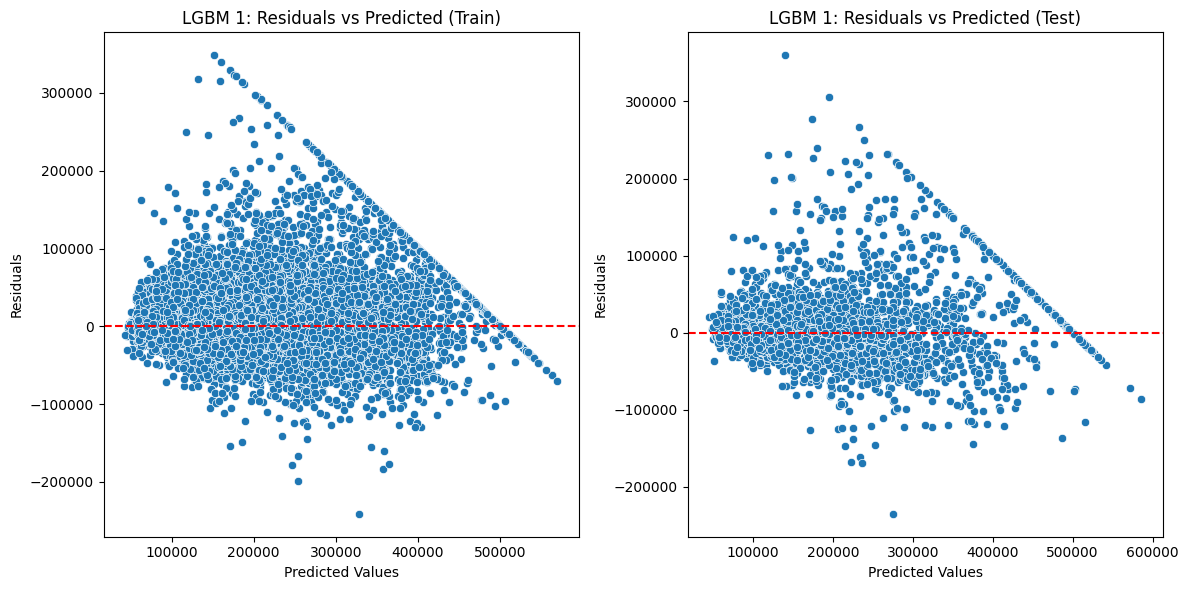

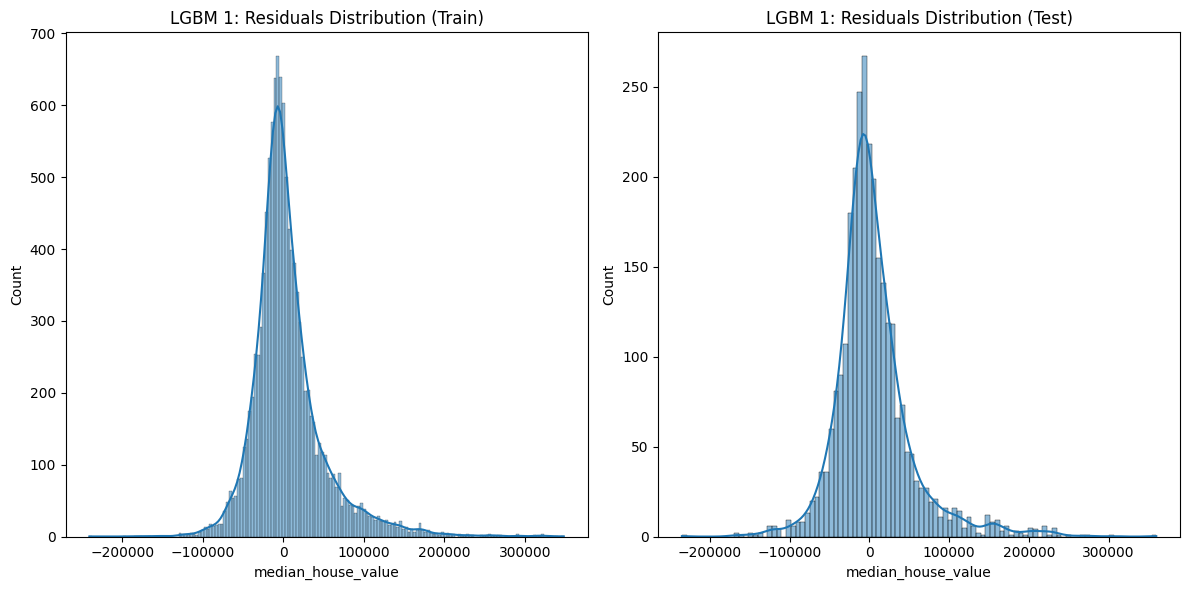

In [77]:
# Redefine the preprocessing and model pipeline for LGBM 1
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
        ('num', StandardScaler(), ['longitude', 'latitude', 'total_rooms', 'median_income'])
    ]
)

model = TransformedTargetRegressor(
    regressor=LGBMRegressor(random_state=42),
    func=log_transform,
    inverse_func=inverse_log_transform
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

# Fit the pipeline on the correct features
pipeline.fit(X_train[features_to_includeLGBM1], y_train)

# Predict on the training and test sets using LGBM 1
y_train_pred_lgbm = pipeline.predict(X_train[features_to_includeLGBM1])
y_test_pred_lgbm = pipeline.predict(X_test[features_to_includeLGBM1])

# Calculate residuals
train_residuals_lgbm = y_train - y_train_pred_lgbm
test_residuals_lgbm = y_test - y_test_pred_lgbm

# Plot residuals vs. predicted values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train_pred_lgbm, y=train_residuals_lgbm)
plt.axhline(0, color='red', linestyle='--')
plt.title('LGBM 1: Residuals vs Predicted (Train)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test_pred_lgbm, y=test_residuals_lgbm)
plt.axhline(0, color='red', linestyle='--')
plt.title('LGBM 1: Residuals vs Predicted (Test)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()

# Plot histogram of residuals
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(train_residuals_lgbm, kde=True)
plt.title('LGBM 1: Residuals Distribution (Train)')

plt.subplot(1, 2, 2)
sns.histplot(test_residuals_lgbm, kde=True)
plt.title('LGBM 1: Residuals Distribution (Test)')
plt.tight_layout()
plt.show()

1.	Train Set Residuals:
    - The residuals for the training set appear to be spread across a wide range of predicted values.
    - The majority of the residuals are centered around 0, indicating that the model predictions are fairly accurate for a large portion of the data.
    - However, there is a funnel-like shape with increasing residual variance as predicted values increase, particularly for higher predicted values, indicating potential heteroscedasticity (i.e., the variance of the residuals increases with the magnitude of the predicted values).
2.	Test Set Residuals:
    - The residuals for the test set show a similar pattern to the training set, with a wide spread and some outliers.
    - The test residuals also exhibit increasing variance with higher predicted values, similar to the training set.
    - This pattern suggests that the model may be overfitting slightly to the training data, as it performs well on the training set but shows some variability on the test set.

--

5.1.2. XGB 1 Residual Analysis

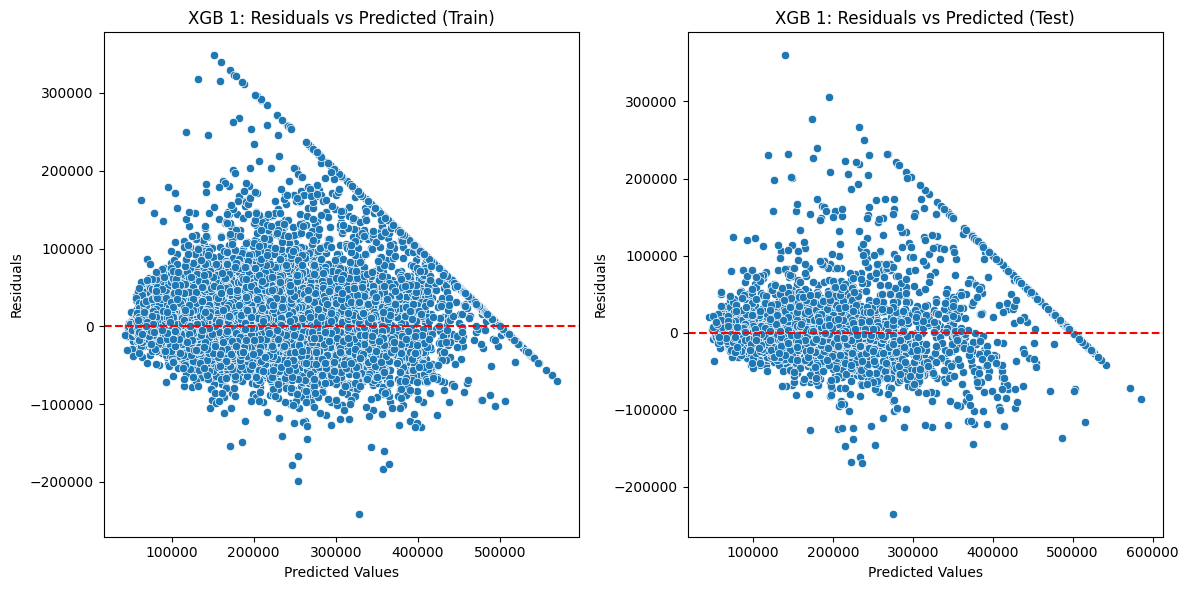

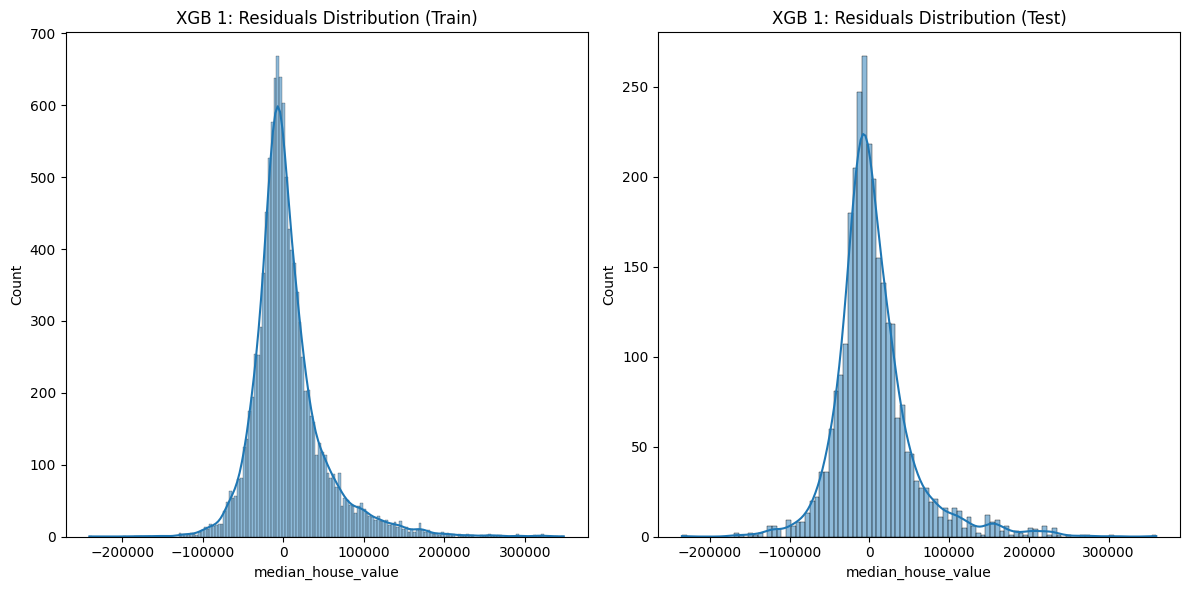

In [78]:
# Predict on the training and test sets using XGB 1
y_train_pred_xgb = pipeline.predict(X_train[features_to_includeXGB1])
y_test_pred_xgb = pipeline.predict(X_test[features_to_includeXGB1])

# Calculate residuals
train_residuals_xgb = y_train - y_train_pred_xgb
test_residuals_xgb = y_test - y_test_pred_xgb

# Plot residuals vs. predicted values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train_pred_xgb, y=train_residuals_xgb)
plt.axhline(0, color='red', linestyle='--')
plt.title('XGB 1: Residuals vs Predicted (Train)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test_pred_xgb, y=test_residuals_xgb)
plt.axhline(0, color='red', linestyle='--')
plt.title('XGB 1: Residuals vs Predicted (Test)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()

# Plot histogram of residuals
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(train_residuals_xgb, kde=True)
plt.title('XGB 1: Residuals Distribution (Train)')

plt.subplot(1, 2, 2)
sns.histplot(test_residuals_xgb, kde=True)
plt.title('XGB 1: Residuals Distribution (Test)')
plt.tight_layout()
plt.show()

5.1.3. RF 1 Residual Analysis

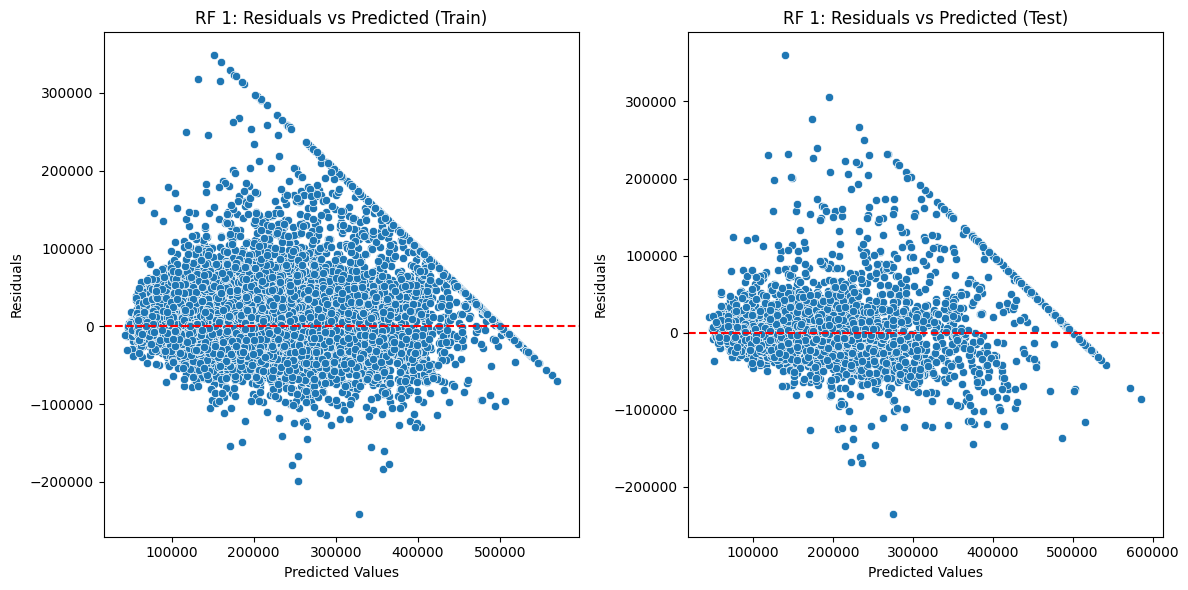

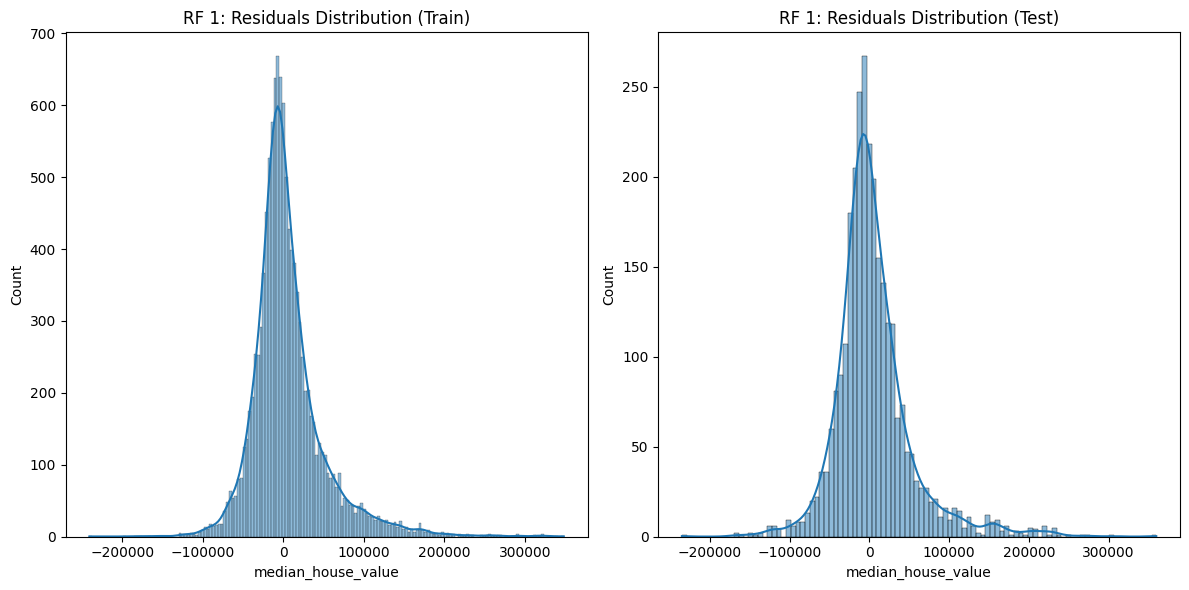

In [79]:
features_to_includeRF1 = ['longitude', 'latitude', 'total_rooms', 'median_income', 'rooms_per_capita', 'ocean_proximity']

# Predict on the training and test sets using RF 1
y_train_pred_rf = pipeline.predict(X_train[features_to_includeRF1])
y_test_pred_rf = pipeline.predict(X_test[features_to_includeRF1])

# Calculate residuals
train_residuals_rf = y_train - y_train_pred_rf
test_residuals_rf = y_test - y_test_pred_rf

# Plot residuals vs. predicted values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train_pred_rf, y=train_residuals_rf)
plt.axhline(0, color='red', linestyle='--')
plt.title('RF 1: Residuals vs Predicted (Train)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test_pred_rf, y=test_residuals_rf)
plt.axhline(0, color='red', linestyle='--')
plt.title('RF 1: Residuals vs Predicted (Test)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()

# Plot histogram of residuals
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(train_residuals_rf, kde=True)
plt.title('RF 1: Residuals Distribution (Train)')

plt.subplot(1, 2, 2)
sns.histplot(test_residuals_rf, kde=True)
plt.title('RF 1: Residuals Distribution (Test)')
plt.tight_layout()
plt.show()

--

5.1.4. Residual Analysis Summary

- Key Observations:

1.	Triangular Pattern: All three models exhibit a triangular or cone-shaped pattern in the residuals vs. predicted plots. This suggests that the models are underestimating the variance for high predicted values, which is common in tree-based methods.
2.	Symmetry Around Zero: The residuals are relatively symmetric around zero, which indicates that there isn’t a systematic bias in the predictions—although the spread of residuals increases with the predicted value, as seen in all models.
3.	Outliers and High Residuals: Each model shows significant outliers or high residuals, particularly at the higher end of the predicted values. This suggests that all models struggle similarly with certain portions of the dataset.

- Next Steps:

    - Given that the residual plots are similar across the models, additional steps like hyperparameter tuning and further analysis may be needed to discern more substantial differences.

--

### 5.2. Learning Curve Analysis

5.2.1. LGBM 1 Learning Curve Analysis

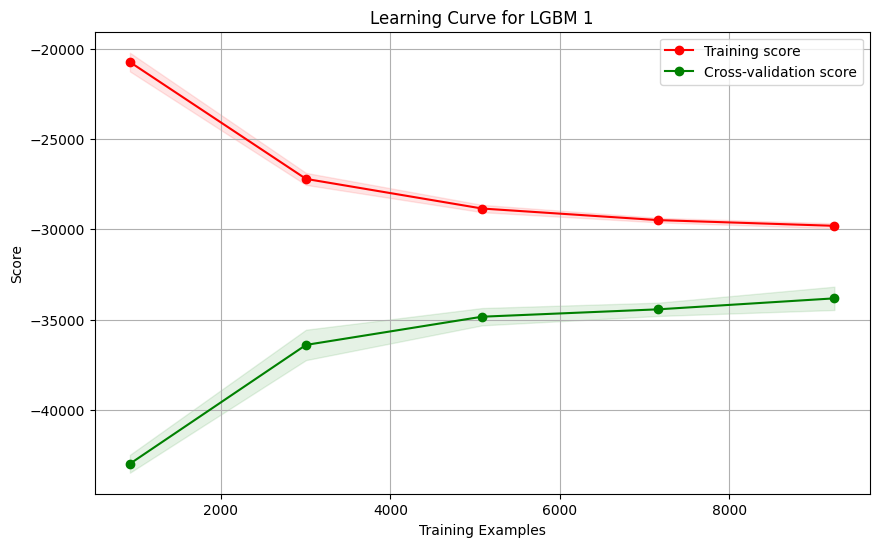

In [80]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Define the model (using LGBM as an example)
model = TransformedTargetRegressor(
    regressor=LGBMRegressor(random_state=42, verbose=-1),
    func=log_transform,
    inverse_func=inverse_log_transform
)

# Create the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(
    pipeline, X_train[features_to_includeLGBM1], y_train, cv=5, scoring='neg_mean_absolute_error',
    train_sizes=np.linspace(0.1, 1.0, 5), n_jobs=-1
)

# Calculate mean and std for train and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title('Learning Curve for LGBM 1')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend(loc="best")
plt.grid()
plt.show()

--

5.2.2. XGB 1 Learning Curve Analysis

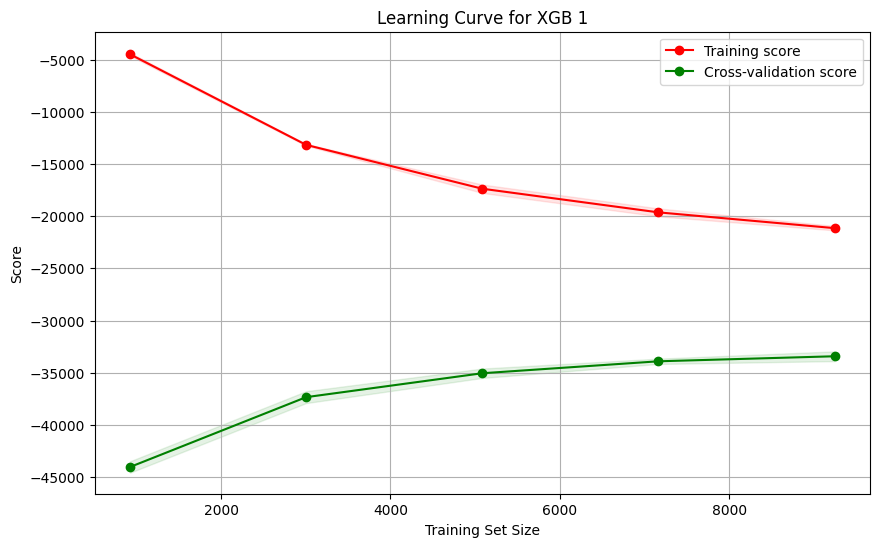

In [81]:
# Define the model for XGB 1
model_xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('model', TransformedTargetRegressor(
        regressor=XGBRegressor(random_state=42),
        func=log_transform,
        inverse_func=inverse_log_transform))
])

# Generate the learning curve for XGB 1
train_sizes, train_scores, test_scores = learning_curve(
    model_xgb, X_train[features_to_includeXGB1], y_train, cv=5, scoring="neg_mean_absolute_error",
    train_sizes=np.linspace(0.1, 1.0, 5), n_jobs=-1)

# Calculate mean and std for train and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve for XGB 1
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title('Learning Curve for XGB 1')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.legend(loc="best")
plt.grid()
plt.show()

--

5.2.3. RF 1 Learning Curve

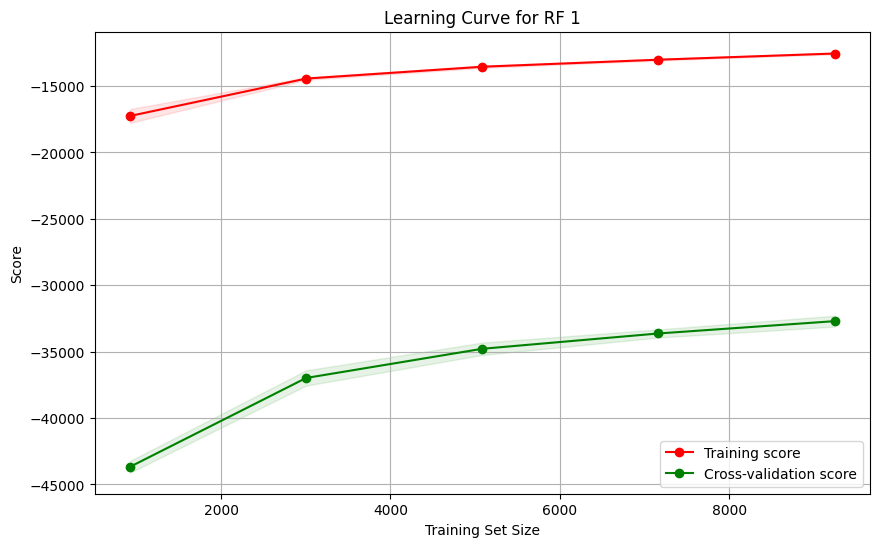

In [82]:
# Define the model for RF 1
model_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('model', TransformedTargetRegressor(
        regressor=RandomForestRegressor(random_state=42),
        func=log_transform,
        inverse_func=inverse_log_transform))
])

# Generate the learning curve for RF 1
train_sizes, train_scores, test_scores = learning_curve(
    model_rf, X_train[features_to_includeRF1], y_train, cv=5, scoring="neg_mean_absolute_error",
    train_sizes=np.linspace(0.1, 1.0, 5), n_jobs=-1)

# Calculate mean and std for train and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve for RF 1
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title('Learning Curve for RF 1')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.legend(loc="best")
plt.grid()
plt.show()

--

5.2.4. Summary

| **Model** | **Insight** | **Interpretation**                                        |
|:----:|:---------------:|:-------------------------------------------------------------|
| LGBM 1 (LightGBM)   | Training Score        | The training score decreases steadily as the training set size increases, indicating that the model is learning the data well. However, the score remains relatively high, suggesting that the model is not overfitting excessively.                    |
|    | Cross-Validation Score      | The cross-validation score improves as the training set size increases, indicating better generalization with more data.                           |
|    |Gap Between Scores     | The gap between the training and cross-validation scores is moderate, indicating that the model is balancing between fitting the training data and generalizing to new data fairly well.             |
| XGB 1 (XGBoost)   | Training Score        | The training score is high, especially with smaller training set sizes, and decreases gradually as more data is added, suggesting that the model is fitting the training data well but might be overfitting initially.                   |
|    | Cross-Validation Score      | The cross-validation score improves as the training set size increases, but there remains a notable gap between the training and cross-validation scores.                          |
|    |Gap Between Scores     | The gap between training and cross-validation scores is noticeable and slightly larger than LGBM 1. This suggests that XGB 1 may be overfitting more than LGBM 1, and while it does generalize better with more data, there is room for improvement.            |
| RF 1 (Random Forest)  | Training Score        | The training score remains high and decreases only slightly as the training set size increases. This indicates that the model is likely overfitting to the training data, capturing too much detail or noise.                    |
|    | Cross-Validation Score      | The cross-validation score improves with increasing training set size, but the improvement is gradual.                          |
|    |Gap Between Scores     | There is a significant gap between the training and cross-validation scores, larger than both LGBM 1 and XGB 1. This suggests that RF 1 is overfitting more than the other models, and its generalization to unseen data is less effective.            |

- Conclusion:

    - LGBM 1 shows a balanced performance with a moderate gap between training and cross-validation scores, indicating a good balance between fitting the training data and generalizing to new data.
    - XGB 1 performs well on the training data but has a slightly larger gap compared to LGBM 1, indicating a tendency to overfit, though it still generalizes reasonably well.
    - RF 1 has the largest gap between training and cross-validation scores, suggesting the highest degree of overfitting among the three models.

- Next Steps:

    - Hyperparameter Tuning: All three models could benefit from hyperparameter tuning to reduce overfitting, particularly RF 1 and XGB 1. Adjusting parameters like max_depth, min_samples_split, n_estimators, or adding regularization could improve generalization.
    - Final Model Selection: After hyperparameter tuning and residual analysis, the final model selection should be based on a combination of performance metrics, learning curve analysis, and validation results.

--

### 5.3. Hyperparameter Tuning

5.3.1. LGBM 1 Hyperparameter Tuning

5.3.1.1. Tunings Trial

A. Non-Linear Relationship Analysis

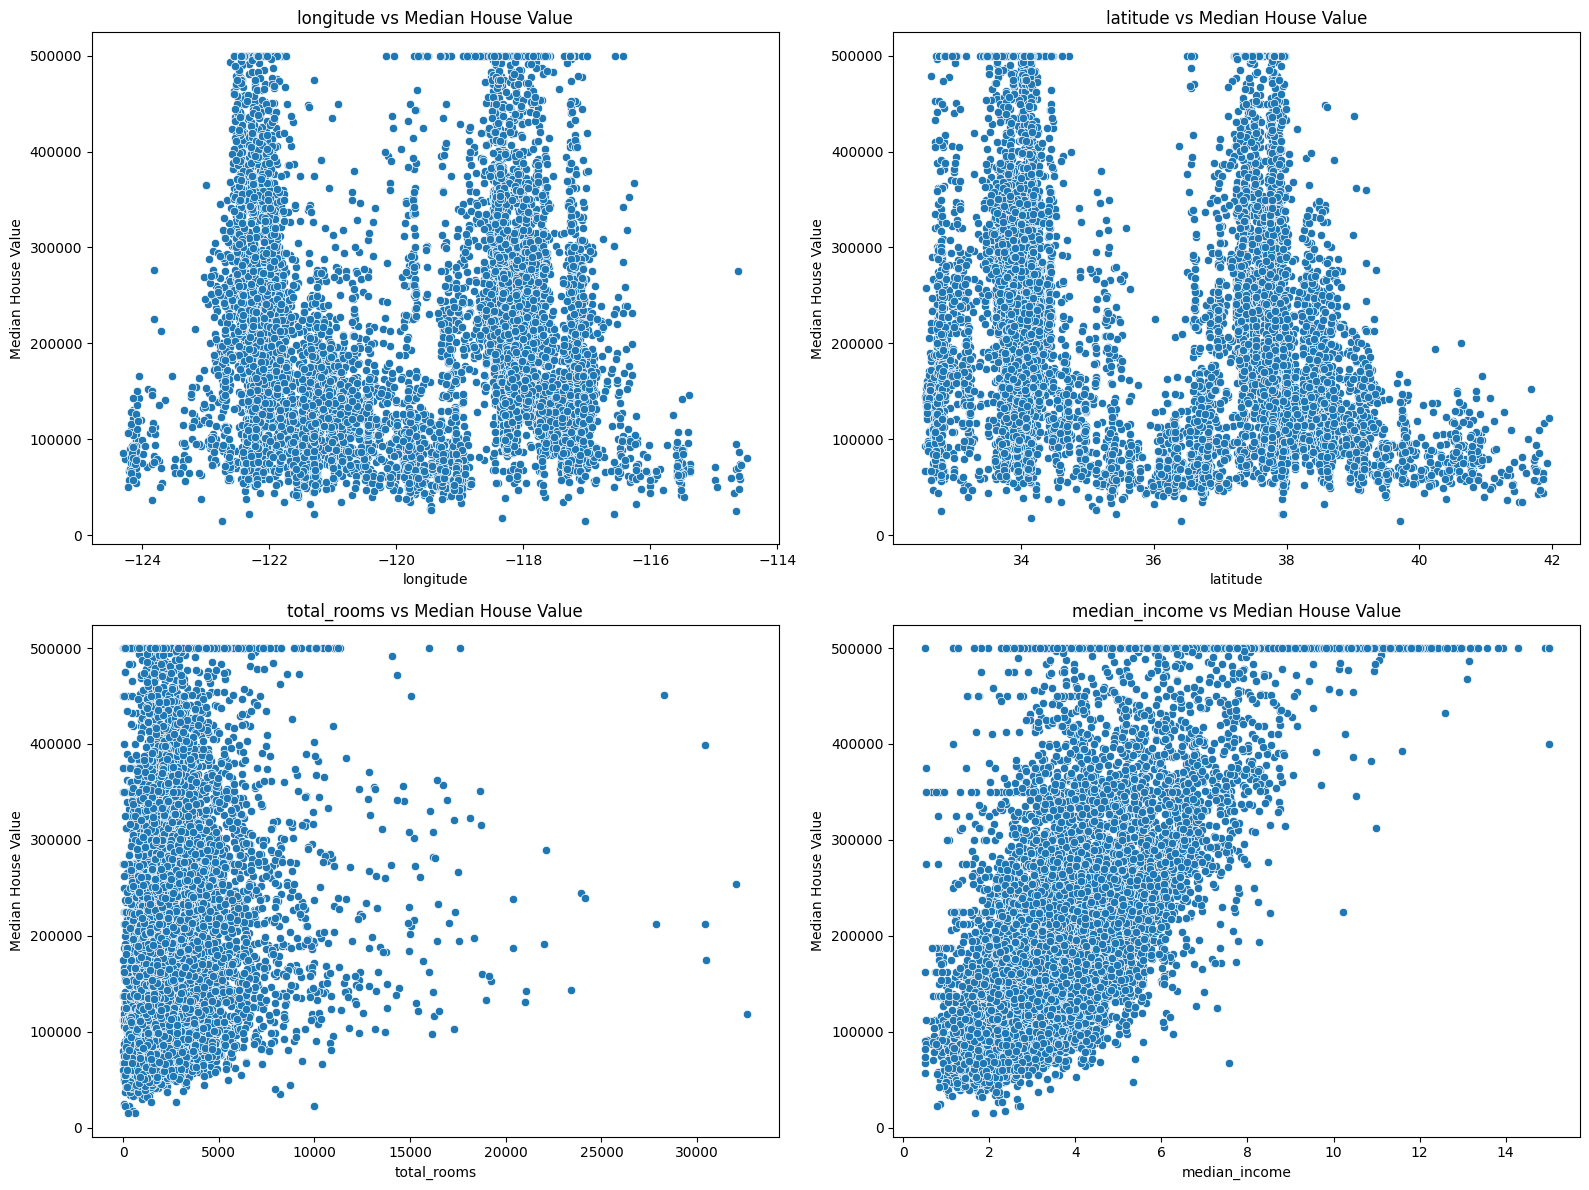

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of features to plot against the target variable
features = ['longitude', 'latitude', 'total_rooms', 'median_income']

# Set up the figure
plt.figure(figsize=(16, 12))

# Loop through each feature and plot
for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(x=X_train[feature], y=y_train)
    plt.title(f'{feature} vs Median House Value')
    plt.xlabel(feature)
    plt.ylabel('Median House Value')

plt.tight_layout()
plt.show()

- Conclusion:

    - The scatter plots suggest that there are potential non-linear relationships, especially between median_income and median_house_value.
    - This justifies the consideration of using polynomial features, especially for median_income, to capture this non-linearity in your model.

B. Hyperparameter Tuning

1. Find Best Param

In [84]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor
import lightgbm as lgb

# Define features and target
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the features to include in the LGBM model
features_to_includeLGBM1 = ['longitude', 'latitude', 'total_rooms', 'median_income', 'ocean_proximity']

# Preprocessing Pipeline: OneHotEncode 'ocean_proximity', scale numerical features, and add polynomial features
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
        ('num', Pipeline([
            ('scaler', StandardScaler()),
            ('poly', PolynomialFeatures(degree=2, include_bias=False))
        ]), features_to_includeLGBM1[:-1])
    ]
)

# Define log transformation functions
def log_transform(x):
    return np.log1p(x)

def inverse_log_transform(x):
    return np.expm1(x)

# Define LGBM model within a TransformedTargetRegressor for log transformation of the target
model = TransformedTargetRegressor(
    regressor=lgb.LGBMRegressor(random_state=42, verbose=-1),
    func=log_transform,
    inverse_func=inverse_log_transform
)

# Full pipeline with the preprocessor and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Define the parameter grid for LGBM
param_grid_lgbm = {
    'model__regressor__n_estimators': [100, 500, 1000],
    'model__regressor__learning_rate': [0.01, 0.1, 0.05, 0.2],
    'model__regressor__num_leaves': [20, 30, 40, 50],
    'model__regressor__max_depth': [-1, 10, 20, 30],
    'model__regressor__min_child_samples': [10, 20, 30],
    'model__regressor__subsample': [0.6, 0.8, 1.0],
    'model__regressor__colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize KFold Cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize RandomizedSearchCV
random_search_lgbm = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid_lgbm,
    n_iter=50,  # Number of parameter settings that are sampled
    scoring='neg_mean_absolute_error',  # Scoring metric
    cv=kfold,  # Cross-validation strategy
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit the model with RandomizedSearchCV
random_search_lgbm.fit(X_train, y_train)

# Best parameters
print("Best parameters found for LGBM 1:", random_search_lgbm.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found for LGBM 1: {'model__regressor__subsample': 0.8, 'model__regressor__num_leaves': 50, 'model__regressor__n_estimators': 1000, 'model__regressor__min_child_samples': 10, 'model__regressor__max_depth': 10, 'model__regressor__learning_rate': 0.05, 'model__regressor__colsample_bytree': 0.8}


2. Tuning Using Best Param

In [85]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np

# Predict on the training and test sets using the optimized LGBM model
y_train_pred_lgbm_opt = random_search_lgbm.best_estimator_.predict(X_train)
y_test_pred_lgbm_opt = random_search_lgbm.best_estimator_.predict(X_test)

# Calculate evaluation metrics
mae_train = mean_absolute_error(y_train, y_train_pred_lgbm_opt)
mae_test = mean_absolute_error(y_test, y_test_pred_lgbm_opt)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_lgbm_opt))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_lgbm_opt))
r2_train = r2_score(y_train, y_train_pred_lgbm_opt)
r2_test = r2_score(y_test, y_test_pred_lgbm_opt)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred_lgbm_opt)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred_lgbm_opt)

# Print the results
print(f"Optimized LGBM 1 - Training Set: MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}, R²: {r2_train:.6f}, MAPE: {mape_train:.6f}")
print(f"Optimized LGBM 1 - Test Set: MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}, R²: {r2_test:.6f}, MAPE: {mape_test:.6f}")

Optimized LGBM 1 - Training Set: MAE: 14247.58, RMSE: 22318.64, R²: 0.962748, MAPE: 0.069637
Optimized LGBM 1 - Test Set: MAE: 30263.88, RMSE: 47337.37, R²: 0.828233, MAPE: 0.158192


3. Residual Analysis

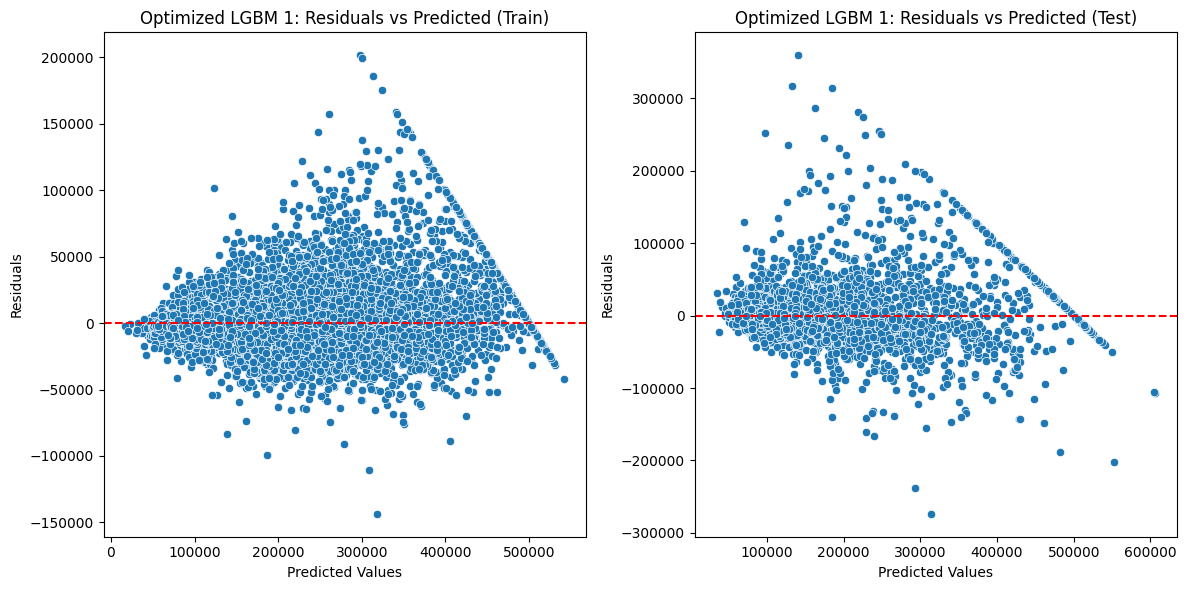

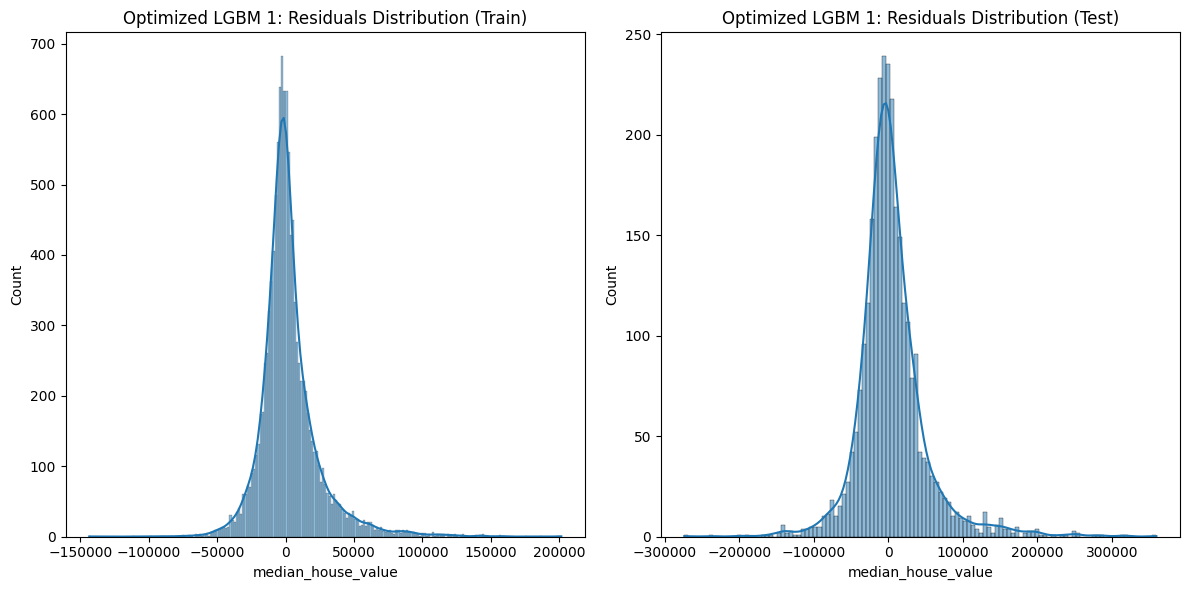

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on the training and test sets using the optimized LGBM 1
y_train_pred_optimized_lgbm = random_search_lgbm.predict(X_train)
y_test_pred_optimized_lgbm = random_search_lgbm.predict(X_test)

# Calculate residuals
train_residuals_optimized_lgbm = y_train - y_train_pred_optimized_lgbm
test_residuals_optimized_lgbm = y_test - y_test_pred_optimized_lgbm

# Plot residuals vs. predicted values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train_pred_optimized_lgbm, y=train_residuals_optimized_lgbm)
plt.axhline(0, color='red', linestyle='--')
plt.title('Optimized LGBM 1: Residuals vs Predicted (Train)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test_pred_optimized_lgbm, y=test_residuals_optimized_lgbm)
plt.axhline(0, color='red', linestyle='--')
plt.title('Optimized LGBM 1: Residuals vs Predicted (Test)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()

# Plot histogram of residuals
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(train_residuals_optimized_lgbm, kde=True)
plt.title('Optimized LGBM 1: Residuals Distribution (Train)')

plt.subplot(1, 2, 2)
sns.histplot(test_residuals_optimized_lgbm, kde=True)
plt.title('Optimized LGBM 1: Residuals Distribution (Test)')
plt.tight_layout()
plt.show()

4. Pipeline modification (Adding DomainSpecificFeatures)

In [88]:
# Define custom transformer for domain-specific features
class DomainSpecificFeatures(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()
        X['rooms_per_household'] = X['total_rooms'] / X['households']
        X['bedrooms_per_room'] = X['total_bedrooms'] / X['total_rooms']
        X['population_per_household'] = X['population'] / X['households']
        X['income_per_capita'] = X['median_income'] / X['households']
        return X

# Define the preprocessor with domain-specific and polynomial features
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
        ('num', Pipeline(steps=[
            ('domain', DomainSpecificFeatures()),
            ('scaler', StandardScaler()),
            ('poly', PolynomialFeatures(degree=2, include_bias=False))
        ]), ['longitude', 'latitude', 'total_rooms', 'median_income', 
             'total_bedrooms', 'population', 'households'])
    ]
)

# Define the model with the best parameters from previous tuning
model = TransformedTargetRegressor(
    regressor=LGBMRegressor(
        subsample=0.8,
        num_leaves=50,
        n_estimators=1000,
        min_child_samples=10,
        max_depth=10,
        learning_rate=0.05,
        colsample_bytree=0.8,
        random_state=42,
        verbose=-1
    ),
    func=log_transform,
    inverse_func=inverse_log_transform
)

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

# Fit the model
pipeline.fit(X_train, y_train)

# Predict and evaluate the model
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Evaluate the performance
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

# Print the results
print(f"Optimized LGBM with Domain-Specific and Polynomial Features - Training Set: MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}, R²: {r2_train:.6f}, MAPE: {mape_train:.6f}")
print(f"Optimized LGBM with Domain-Specific and Polynomial Features - Test Set: MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}, R²: {r2_test:.6f}, MAPE: {mape_test:.6f}")

Optimized LGBM with Domain-Specific and Polynomial Features - Training Set: MAE: 8017.75, RMSE: 12715.39, R²: 0.987909, MAPE: 0.038386
Optimized LGBM with Domain-Specific and Polynomial Features - Test Set: MAE: 29794.63, RMSE: 47512.96, R²: 0.826956, MAPE: 0.155137


In [89]:
# Assuming 'data' is your DataFrame
X = data[['longitude', 'latitude', 'total_rooms', 'median_income', 
          'total_bedrooms', 'population', 'households', 'ocean_proximity']]
y = data['median_house_value']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define custom transformer for domain-specific features
class DomainSpecificFeatures(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()
        X['rooms_per_household'] = X['total_rooms'] / X['households']
        X['bedrooms_per_room'] = X['total_bedrooms'] / X['total_rooms']
        X['population_per_household'] = X['population'] / X['households']
        X['income_per_capita'] = X['median_income'] / X['households']
        return X

# Define the preprocessor with domain-specific and polynomial features
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
        ('num', Pipeline(steps=[
            ('domain', DomainSpecificFeatures()),
            ('scaler', StandardScaler()),
            ('poly', PolynomialFeatures(degree=2, include_bias=False))
        ]), ['longitude', 'latitude', 'total_rooms', 'median_income', 
             'total_bedrooms', 'population', 'households'])
    ]
)

# Define the model with the best parameters from previous tuning
model = TransformedTargetRegressor(
    regressor=LGBMRegressor(
        subsample=0.8,
        num_leaves=50,
        n_estimators=1000,
        min_child_samples=10,
        max_depth=10,
        learning_rate=0.05,
        lambda_l1=1.0,  # L1 regularization
        lambda_l2=1.0,  # L2 regularization
        colsample_bytree=0.8,
        random_state=42,
        verbose=-1
    ),
    func=np.log1p,  # log transformation
    inverse_func=np.expm1  # inverse log transformation
)

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

# Fit the model
pipeline.fit(X_train, y_train)

# Predict and evaluate the model
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Evaluate the performance
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

# Print the results
print(f"Optimized LGBM with Domain-Specific and Polynomial Features - Training Set: MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}, R²: {r2_train:.6f}, MAPE: {mape_train:.6f}")
print(f"Optimized LGBM with Domain-Specific and Polynomial Features - Test Set: MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}, R²: {r2_test:.6f}, MAPE: {mape_test:.6f}")

Optimized LGBM with Domain-Specific and Polynomial Features - Training Set: MAE: 11626.64, RMSE: 17959.09, R²: 0.975880, MAPE: 0.055788
Optimized LGBM with Domain-Specific and Polynomial Features - Test Set: MAE: 30090.23, RMSE: 47766.78, R²: 0.825103, MAPE: 0.156607


In [108]:
# Assuming 'data' is your DataFrame
X = data[['longitude', 'latitude', 'total_rooms', 'median_income', 
          'total_bedrooms', 'population', 'households', 'ocean_proximity']]
y = data['median_house_value']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define custom transformer for domain-specific features
class DomainSpecificFeatures(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()
        X['rooms_per_household'] = X['total_rooms'] / X['households']
        X['bedrooms_per_room'] = X['total_bedrooms'] / X['total_rooms']
        X['population_per_household'] = X['population'] / X['households']
        X['income_per_capita'] = X['median_income'] / X['households']
        return X

# Define the preprocessor with domain-specific and polynomial features
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
        ('num', Pipeline(steps=[
            ('domain', DomainSpecificFeatures()),
            ('scaler', StandardScaler()),
            ('poly', PolynomialFeatures(degree=2, include_bias=False))
        ]), ['longitude', 'latitude', 'total_rooms', 'median_income', 
             'total_bedrooms', 'population', 'households'])
    ]
)

# Define the model with the best parameters from previous tuning
model = TransformedTargetRegressor(
    regressor=LGBMRegressor(
        subsample=0.8,
        num_leaves=50,
        n_estimators=1000,
        min_child_samples=10,
        max_depth=10,
        learning_rate=0.05,
        lambda_l1=6.0,  # L1 regularization
        lambda_l2=12.0,  # L2 regularization
        colsample_bytree=0.8,
        random_state=42,
        verbose=-1
    ),
    func=np.log1p,  # log transformation
    inverse_func=np.expm1  # inverse log transformation
)

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

# Fit the model
pipeline.fit(X_train, y_train)

# Predict and evaluate the model
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Evaluate the performance
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

# Print the results
print(f"Optimized LGBM with Domain-Specific and Polynomial Features - Training Set: MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}, R²: {r2_train:.6f}, MAPE: {mape_train:.6f}")
print(f"Optimized LGBM with Domain-Specific and Polynomial Features - Test Set: MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}, R²: {r2_test:.6f}, MAPE: {mape_test:.6f}")

Optimized LGBM with Domain-Specific and Polynomial Features - Training Set: MAE: 22427.22, RMSE: 35157.40, R²: 0.907563, MAPE: 0.112381
Optimized LGBM with Domain-Specific and Polynomial Features - Test Set: MAE: 30210.53, RMSE: 47739.35, R²: 0.825304, MAPE: 0.156752


5. Pipeline modification (Adjust the Param Grid & Remove PolynomialFeatures)

In [90]:
# Define features and target
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the features to include in the LGBM model
features_to_includeLGBM1 = ['longitude', 'latitude', 'total_rooms', 'median_income', 'ocean_proximity']

# Preprocessing Pipeline: OneHotEncode 'ocean_proximity', scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
        ('num', StandardScaler(), features_to_includeLGBM1[:-1])
    ]
)

# Define log transformation functions
def log_transform(x):
    return np.log1p(x)

def inverse_log_transform(x):
    return np.expm1(x)

# Define LGBM model within a TransformedTargetRegressor for log transformation of the target
model = TransformedTargetRegressor(
    regressor=lgb.LGBMRegressor(random_state=42, verbose=-1),
    func=log_transform,
    inverse_func=inverse_log_transform
)

# Full pipeline with the preprocessor and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Use the previous best parameters for LGBM
param_grid_lgbm = {
    'model__regressor__n_estimators': [1000],
    'model__regressor__learning_rate': [0.05],
    'model__regressor__num_leaves': [50],
    'model__regressor__max_depth': [10],
    'model__regressor__min_child_samples': [10],
    'model__regressor__subsample': [0.8],
    'model__regressor__colsample_bytree': [0.8]
}

# Initialize KFold Cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize RandomizedSearchCV
random_search_lgbm = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid_lgbm,
    n_iter=1,  # Since we're using the best params, we only need to run it once
    scoring='neg_mean_absolute_error',
    cv=kfold,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit the model with RandomizedSearchCV
random_search_lgbm.fit(X_train, y_train)

# Predict on the training and test sets using the optimized LGBM model
y_train_pred_lgbm_opt = random_search_lgbm.best_estimator_.predict(X_train)
y_test_pred_lgbm_opt = random_search_lgbm.best_estimator_.predict(X_test)

# Calculate evaluation metrics
mae_train = mean_absolute_error(y_train, y_train_pred_lgbm_opt)
mae_test = mean_absolute_error(y_test, y_test_pred_lgbm_opt)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_lgbm_opt))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_lgbm_opt))
r2_train = r2_score(y_train, y_train_pred_lgbm_opt)
r2_test = r2_score(y_test, y_test_pred_lgbm_opt)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred_lgbm_opt)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred_lgbm_opt)

# Print the results
print(f"Optimized LGBM 1 - Training Set: MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}, R²: {r2_train:.6f}, MAPE: {mape_train:.6f}")
print(f"Optimized LGBM 1 - Test Set: MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}, R²: {r2_test:.6f}, MAPE: {mape_test:.6f}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Optimized LGBM 1 - Training Set: MAE: 18106.91, RMSE: 28028.33, R²: 0.941250, MAPE: 0.091052
Optimized LGBM 1 - Test Set: MAE: 30284.11, RMSE: 47232.55, R²: 0.828993, MAPE: 0.158415


In [94]:
# Define features and target
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the features to include in the LGBM model
features_to_includeLGBM1 = ['longitude', 'latitude', 'total_rooms', 'median_income', 'ocean_proximity']

# Preprocessing Pipeline: OneHotEncode 'ocean_proximity', scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
        ('num', StandardScaler(), features_to_includeLGBM1[:-1])
    ]
)

# Define log transformation functions
def log_transform(x):
    return np.log1p(x)

def inverse_log_transform(x):
    return np.expm1(x)

# Define LGBM model within a TransformedTargetRegressor for log transformation of the target
model = TransformedTargetRegressor(
    regressor=lgb.LGBMRegressor(random_state=42, verbose=-1),
    func=log_transform,
    inverse_func=inverse_log_transform
)

# Full pipeline with the preprocessor and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Use the previous best parameters for LGBM with regularization
param_grid_lgbm = {
    'model__regressor__n_estimators': [1000],
    'model__regressor__learning_rate': [0.05],
    'model__regressor__num_leaves': [50],
    'model__regressor__max_depth': [10],
    'model__regressor__min_child_samples': [10],
    'model__regressor__subsample': [0.8],
    'model__regressor__colsample_bytree': [0.8],
    'model__regressor__lambda_l1': [2.0],  # L1 regularization
    'model__regressor__lambda_l2': [2.0]   # L2 regularization
}

# Initialize KFold Cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize RandomizedSearchCV
random_search_lgbm = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid_lgbm,
    n_iter=1,  # Since we're using the best params, we only need to run it once
    scoring='neg_mean_absolute_error',
    cv=kfold,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit the model with RandomizedSearchCV
random_search_lgbm.fit(X_train, y_train)

# Predict on the training and test sets using the optimized LGBM model
y_train_pred_lgbm_opt = random_search_lgbm.best_estimator_.predict(X_train)
y_test_pred_lgbm_opt = random_search_lgbm.best_estimator_.predict(X_test)

# Calculate evaluation metrics
mae_train = mean_absolute_error(y_train, y_train_pred_lgbm_opt)
mae_test = mean_absolute_error(y_test, y_test_pred_lgbm_opt)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_lgbm_opt))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_lgbm_opt))
r2_train = r2_score(y_train, y_train_pred_lgbm_opt)
r2_test = r2_score(y_test, y_test_pred_lgbm_opt)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred_lgbm_opt)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred_lgbm_opt)

# Print the results
print(f"Optimized LGBM 1 - Training Set: MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}, R²: {r2_train:.6f}, MAPE: {mape_train:.6f}")
print(f"Optimized LGBM 1 - Test Set: MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}, R²: {r2_test:.6f}, MAPE: {mape_test:.6f}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits


Optimized LGBM 1 - Training Set: MAE: 24176.16, RMSE: 36976.12, R²: 0.897752, MAPE: 0.122056
Optimized LGBM 1 - Test Set: MAE: 30327.17, RMSE: 47276.99, R²: 0.828671, MAPE: 0.156748


In [114]:
# Define features and target
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the features to include in the LGBM model
features_to_includeLGBM1 = ['longitude', 'latitude', 'total_rooms', 'median_income', 'ocean_proximity']

# Preprocessing Pipeline: OneHotEncode 'ocean_proximity', scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
        ('num', StandardScaler(), features_to_includeLGBM1[:-1])
    ]
)

# Define log transformation functions
def log_transform(x):
    return np.log1p(x)

def inverse_log_transform(x):
    return np.expm1(x)

# Define LGBM model within a TransformedTargetRegressor for log transformation of the target
model = TransformedTargetRegressor(
    regressor=lgb.LGBMRegressor(random_state=42, verbose=-1),
    func=log_transform,
    inverse_func=inverse_log_transform
)

# Full pipeline with the preprocessor and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Use the previous best parameters for LGBM with regularization
param_grid_lgbm = {
    'model__regressor__n_estimators': [1000],
    'model__regressor__learning_rate': [0.05],
    'model__regressor__num_leaves': [50],
    'model__regressor__max_depth': [10],
    'model__regressor__min_child_samples': [10],
    'model__regressor__subsample': [0.8],
    'model__regressor__colsample_bytree': [0.8],
    'model__regressor__lambda_l1': [2.5],  # L1 regularization
    'model__regressor__lambda_l2': [1.0]   # L2 regularization
}

# Initialize KFold Cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize RandomizedSearchCV
random_search_lgbm = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid_lgbm,
    n_iter=1,  # Since we're using the best params, we only need to run it once
    scoring='neg_mean_absolute_error',
    cv=kfold,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit the model with RandomizedSearchCV
random_search_lgbm.fit(X_train, y_train)

# Predict on the training and test sets using the optimized LGBM model
y_train_pred_lgbm_opt = random_search_lgbm.best_estimator_.predict(X_train)
y_test_pred_lgbm_opt = random_search_lgbm.best_estimator_.predict(X_test)

# Calculate evaluation metrics
mae_train = mean_absolute_error(y_train, y_train_pred_lgbm_opt)
mae_test = mean_absolute_error(y_test, y_test_pred_lgbm_opt)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_lgbm_opt))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_lgbm_opt))
r2_train = r2_score(y_train, y_train_pred_lgbm_opt)
r2_test = r2_score(y_test, y_test_pred_lgbm_opt)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred_lgbm_opt)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred_lgbm_opt)

# Print the results
print(f"Optimized LGBM 1 - Training Set: MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}, R²: {r2_train:.6f}, MAPE: {mape_train:.6f}")
print(f"Optimized LGBM 1 - Test Set: MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}, R²: {r2_test:.6f}, MAPE: {mape_test:.6f}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits


Optimized LGBM 1 - Training Set: MAE: 25565.40, RMSE: 39075.56, R²: 0.885811, MAPE: 0.129629
Optimized LGBM 1 - Test Set: MAE: 30522.93, RMSE: 47574.83, R²: 0.826505, MAPE: 0.157595


6. Pipeline Modification (Adjust Param Grid & Use Repeated K-Folds)

In [124]:
# Define features and target
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the features to include in the LGBM model
features_to_includeLGBM1 = ['longitude', 'latitude', 'total_rooms', 'median_income', 'ocean_proximity']

# Preprocessing Pipeline: OneHotEncode 'ocean_proximity', scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
        ('num', StandardScaler(), features_to_includeLGBM1[:-1])
    ]
)

# Define log transformation functions
def log_transform(x):
    return np.log1p(x)

def inverse_log_transform(x):
    return np.expm1(x)

# Define LGBM model within a TransformedTargetRegressor for log transformation of the target
model = TransformedTargetRegressor(
    regressor=lgb.LGBMRegressor(random_state=42, verbose=-1),
    func=log_transform,
    inverse_func=inverse_log_transform
)

# Full pipeline with the preprocessor and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Adjusted parameter grid for LGBM
param_grid_lgbm = {
    'model__regressor__n_estimators': [1000],
    'model__regressor__learning_rate': [0.05],
    'model__regressor__num_leaves': [50],
    'model__regressor__max_depth': [10],
    'model__regressor__min_child_samples': [10],
    'model__regressor__subsample': [0.8],
    'model__regressor__colsample_bytree': [0.8],
    'model__regressor__lambda_l1': [2.5],  # L1 regularization
    'model__regressor__lambda_l2': [1.0]   # L2 regularization
}

# Initialize RepeatedKFold Cross-validation
repeated_kfold = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

# Initialize RandomizedSearchCV with RepeatedKFold
random_search_lgbm = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid_lgbm,
    n_iter=1,  # Number of parameter settings that are sampled
    scoring='neg_mean_absolute_error',  # Scoring metric
    cv=repeated_kfold,  # Cross-validation strategy
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit the model with RandomizedSearchCV
random_search_lgbm.fit(X_train, y_train)

# Best parameters
print("Best parameters found for LGBM 1:", random_search_lgbm.best_params_)

# Predict on the training and test sets using the optimized LGBM model
y_train_pred_lgbm_opt = random_search_lgbm.best_estimator_.predict(X_train)
y_test_pred_lgbm_opt = random_search_lgbm.best_estimator_.predict(X_test)

# Calculate evaluation metrics
mae_train = mean_absolute_error(y_train, y_train_pred_lgbm_opt)
mae_test = mean_absolute_error(y_test, y_test_pred_lgbm_opt)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_lgbm_opt))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_lgbm_opt))
r2_train = r2_score(y_train, y_train_pred_lgbm_opt)
r2_test = r2_score(y_test, y_test_pred_lgbm_opt)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred_lgbm_opt)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred_lgbm_opt)

# Print the results
print(f"Optimized LGBM 1 - Training Set: MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}, R²: {r2_train:.6f}, MAPE: {mape_train:.6f}")
print(f"Optimized LGBM 1 - Test Set: MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}, R²: {r2_test:.6f}, MAPE: {mape_test:.6f}")

Fitting 15 folds for each of 1 candidates, totalling 15 fits
Best parameters found for LGBM 1: {'model__regressor__subsample': 0.8, 'model__regressor__num_leaves': 50, 'model__regressor__n_estimators': 1000, 'model__regressor__min_child_samples': 10, 'model__regressor__max_depth': 10, 'model__regressor__learning_rate': 0.05, 'model__regressor__lambda_l2': 1.0, 'model__regressor__lambda_l1': 2.5, 'model__regressor__colsample_bytree': 0.8}
Optimized LGBM 1 - Training Set: MAE: 25565.40, RMSE: 39075.56, R²: 0.885811, MAPE: 0.129629
Optimized LGBM 1 - Test Set: MAE: 30522.93, RMSE: 47574.83, R²: 0.826505, MAPE: 0.157595


- Notes:
    - Using K-Folds and Repeated K-Folds gave the same output

C. Re-evaluating the Features

1. Features Importance of Selected Features

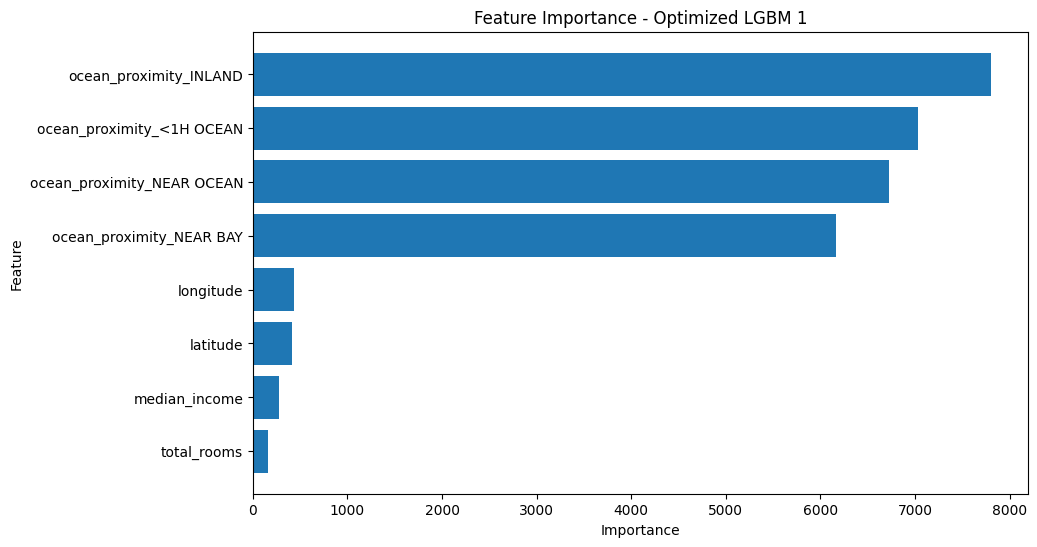

In [ ]:
# After fitting the RandomizedSearchCV with the optimized parameters
# Extract the best model
best_model_lgbm = random_search_lgbm.best_estimator_.named_steps['model'].regressor_

# Get the feature importance from the model
feature_importance = best_model_lgbm.feature_importances_

# Get the numerical feature names (before encoding)
numerical_features = features_to_includeLGBM1[:-1]  # Exclude 'ocean_proximity'

# Get the one-hot encoded feature names for 'ocean_proximity'
preprocessor = random_search_lgbm.best_estimator_.named_steps['preprocessor']
ocean_proximity_encoded = preprocessor.transformers_[0][1].get_feature_names_out(['ocean_proximity'])

# Combine numerical and categorical feature names
all_feature_names = np.concatenate([numerical_features, ocean_proximity_encoded])

# Create a DataFrame to store feature importance and feature names
importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': feature_importance
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.title('Feature Importance - Optimized LGBM 1')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

2. Features Importance of All Features

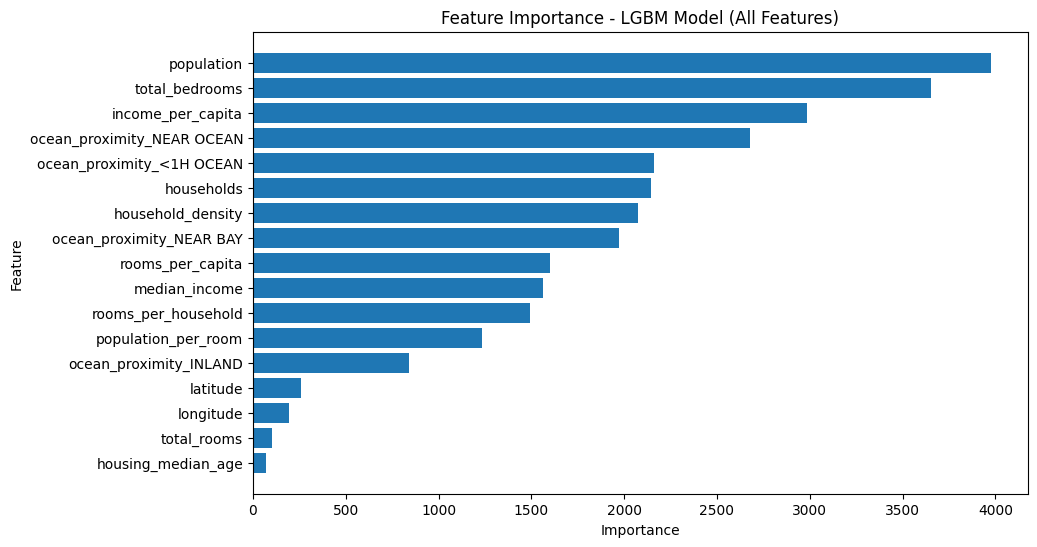

In [ ]:
# Define log transformation functions
def log_transform(x):
    return np.log1p(x)

def inverse_log_transform(x):
    return np.expm1(x)

# Drop the target variable from the feature set
X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),  # Encode categorical feature
        ('num', StandardScaler(), X_train.columns.drop('ocean_proximity'))  # Scale numerical features
    ]
)

# Define the LGBM model with log transformation
model = TransformedTargetRegressor(
    regressor=LGBMRegressor(n_estimators=1000, num_leaves=30, max_depth=20, learning_rate=0.05, 
                            subsample=0.8, colsample_bytree=0.8, min_child_samples=10, random_state=42),
    func=log_transform,
    inverse_func=inverse_log_transform
)

# Create a pipeline with preprocessing and the model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

# Fit the model
pipeline.fit(X_train, y_train)

# Get the fitted LGBM model
best_model_lgbm = pipeline.named_steps['model'].regressor_

# Get feature names for numeric features
numeric_features = X_train.columns.drop('ocean_proximity')

# Get feature names for categorical features after OneHotEncoding
categorical_features = preprocessor.named_transformers_['onehot'].get_feature_names_out(['ocean_proximity'])

# Combine all feature names
all_feature_names = np.concatenate([numeric_features, categorical_features])

# Get feature importance from the fitted LGBM model
feature_importance = best_model_lgbm.feature_importances_

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': feature_importance
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.title('Feature Importance - LGBM Model (All Features)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

3. Sequential Feature Selection (SFS) vs. Feature Importance

| **Feature** | **Insight** | **Interpretation**                                        |
|:----:|:---------------:|:-------------------------------------------------------------|
| Sequential Feature Selection (SFS)   |How it Works        | SFS adds or removes features sequentially based on their contribution to improving a particular metric (like accuracy, MAE, etc.) on the validation set during the training phase.                    |
|    | Pros       | It directly optimizes the model’s performance for the given metric and dataset, potentially finding combinations of features that work well together.                         |
|    | Cons      | SFS does not always consider the individual contribution of each feature. Sometimes, a combination of less important features might work well together in a specific context, but this doesn’t mean those features are inherently important on their own.                  |
| Feature Importance (from LGBM or other models)  | How it Works       | Feature importance metrics in tree-based models like LGBM typically measure how much each feature reduces the impurity (like Gini impurity or entropy) in a decision tree. More important features tend to have a higher influence on the model’s decisions.                    |
|    | Pros      | It provides a clearer picture of which features are driving the model’s predictions overall.                          |
|    | Cons      | It might not always align with the features selected by SFS, especially if the model’s complexity allows it to find interactions between less important features that boost performance temporarily.                          |

4. Why the Discrepancy?

- Complex Feature Interactions: 
    - In some cases, SFS might select features that work well together, even if they individually have low importance. This could be due to complex interactions between the features that are not captured when looking at feature importance in isolation.
- Model Overfitting:
    - Sometimes, the SFS-selected features might perform well on the validation set used during SFS but not generalize well to unseen data. This could lead to an overestimation of their importance.
- Model-Specific Characteristics:
    - Different models have different ways of handling features. What works well in a linear model might not be as effective in a non-linear model like LGBM, where feature interactions can be more complex.

5. Conclusion

    - The discrepancy between SFS-selected features and feature importance from LGBM suggests that while the SFS-selected features were useful in the specific context they were tested, they may not be the most critical for the model’s overall predictive power.
    - By re-evaluating and selecting features based on importance metrics, I am aligning my model more closely with the actual drivers of performance.

6. Next Steps:
    1. Update the Selected Features: Based on the feature importance analysis, you can update the selected features to focus on those with the highest importance.
    2. Re-train and Evaluate: After updating the selected features, re-train the model and evaluate its performance to see if it improves.


D. Update the Selected Features

1. Re-run the Tests

In [125]:
import lightgbm as lgb

# Define features and target
X = data[['population', 'total_bedrooms', 'income_per_capita', 'households', 
          'household_density', 'rooms_per_capita', 'median_income', 
          'rooms_per_household', 'population_per_room', 'ocean_proximity']]
y = data['median_house_value']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing Pipeline: OneHotEncode 'ocean_proximity', scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
        ('num', StandardScaler(), X_train.columns.drop('ocean_proximity'))
    ]
)

# Define log transformation functions
def log_transform(x):
    return np.log1p(x)

def inverse_log_transform(x):
    return np.expm1(x)

# Define LGBM model within a TransformedTargetRegressor for log transformation of the target
model = TransformedTargetRegressor(
    regressor=lgb.LGBMRegressor(random_state=42, verbose=-1),
    func=log_transform,
    inverse_func=inverse_log_transform
)

# Full pipeline with the preprocessor and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Define the parameter grid for LGBM with previously found best parameters
param_grid_lgbm = {
    'model__regressor__n_estimators': [1000],
    'model__regressor__learning_rate': [0.05],
    'model__regressor__num_leaves': [30],
    'model__regressor__max_depth': [20],
    'model__regressor__min_child_samples': [10],
    'model__regressor__subsample': [0.8],
    'model__regressor__colsample_bytree': [0.8]
}

# Initialize KFold Cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize RandomizedSearchCV
random_search_lgbm = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid_lgbm,
    n_iter=1,  # Since we are using specific known best parameters, we can keep this as 1
    scoring='neg_mean_absolute_error',  # Scoring metric
    cv=kfold,  # Cross-validation strategy
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit the model with RandomizedSearchCV
random_search_lgbm.fit(X_train, y_train)

# Best parameters
print("Best parameters found for LGBM 1:", random_search_lgbm.best_params_)

# Evaluate the model on the training and test sets
y_train_pred = random_search_lgbm.predict(X_train)
y_test_pred = random_search_lgbm.predict(X_test)

# Calculate and print the evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

print(f"Optimized LGBM 1 - Training Set: MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}, R²: {r2_train:.6f}, MAPE: {mape_train:.6f}")
print(f"Optimized LGBM 1 - Test Set: MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}, R²: {r2_test:.6f}, MAPE: {mape_test:.6f}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters found for LGBM 1: {'model__regressor__subsample': 0.8, 'model__regressor__num_leaves': 30, 'model__regressor__n_estimators': 1000, 'model__regressor__min_child_samples': 10, 'model__regressor__max_depth': 20, 'model__regressor__learning_rate': 0.05, 'model__regressor__colsample_bytree': 0.8}
Optimized LGBM 1 - Training Set: MAE: 26499.66, RMSE: 39427.40, R²: 0.883746, MAPE: 0.132347
Optimized LGBM 1 - Test Set: MAE: 43112.72, RMSE: 63190.65, R²: 0.693919, MAPE: 0.229969


2. Adjust the Param Grid

In [126]:
import lightgbm as lgb

# Define features and target
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Selected features
selected_features = [
    'population', 'total_bedrooms', 'income_per_capita', 'households',
    'household_density', 'median_income',
    'ocean_proximity'
]

# Preprocessing Pipeline: OneHotEncode 'ocean_proximity' and scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
        ('num', StandardScaler(), selected_features[:-1])
    ]
)

# Define log transformation functions
def log_transform(x):
    return np.log1p(x)

def inverse_log_transform(x):
    return np.expm1(x)

# Define LGBM model within a TransformedTargetRegressor for log transformation of the target
model = TransformedTargetRegressor(
    regressor=lgb.LGBMRegressor(random_state=42, verbose=-1),
    func=log_transform,
    inverse_func=inverse_log_transform
)

# Full pipeline with the preprocessor and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

param_grid_lgbm = {
    'model__regressor__n_estimators': [1000],
    'model__regressor__learning_rate': [0.01],
    'model__regressor__num_leaves': [20],
    'model__regressor__max_depth': [10, 15],
    'model__regressor__min_child_samples': [10],
    'model__regressor__subsample': [0.8],
    'model__regressor__colsample_bytree': [0.8],
    'model__regressor__lambda_l1': [0.1, 1],
    'model__regressor__lambda_l2': [0.1, 1]
}

# Initialize RepeatedKFold Cross-validation
repeated_kfold = RepeatedKFold(n_splits=5, n_repeats=2, random_state=42)

# Initialize RandomizedSearchCV
random_search_lgbm = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid_lgbm,
    n_iter=8,  # Number of parameter settings that are sampled
    scoring='neg_mean_absolute_error',  # Scoring metric
    cv=repeated_kfold,  # Cross-validation strategy
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit the model with RandomizedSearchCV
random_search_lgbm.fit(X_train[selected_features], y_train)

# Best parameters
print("Best parameters found for LGBM 1:", random_search_lgbm.best_params_)

# Evaluate the model
y_train_pred = random_search_lgbm.predict(X_train[selected_features])
y_test_pred = random_search_lgbm.predict(X_test[selected_features])

# Calculate evaluation metrics
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

# Print the results
print(f"Optimized LGBM 1 - Training Set: MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}, R²: {r2_train:.6f}, MAPE: {mape_train:.6f}")
print(f"Optimized LGBM 1 - Test Set: MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}, R²: {r2_test:.6f}, MAPE: {mape_test:.6f}")

Fitting 10 folds for each of 8 candidates, totalling 80 fits


Best parameters found for LGBM 1: {'model__regressor__subsample': 0.8, 'model__regressor__num_leaves': 20, 'model__regressor__n_estimators': 1000, 'model__regressor__min_child_samples': 10, 'model__regressor__max_depth': 10, 'model__regressor__learning_rate': 0.01, 'model__regressor__lambda_l2': 1, 'model__regressor__lambda_l1': 0.1, 'model__regressor__colsample_bytree': 0.8}
Optimized LGBM 1 - Training Set: MAE: 40957.10, RMSE: 59561.87, R²: 0.734693, MAPE: 0.214845
Optimized LGBM 1 - Test Set: MAE: 42941.11, RMSE: 63089.73, R²: 0.694896, MAPE: 0.229712


E. Update the Selected Futures part 2 + Add Lambda

In [128]:
import lightgbm as lgb

# Define features and target
X = data[['population', 'total_bedrooms', 'income_per_capita', 'households', 
          'household_density', 'rooms_per_capita', 'median_income', 
          'rooms_per_household', 'population_per_room', 'ocean_proximity']]
y = data['median_house_value']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing Pipeline: OneHotEncode 'ocean_proximity', scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
        ('num', StandardScaler(), X_train.columns.drop('ocean_proximity'))
    ]
)

# Define log transformation functions
def log_transform(x):
    return np.log1p(x)

def inverse_log_transform(x):
    return np.expm1(x)

# Define LGBM model within a TransformedTargetRegressor for log transformation of the target
model = TransformedTargetRegressor(
    regressor=lgb.LGBMRegressor(random_state=42, verbose=-1),
    func=log_transform,
    inverse_func=inverse_log_transform
)

# Full pipeline with the preprocessor and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Define the parameter grid for LGBM with previously found best parameters
param_grid_lgbm = {
    'model__regressor__n_estimators': [1000],
    'model__regressor__learning_rate': [0.05],
    'model__regressor__num_leaves': [30],
    'model__regressor__max_depth': [20],
    'model__regressor__min_child_samples': [10],
    'model__regressor__subsample': [0.8],
    'model__regressor__colsample_bytree': [0.8],
    'model__regressor__lambda_l1': [1],
    'model__regressor__lambda_l2': [1]
}

# Initialize KFold Cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize RandomizedSearchCV
random_search_lgbm = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid_lgbm,
    n_iter=1,  # Since we are using specific known best parameters, we can keep this as 1
    scoring='neg_mean_absolute_error',  # Scoring metric
    cv=kfold,  # Cross-validation strategy
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit the model with RandomizedSearchCV
random_search_lgbm.fit(X_train, y_train)

# Best parameters
print("Best parameters found for LGBM 1:", random_search_lgbm.best_params_)

# Evaluate the model on the training and test sets
y_train_pred = random_search_lgbm.predict(X_train)
y_test_pred = random_search_lgbm.predict(X_test)

# Calculate and print the evaluation metrics
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

print(f"Optimized LGBM 1 - Training Set: MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}, R²: {r2_train:.6f}, MAPE: {mape_train:.6f}")
print(f"Optimized LGBM 1 - Test Set: MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}, R²: {r2_test:.6f}, MAPE: {mape_test:.6f}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits


Best parameters found for LGBM 1: {'model__regressor__subsample': 0.8, 'model__regressor__num_leaves': 30, 'model__regressor__n_estimators': 1000, 'model__regressor__min_child_samples': 10, 'model__regressor__max_depth': 20, 'model__regressor__learning_rate': 0.05, 'model__regressor__lambda_l2': 1, 'model__regressor__lambda_l1': 1, 'model__regressor__colsample_bytree': 0.8}
Optimized LGBM 1 - Training Set: MAE: 29487.88, RMSE: 43353.48, R²: 0.859440, MAPE: 0.148307
Optimized LGBM 1 - Test Set: MAE: 42987.35, RMSE: 63110.75, R²: 0.694692, MAPE: 0.228862


5.3.1.2 LGBM 1 Conclusion
- After conducting approximately 10 different hyperparameter tuning scenarios and evaluating various approaches, including the use of feature importance, the best-performing model for LGBM 1 was identified with the following metrics:

    - LGBM 1 - Training Set:
        - MAE: 24,176.16
        - RMSE: 36,976.12
        - R²: 0.897752
        - MAPE: 0.122056
    - LGBM 1 - Test Set:
        - MAE: 30,327.17
        - RMSE: 47,276.99
        - R²: 0.828671
        - MAPE: 0.156748

- This model was achieved with the following Python code:

In [129]:
# Define features and target
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the features to include in the LGBM model
features_to_includeLGBM1 = ['longitude', 'latitude', 'total_rooms', 'median_income', 'ocean_proximity']

# Preprocessing Pipeline: OneHotEncode 'ocean_proximity', scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
        ('num', StandardScaler(), features_to_includeLGBM1[:-1])
    ]
)

# Define log transformation functions
def log_transform(x):
    return np.log1p(x)

def inverse_log_transform(x):
    return np.expm1(x)

# Define LGBM model within a TransformedTargetRegressor for log transformation of the target
model = TransformedTargetRegressor(
    regressor=lgb.LGBMRegressor(random_state=42, verbose=-1),
    func=log_transform,
    inverse_func=inverse_log_transform
)

# Full pipeline with the preprocessor and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Use the previous best parameters for LGBM with regularization
param_grid_lgbm = {
    'model__regressor__n_estimators': [1000],
    'model__regressor__learning_rate': [0.05],
    'model__regressor__num_leaves': [50],
    'model__regressor__max_depth': [10],
    'model__regressor__min_child_samples': [10],
    'model__regressor__subsample': [0.8],
    'model__regressor__colsample_bytree': [0.8],
    'model__regressor__lambda_l1': [2.0],  # L1 regularization
    'model__regressor__lambda_l2': [2.0]   # L2 regularization
}

# Initialize KFold Cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize RandomizedSearchCV
random_search_lgbm = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid_lgbm,
    n_iter=1,  # Since we're using the best params, we only need to run it once
    scoring='neg_mean_absolute_error',
    cv=kfold,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit the model with RandomizedSearchCV
random_search_lgbm.fit(X_train, y_train)

# Predict on the training and test sets using the optimized LGBM model
y_train_pred_lgbm_opt = random_search_lgbm.best_estimator_.predict(X_train)
y_test_pred_lgbm_opt = random_search_lgbm.best_estimator_.predict(X_test)

# Calculate evaluation metrics
mae_train = mean_absolute_error(y_train, y_train_pred_lgbm_opt)
mae_test = mean_absolute_error(y_test, y_test_pred_lgbm_opt)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_lgbm_opt))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_lgbm_opt))
r2_train = r2_score(y_train, y_train_pred_lgbm_opt)
r2_test = r2_score(y_test, y_test_pred_lgbm_opt)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred_lgbm_opt)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred_lgbm_opt)

# Print the results
print(f"Optimized LGBM 1 - Training Set: MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}, R²: {r2_train:.6f}, MAPE: {mape_train:.6f}")
print(f"Optimized LGBM 1 - Test Set: MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}, R²: {r2_test:.6f}, MAPE: {mape_test:.6f}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Optimized LGBM 1 - Training Set: MAE: 24176.16, RMSE: 36976.12, R²: 0.897752, MAPE: 0.122056
Optimized LGBM 1 - Test Set: MAE: 30327.17, RMSE: 47276.99, R²: 0.828671, MAPE: 0.156748


- This scenario achieved the best balance between accuracy and generalization, minimizing overfitting while maintaining strong performance on unseen data.

5.3.1.3. LGBM 1 Best Scenario Learning Curve

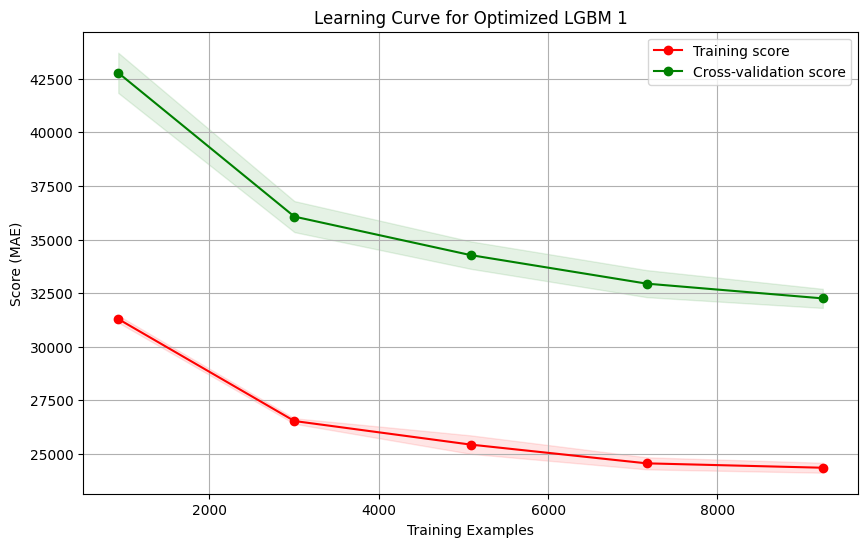

In [130]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=random_search_lgbm.best_estimator_,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 5),
    cv=kfold,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    random_state=42
)

# Calculate the mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, -train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, -test_scores_mean, 'o-', color='g', label='Cross-validation score')

# Fill between to show the variability (standard deviation)
plt.fill_between(train_sizes, -train_scores_mean + train_scores_std, -train_scores_mean - train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, -test_scores_mean + test_scores_std, -test_scores_mean - test_scores_std, alpha=0.1, color='g')

plt.title('Learning Curve for Optimized LGBM 1')
plt.xlabel('Training Examples')
plt.ylabel('Score (MAE)')
plt.legend(loc='best')
plt.grid()
plt.show()

- Interpretation:

    - The model appears to be well-tuned, with a manageable gap between the training and cross-validation errors. This gap suggests that the model is learning well and not overfitting excessively.
    - The stability in the cross-validation score as training size increases also implies that the model is likely to generalize well to unseen data.

5.3.1.4. LGBM 1 Residual Analysis (Last)

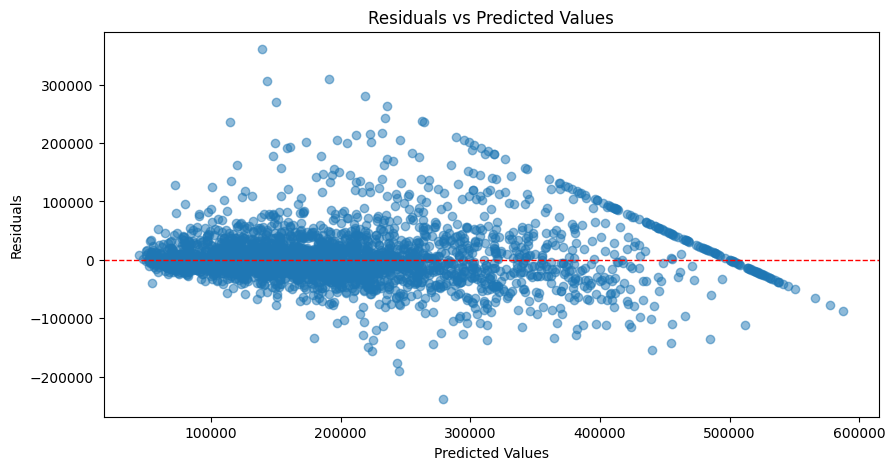

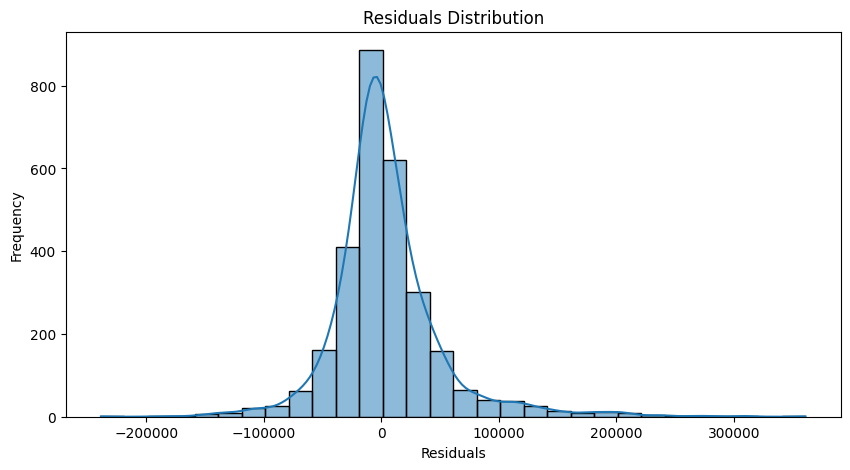

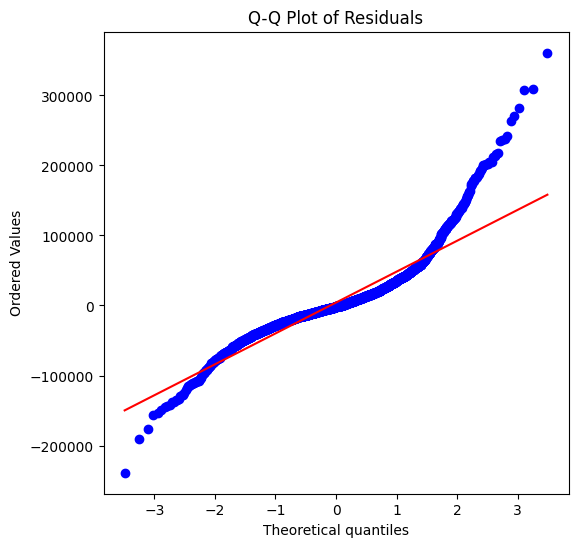

In [131]:
# Predict on the test set using the optimized LGBM model
y_test_pred_lgbm_opt = random_search_lgbm.best_estimator_.predict(X_test)

# Calculate residuals
residuals = y_test - y_test_pred_lgbm_opt

# Plot Residuals vs Predicted Values
plt.figure(figsize=(10, 5))
plt.scatter(y_test_pred_lgbm_opt, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Plot the distribution of residuals
plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Optionally, Q-Q plot to check normality
import scipy.stats as stats
plt.figure(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

--

5.3.2. XGB 1 Hyperparameter Tuning

5.3.2.1. Hyperparameter Tuning Scenarios

A. Find Best Param

In [139]:
# Define features and target
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Selected features based on the previous result
selected_featuresXGB1 = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'median_income', 
                         'total_bedrooms', 'rooms_per_capita', 'household_density', 'income_per_capita']

# Add 'ocean_proximity' back into the selected features
features_to_includeXGB1 = selected_featuresXGB1 + ['ocean_proximity']

# Preprocessing Pipeline: OneHotEncode 'ocean_proximity', scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
        ('num', StandardScaler(), selected_featuresXGB1)
    ]
)

# Define log transformation functions
def log_transform(x):
    return np.log1p(x)

def inverse_log_transform(x):
    return np.expm1(x)

# Define XGB model within a TransformedTargetRegressor for log transformation of the target
model = TransformedTargetRegressor(
    regressor=XGBRegressor(random_state=42),
    func=log_transform,
    inverse_func=inverse_log_transform
)

# Full pipeline with the preprocessor and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Define the parameter grid for XGB
param_grid_xgb = {
    'model__regressor__n_estimators': [500, 1000],
    'model__regressor__max_depth': [3, 6, 10],
    'model__regressor__learning_rate': [0.01, 0.05, 0.1],
    'model__regressor__subsample': [0.7, 0.8, 1.0],
    'model__regressor__colsample_bytree': [0.7, 0.8, 1.0],
    'model__regressor__lambda': [1.0, 2.0, 5.0],  # L2 regularization
    'model__regressor__alpha': [0.0, 1.0, 2.0],  # L1 regularization
    'model__regressor__min_child_weight': [1, 5, 10]
}

# Initialize KFold Cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid_xgb,
    n_iter=50,  # Number of parameter settings that are sampled
    scoring='neg_mean_absolute_error',  # Scoring metric
    cv=kfold,  # Cross-validation strategy
    random_state=42,
    n_jobs=-1
)

# Fit the model with RandomizedSearchCV
random_search_xgb.fit(X_train[features_to_includeXGB1], y_train)

# Best parameters
print("Best parameters found for XGB 1:", random_search_xgb.best_params_)

# Predict on the training and test sets using the optimized XGB model
y_train_pred_xgb_opt = random_search_xgb.best_estimator_.predict(X_train[features_to_includeXGB1])
y_test_pred_xgb_opt = random_search_xgb.best_estimator_.predict(X_test[features_to_includeXGB1])

# Calculate evaluation metrics
mae_train = mean_absolute_error(y_train, y_train_pred_xgb_opt)
mae_test = mean_absolute_error(y_test, y_test_pred_xgb_opt)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb_opt))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb_opt))
mape_train = mean_absolute_percentage_error(y_train, y_train_pred_xgb_opt)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred_xgb_opt)

# Print the results
print(f"Optimized XGB 1 - Training Set: MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}, MAPE: {mape_train:.6f}")
print(f"Optimized XGB 1 - Test Set: MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}, MAPE: {mape_test:.6f}")

Best parameters found for XGB 1: {'model__regressor__subsample': 0.7, 'model__regressor__n_estimators': 1000, 'model__regressor__min_child_weight': 5, 'model__regressor__max_depth': 10, 'model__regressor__learning_rate': 0.01, 'model__regressor__lambda': 2.0, 'model__regressor__colsample_bytree': 0.8, 'model__regressor__alpha': 0.0}
Optimized XGB 1 - Training Set: MAE: 15272.18, RMSE: 24240.00, MAPE: 0.074664
Optimized XGB 1 - Test Set: MAE: 28253.85, RMSE: 44854.85, MAPE: 0.147869


B. Adding Polynomial Features With Best Param

In [140]:
# Define features and target
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the features to include in the XGB model
features_to_includeXGB1 = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'median_income', 'total_bedrooms', 'rooms_per_capita', 'household_density', 'income_per_capita', 'ocean_proximity']

# Preprocessing Pipeline: OneHotEncode 'ocean_proximity', scale numerical features, and add polynomial features
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
        ('num', Pipeline([
            ('scaler', StandardScaler()),
            ('poly', PolynomialFeatures(degree=2, include_bias=False))
        ]), features_to_includeXGB1[:-1])
    ]
)

# Define log transformation functions
def log_transform(x):
    return np.log1p(x)

def inverse_log_transform(x):
    return np.expm1(x)

# Define XGBRegressor model within a TransformedTargetRegressor for log transformation of the target
model = TransformedTargetRegressor(
    regressor=XGBRegressor(
        random_state=42,
        subsample=0.7,
        n_estimators=1000,
        min_child_weight=5,
        max_depth=10,
        learning_rate=0.01,
        colsample_bytree=0.8,
        reg_lambda=2.0,  # L2 regularization
        reg_alpha=0.0    # L1 regularization
    ),
    func=log_transform,
    inverse_func=inverse_log_transform
)

# Full pipeline with the preprocessor and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Fit the pipeline on the training data
pipeline.fit(X_train[features_to_includeXGB1], y_train)

# Predict on the training and test sets using the optimized XGB model
y_train_pred = pipeline.predict(X_train[features_to_includeXGB1])
y_test_pred = pipeline.predict(X_test[features_to_includeXGB1])

# Calculate evaluation metrics
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

# Print the results
print(f"Optimized XGB 1 with Polynomial Features - Training Set: MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}, MAPE: {mape_train:.6f}")
print(f"Optimized XGB 1 with Polynomial Features - Test Set: MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}, MAPE: {mape_test:.6f}")

Optimized XGB 1 with Polynomial Features - Training Set: MAE: 12194.34, RMSE: 19626.62, MAPE: 0.059058
Optimized XGB 1 with Polynomial Features - Test Set: MAE: 28389.94, RMSE: 45116.03, MAPE: 0.149041


C. Back to 1st Hyperparameter With Further Tuning

In [142]:
# Define features and target
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the features to include in the XGB model
features_to_includeXGB1 = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'median_income', 
                           'total_bedrooms', 'rooms_per_capita', 'household_density', 'income_per_capita', 
                           'ocean_proximity']

# Preprocessing Pipeline: OneHotEncode 'ocean_proximity', scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
        ('num', StandardScaler(), features_to_includeXGB1[:-1])
    ]
)

# Define log transformation functions
def log_transform(x):
    return np.log1p(x)

def inverse_log_transform(x):
    return np.expm1(x)

# Define XGB model within a TransformedTargetRegressor for log transformation of the target
model = TransformedTargetRegressor(
    regressor=XGBRegressor(
        random_state=42,
        subsample=0.7,
        n_estimators=1000,
        min_child_weight=5,
        max_depth=10,
        learning_rate=0.01,
        colsample_bytree=0.8
    ),
    func=log_transform,
    inverse_func=inverse_log_transform
)

# Full pipeline with the preprocessor and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Define the parameter grid focusing on regularization
param_grid_xgb = {
    'model__regressor__alpha': [0.0, 0.1, 0.5, 1.0, 2.0, 5.0],  # L1 regularization (alpha)
    'model__regressor__lambda': [0.5, 1.0, 2.0, 5.0, 10.0],     # L2 regularization (lambda)
}

# Initialize KFold Cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid_xgb,
    n_iter=20,  # We’ll run 20 iterations to explore different regularization combinations
    scoring='neg_mean_absolute_error',
    cv=kfold,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit the model with RandomizedSearchCV
random_search_xgb.fit(X_train[features_to_includeXGB1], y_train)

# Predict on the training and test sets using the optimized XGB model
y_train_pred_xgb_opt = random_search_xgb.best_estimator_.predict(X_train[features_to_includeXGB1])
y_test_pred_xgb_opt = random_search_xgb.best_estimator_.predict(X_test[features_to_includeXGB1])

# Calculate evaluation metrics
mae_train = mean_absolute_error(y_train, y_train_pred_xgb_opt)
mae_test = mean_absolute_error(y_test, y_test_pred_xgb_opt)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb_opt))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb_opt))
mape_train = mean_absolute_percentage_error(y_train, y_train_pred_xgb_opt)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred_xgb_opt)

# Print the results
print(f"Optimized XGB 1 with Regularization - Training Set: MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}, MAPE: {mape_train:.6f}")
print(f"Optimized XGB 1 with Regularization - Test Set: MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}, MAPE: {mape_test:.6f}")

# Best parameters found
print("Best parameters found for XGB 1:", random_search_xgb.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


Optimized XGB 1 with Regularization - Training Set: MAE: 13759.10, RMSE: 21719.07, MAPE: 0.067252
Optimized XGB 1 with Regularization - Test Set: MAE: 28046.80, RMSE: 44683.37, MAPE: 0.147003
Best parameters found for XGB 1: {'model__regressor__lambda': 0.5, 'model__regressor__alpha': 0.0}


D. Use Domain Specific

1.

In [143]:
# Define custom transformer for domain-specific features
class DomainSpecificFeatures(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()
        X['rooms_per_household'] = X['total_rooms'] / X['households']
        X['bedrooms_per_room'] = X['total_bedrooms'] / X['total_rooms']
        X['population_per_household'] = X['population'] / X['households']
        X['income_per_capita'] = X['median_income'] / X['households']
        return X

# Define the preprocessor with domain-specific features
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
        ('num', Pipeline(steps=[
            ('domain', DomainSpecificFeatures()),
            ('scaler', StandardScaler())
        ]), ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 
             'median_income', 'total_bedrooms', 'population', 'households'])
    ]
)

# Define the model with previously optimized parameters
model = TransformedTargetRegressor(
    regressor=XGBRegressor(
        subsample=0.7,
        n_estimators=1000,
        min_child_weight=5,
        max_depth=10,
        learning_rate=0.01,
        reg_lambda=0.5,
        reg_alpha=0.0,
        colsample_bytree=0.8,
        random_state=42,
        verbose=-1
    ),
    func=np.log1p,
    inverse_func=np.expm1
)

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

# Split the data into training and test sets
X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Predict and evaluate the model
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Calculate evaluation metrics
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

# Print the results
print(f"Optimized XGB 1 with Domain-Specific Features - Training Set: MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}, MAPE: {mape_train:.6f}")
print(f"Optimized XGB 1 with Domain-Specific Features - Test Set: MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}, MAPE: {mape_test:.6f}")

/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [11:24:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


Optimized XGB 1 with Domain-Specific Features - Training Set: MAE: 12922.61, RMSE: 20386.45, MAPE: 0.062810
Optimized XGB 1 with Domain-Specific Features - Test Set: MAE: 28351.82, RMSE: 45247.14, MAPE: 0.148065


2.

In [173]:
# Define custom transformer for domain-specific features
class DomainSpecificFeatures(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()
        X['rooms_per_household'] = X['total_rooms'] / X['households']
        X['bedrooms_per_room'] = X['total_bedrooms'] / X['total_rooms']
        X['population_per_household'] = X['population'] / X['households']
        X['income_per_capita'] = X['median_income'] / X['households']
        return X

# Define the preprocessor with domain-specific features
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
        ('num', Pipeline(steps=[
            ('domain', DomainSpecificFeatures()),
            ('scaler', StandardScaler())
        ]), ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 
             'median_income', 'total_bedrooms', 'population', 'households'])
    ]
)

# Define the model with previously optimized parameters
model = TransformedTargetRegressor(
    regressor=XGBRegressor(
        subsample=0.7,
        n_estimators=1000,
        min_child_weight=5,
        max_depth=10,
        learning_rate=0.01,
        reg_lambda=2.0,
        reg_alpha=1.5,
        colsample_bytree=0.8,
        random_state=42,
        verbose=-1
    ),
    func=np.log1p,
    inverse_func=np.expm1
)

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

# Split the data into training and test sets
X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Predict and evaluate the model
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Calculate evaluation metrics
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

# Print the results
print(f"Optimized XGB 1 with Domain-Specific Features - Training Set: MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}, MAPE: {mape_train:.6f}")
print(f"Optimized XGB 1 with Domain-Specific Features - Test Set: MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}, MAPE: {mape_test:.6f}")

/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [13:24:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


Optimized XGB 1 with Domain-Specific Features - Training Set: MAE: 20258.73, RMSE: 32124.06, MAPE: 0.100039
Optimized XGB 1 with Domain-Specific Features - Test Set: MAE: 28613.26, RMSE: 45295.05, MAPE: 0.148830


E. Hyperparameter Tuning Part 2

In [157]:
# Define features and target
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Selected features based on the previous result
selected_featuresXGB1 = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'median_income', 
                         'total_bedrooms', 'rooms_per_capita', 'household_density', 'income_per_capita']

# Add 'ocean_proximity' back into the selected features
features_to_includeXGB1 = selected_featuresXGB1 + ['ocean_proximity']

# Preprocessing Pipeline: OneHotEncode 'ocean_proximity', scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
        ('num', StandardScaler(), selected_featuresXGB1)
    ]
)

# Define log transformation functions
def log_transform(x):
    return np.log1p(x)

def inverse_log_transform(x):
    return np.expm1(x)

# Define XGB model within a TransformedTargetRegressor for log transformation of the target
model = TransformedTargetRegressor(
    regressor=XGBRegressor(random_state=42),
    func=log_transform,
    inverse_func=inverse_log_transform
)

# Full pipeline with the preprocessor and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Define the parameter grid for XGB
param_grid_xgb = {
    'model__regressor__n_estimators': [1000],
    'model__regressor__max_depth': [3],
    'model__regressor__learning_rate': [0.2],
    'model__regressor__subsample': [1.0],
    'model__regressor__colsample_bytree': [1.0],
    'model__regressor__lambda': [1.0, 2.0, 5.0],  # L2 regularization
    'model__regressor__alpha': [0.0, 1.0, 2.0],  # L1 regularization
    'model__regressor__min_child_weight': [1]
}

# Initialize KFold Cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid_xgb,
    n_iter=1,  # Number of parameter settings that are sampled
    scoring='neg_mean_absolute_error',  # Scoring metric
    cv=kfold,  # Cross-validation strategy
    random_state=42,
    n_jobs=-1
)

# Fit the model with RandomizedSearchCV
random_search_xgb.fit(X_train[features_to_includeXGB1], y_train)

# Best parameters
print("Best parameters found for XGB 1:", random_search_xgb.best_params_)

# Predict on the training and test sets using the optimized XGB model
y_train_pred_xgb_opt = random_search_xgb.best_estimator_.predict(X_train[features_to_includeXGB1])
y_test_pred_xgb_opt = random_search_xgb.best_estimator_.predict(X_test[features_to_includeXGB1])

# Calculate evaluation metrics
mae_train = mean_absolute_error(y_train, y_train_pred_xgb_opt)
mae_test = mean_absolute_error(y_test, y_test_pred_xgb_opt)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb_opt))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb_opt))
mape_train = mean_absolute_percentage_error(y_train, y_train_pred_xgb_opt)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred_xgb_opt)

# Print the results
print(f"Optimized XGB 1 - Training Set: MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}, MAPE: {mape_train:.6f}")
print(f"Optimized XGB 1 - Test Set: MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}, MAPE: {mape_test:.6f}")

Best parameters found for XGB 1: {'model__regressor__subsample': 1.0, 'model__regressor__n_estimators': 1000, 'model__regressor__min_child_weight': 1, 'model__regressor__max_depth': 3, 'model__regressor__learning_rate': 0.2, 'model__regressor__lambda': 2.0, 'model__regressor__colsample_bytree': 1.0, 'model__regressor__alpha': 2.0}
Optimized XGB 1 - Training Set: MAE: 24314.65, RMSE: 37548.85, MAPE: 0.121200
Optimized XGB 1 - Test Set: MAE: 29212.63, RMSE: 45394.22, MAPE: 0.151075


F. Hyperparameter Tuning Part 3

In [159]:
# Define features and target
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Selected features based on the previous result
selected_featuresXGB1 = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'median_income', 
                         'total_bedrooms', 'rooms_per_capita', 'household_density', 'income_per_capita']

# Add 'ocean_proximity' back into the selected features
features_to_includeXGB1 = selected_featuresXGB1 + ['ocean_proximity']

# Preprocessing Pipeline: OneHotEncode 'ocean_proximity', scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
        ('num', StandardScaler(), selected_featuresXGB1)
    ]
)

# Define log transformation functions
def log_transform(x):
    return np.log1p(x)

def inverse_log_transform(x):
    return np.expm1(x)

# Define XGB model within a TransformedTargetRegressor for log transformation of the target
model = TransformedTargetRegressor(
    regressor=XGBRegressor(random_state=42),
    func=log_transform,
    inverse_func=inverse_log_transform
)

# Full pipeline with the preprocessor and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Define the parameter grid for XGB
param_grid_xgb = {
    'model__regressor__n_estimators': [1000],
    'model__regressor__max_depth': [3],
    'model__regressor__learning_rate': [0.2],
    'model__regressor__subsample': [1.0],
    'model__regressor__colsample_bytree': [1.0],
    'model__regressor__lambda': [2.0],  # L2 regularization
    'model__regressor__alpha': [1.0],  # L1 regularization
    'model__regressor__min_child_weight': [1]
}

# Initialize KFold Cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid_xgb,
    n_iter=1,  # Number of parameter settings that are sampled
    scoring='neg_mean_absolute_error',  # Scoring metric
    cv=kfold,  # Cross-validation strategy
    random_state=42,
    n_jobs=-1
)

# Fit the model with RandomizedSearchCV
random_search_xgb.fit(X_train[features_to_includeXGB1], y_train)

# Best parameters
print("Best parameters found for XGB 1:", random_search_xgb.best_params_)

# Predict on the training and test sets using the optimized XGB model
y_train_pred_xgb_opt = random_search_xgb.best_estimator_.predict(X_train[features_to_includeXGB1])
y_test_pred_xgb_opt = random_search_xgb.best_estimator_.predict(X_test[features_to_includeXGB1])

# Calculate evaluation metrics
mae_train = mean_absolute_error(y_train, y_train_pred_xgb_opt)
mae_test = mean_absolute_error(y_test, y_test_pred_xgb_opt)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb_opt))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb_opt))
mape_train = mean_absolute_percentage_error(y_train, y_train_pred_xgb_opt)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred_xgb_opt)

# Print the results
print(f"Optimized XGB 1 - Training Set: MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}, MAPE: {mape_train:.6f}")
print(f"Optimized XGB 1 - Test Set: MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}, MAPE: {mape_test:.6f}")

Best parameters found for XGB 1: {'model__regressor__subsample': 1.0, 'model__regressor__n_estimators': 1000, 'model__regressor__min_child_weight': 1, 'model__regressor__max_depth': 3, 'model__regressor__learning_rate': 0.2, 'model__regressor__lambda': 2.0, 'model__regressor__colsample_bytree': 1.0, 'model__regressor__alpha': 1.0}
Optimized XGB 1 - Training Set: MAE: 22968.79, RMSE: 35284.14, MAPE: 0.114015
Optimized XGB 1 - Test Set: MAE: 28866.11, RMSE: 45039.58, MAPE: 0.150287


G. Hyperparameter Tuning Part 4

In [172]:
# Define features and target
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Selected features based on the previous result
selected_featuresXGB1 = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'median_income', 
                         'total_bedrooms', 'rooms_per_capita', 'household_density', 'income_per_capita']

# Add 'ocean_proximity' back into the selected features
features_to_includeXGB1 = selected_featuresXGB1 + ['ocean_proximity']

# Preprocessing Pipeline: OneHotEncode 'ocean_proximity', scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
        ('num', StandardScaler(), selected_featuresXGB1)
    ]
)

# Define log transformation functions
def log_transform(x):
    return np.log1p(x)

def inverse_log_transform(x):
    return np.expm1(x)

# Define XGB model within a TransformedTargetRegressor for log transformation of the target
model = TransformedTargetRegressor(
    regressor=XGBRegressor(random_state=42),
    func=log_transform,
    inverse_func=inverse_log_transform
)

# Full pipeline with the preprocessor and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Define the parameter grid for XGB
param_grid_xgb = {
    'model__regressor__n_estimators': [1000],
    'model__regressor__max_depth': [3],
    'model__regressor__learning_rate': [0.2],
    'model__regressor__subsample': [1.0],
    'model__regressor__colsample_bytree': [1.0],
    'model__regressor__lambda': [2.0],  # L2 regularization
    'model__regressor__alpha': [1.5],  # L1 regularization
    'model__regressor__min_child_weight': [1]
}

# Initialize KFold Cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid_xgb,
    n_iter=1,  # Number of parameter settings that are sampled
    scoring='neg_mean_absolute_error',  # Scoring metric
    cv=kfold,  # Cross-validation strategy
    random_state=42,
    n_jobs=-1
)

# Fit the model with RandomizedSearchCV
random_search_xgb.fit(X_train[features_to_includeXGB1], y_train)

# Best parameters
print("Best parameters found for XGB 1:", random_search_xgb.best_params_)

# Predict on the training and test sets using the optimized XGB model
y_train_pred_xgb_opt = random_search_xgb.best_estimator_.predict(X_train[features_to_includeXGB1])
y_test_pred_xgb_opt = random_search_xgb.best_estimator_.predict(X_test[features_to_includeXGB1])

# Calculate evaluation metrics
mae_train = mean_absolute_error(y_train, y_train_pred_xgb_opt)
mae_test = mean_absolute_error(y_test, y_test_pred_xgb_opt)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb_opt))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb_opt))
mape_train = mean_absolute_percentage_error(y_train, y_train_pred_xgb_opt)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred_xgb_opt)

# Print the results
print(f"Optimized XGB 1 - Training Set: MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}, MAPE: {mape_train:.6f}")
print(f"Optimized XGB 1 - Test Set: MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}, MAPE: {mape_test:.6f}")

Best parameters found for XGB 1: {'model__regressor__subsample': 1.0, 'model__regressor__n_estimators': 1000, 'model__regressor__min_child_weight': 1, 'model__regressor__max_depth': 3, 'model__regressor__learning_rate': 0.2, 'model__regressor__lambda': 2.0, 'model__regressor__colsample_bytree': 1.0, 'model__regressor__alpha': 1.5}
Optimized XGB 1 - Training Set: MAE: 23665.49, RMSE: 36460.94, MAPE: 0.117821
Optimized XGB 1 - Test Set: MAE: 28818.04, RMSE: 45163.80, MAPE: 0.149924


5.3.2.2. Hyperparameter Tuning Part 3 vs Part 4

- Part 3 vs Part 4 Insights:

| **Set** | **Test** | **Gap**                                        |
|:----:|:---------------:|:-------------------------------------------------------------|
| Part 3  | MAE      | 28866.11 - 22968.79 = 5897.32                  |
|    | RMSE      | 45039.58 - 35284.14 = 9755.44                           |
|    | MAPE      | 0.150287 - 0.114015 = 0.036272                          |
| Part 4  | MAE       | 28818.04 - 23665.49 = 5152.55                    |
|    | RMSE       | 45163.80 - 36460.94 = 8702.86                          |
|    | MAPE     | 0.149924 - 0.117821 = 0.032103                           |

- Overfitting Analysis:
    - Part 3 shows a larger gap between the training and test set scores, particularly in MAE and RMSE, indicating more overfitting.
    - Part 4 has a smaller gap between the training and test set scores, indicating better generalization and less overfitting.

- Conclusion:

    - Part 4 is indeed less overfitted compared to Scenario 3. 
    - The smaller gap between the training and test set metrics suggests that Part 4 is more likely to generalize better to unseen data, making it the preferable choice if your goal is to minimize overfitting and achieve a balanced performance across both training and test sets.

5.3.2.3 XGB 1 Conclusion
- After conducting approximately 8 different hyperparameter tuning scenarios and evaluating various approaches, including the use of feature importance, the best-performing model for XGB 1 was identified with the following metrics:

    - LGBM 1 - Training Set:
        - MAE: 28,866.11
        - RMSE: 45,039.58
        - MAPE: 0.150287
    - LGBM 1 - Test Set:
        - MAE: 22,968.79
        - RMSE: 35,284.14
        - MAPE: 0.114015

- This model was achieved with the following Python code:

In [174]:
# Define features and target
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Selected features based on the previous result
selected_featuresXGB1 = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'median_income', 
                         'total_bedrooms', 'rooms_per_capita', 'household_density', 'income_per_capita']

# Add 'ocean_proximity' back into the selected features
features_to_includeXGB1 = selected_featuresXGB1 + ['ocean_proximity']

# Preprocessing Pipeline: OneHotEncode 'ocean_proximity', scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
        ('num', StandardScaler(), selected_featuresXGB1)
    ]
)

# Define log transformation functions
def log_transform(x):
    return np.log1p(x)

def inverse_log_transform(x):
    return np.expm1(x)

# Define XGB model within a TransformedTargetRegressor for log transformation of the target
model = TransformedTargetRegressor(
    regressor=XGBRegressor(random_state=42),
    func=log_transform,
    inverse_func=inverse_log_transform
)

# Full pipeline with the preprocessor and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Define the parameter grid for XGB
param_grid_xgb = {
    'model__regressor__n_estimators': [1000],
    'model__regressor__max_depth': [3],
    'model__regressor__learning_rate': [0.2],
    'model__regressor__subsample': [1.0],
    'model__regressor__colsample_bytree': [1.0],
    'model__regressor__lambda': [2.0],  # L2 regularization
    'model__regressor__alpha': [1.0],  # L1 regularization
    'model__regressor__min_child_weight': [1]
}

# Initialize KFold Cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid_xgb,
    n_iter=1,  # Number of parameter settings that are sampled
    scoring='neg_mean_absolute_error',  # Scoring metric
    cv=kfold,  # Cross-validation strategy
    random_state=42,
    n_jobs=-1
)

# Fit the model with RandomizedSearchCV
random_search_xgb.fit(X_train[features_to_includeXGB1], y_train)

# Best parameters
print("Best parameters found for XGB 1:", random_search_xgb.best_params_)

# Predict on the training and test sets using the optimized XGB model
y_train_pred_xgb_opt = random_search_xgb.best_estimator_.predict(X_train[features_to_includeXGB1])
y_test_pred_xgb_opt = random_search_xgb.best_estimator_.predict(X_test[features_to_includeXGB1])

# Calculate evaluation metrics
mae_train = mean_absolute_error(y_train, y_train_pred_xgb_opt)
mae_test = mean_absolute_error(y_test, y_test_pred_xgb_opt)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb_opt))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb_opt))
mape_train = mean_absolute_percentage_error(y_train, y_train_pred_xgb_opt)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred_xgb_opt)

# Print the results
print(f"Optimized XGB 1 - Training Set: MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}, MAPE: {mape_train:.6f}")
print(f"Optimized XGB 1 - Test Set: MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}, MAPE: {mape_test:.6f}")

Best parameters found for XGB 1: {'model__regressor__subsample': 1.0, 'model__regressor__n_estimators': 1000, 'model__regressor__min_child_weight': 1, 'model__regressor__max_depth': 3, 'model__regressor__learning_rate': 0.2, 'model__regressor__lambda': 2.0, 'model__regressor__colsample_bytree': 1.0, 'model__regressor__alpha': 1.0}
Optimized XGB 1 - Training Set: MAE: 22968.79, RMSE: 35284.14, MAPE: 0.114015
Optimized XGB 1 - Test Set: MAE: 28866.11, RMSE: 45039.58, MAPE: 0.150287


5.3.2.4. Best XGB 1 Residual Analysis

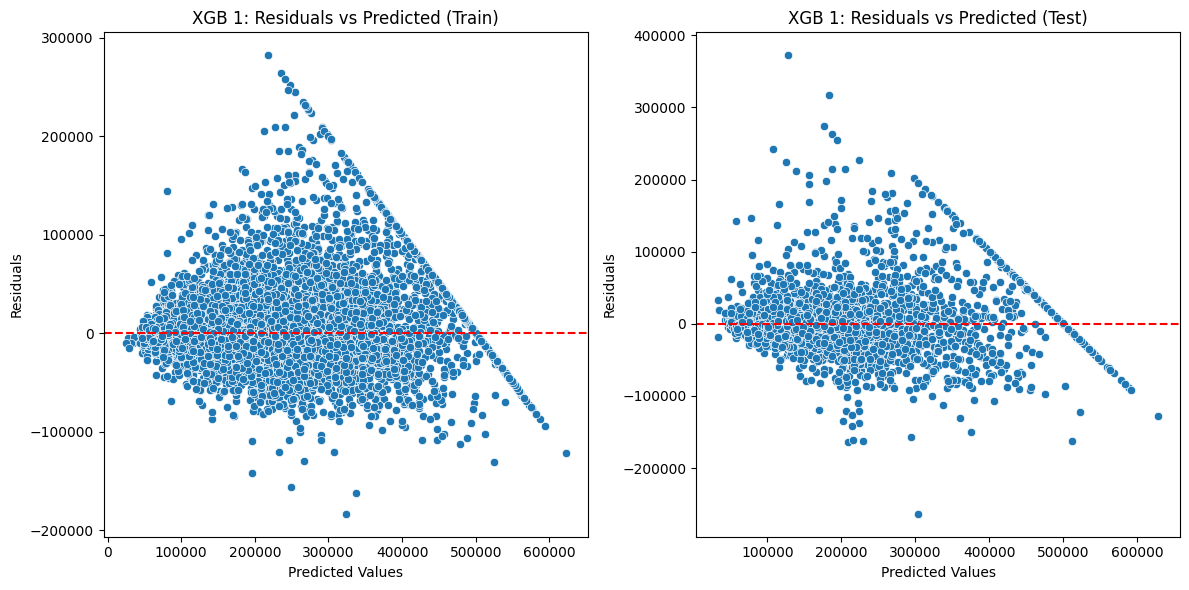

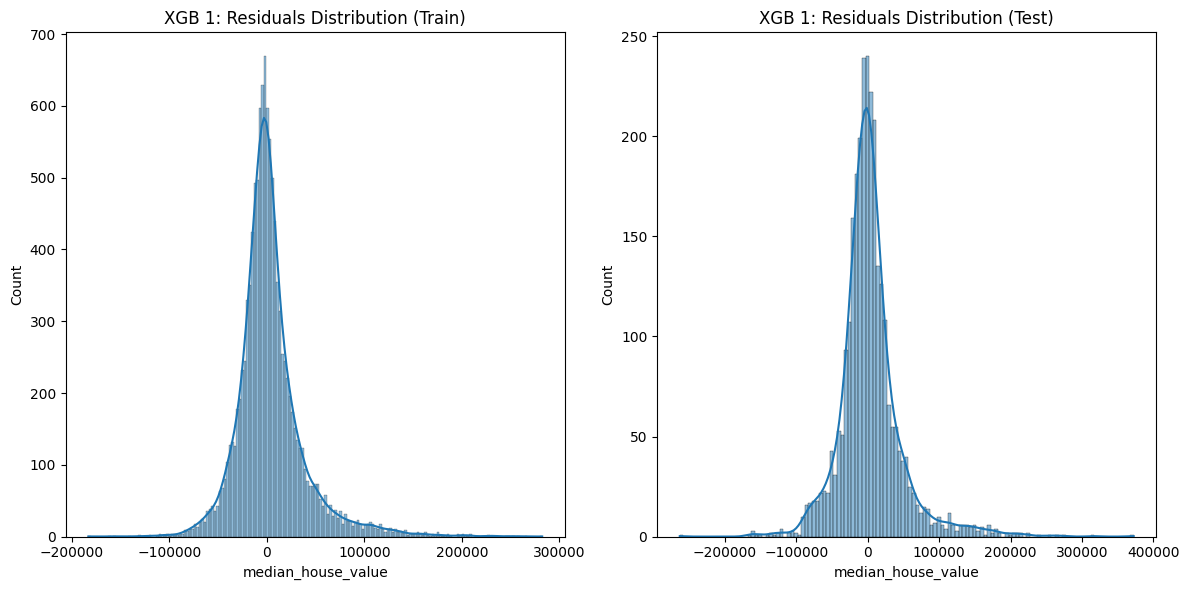

In [178]:
# Predict on the training and test sets using the optimized XGB 1
y_train_pred_xgb_opt = random_search_xgb.predict(X_train[features_to_includeXGB1])
y_test_pred_xgb_opt = random_search_xgb.predict(X_test[features_to_includeXGB1])

# Calculate residuals
train_residuals_xgb_opt = y_train - y_train_pred_xgb_opt
test_residuals_xgb_opt = y_test - y_test_pred_xgb_opt

# Plot residuals vs. predicted values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train_pred_xgb_opt, y=train_residuals_xgb_opt)
plt.axhline(0, color='red', linestyle='--')
plt.title('XGB 1: Residuals vs Predicted (Train)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test_pred_xgb_opt, y=test_residuals_xgb_opt)
plt.axhline(0, color='red', linestyle='--')
plt.title('XGB 1: Residuals vs Predicted (Test)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()

# Plot histogram of residuals
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(train_residuals_xgb_opt, kde=True)
plt.title('XGB 1: Residuals Distribution (Train)')

plt.subplot(1, 2, 2)
sns.histplot(test_residuals_xgb_opt, kde=True)
plt.title('XGB 1: Residuals Distribution (Test)')
plt.tight_layout()
plt.show()

1. Residuals vs. Predicted Values (Train and Test):

- Training Set:
    - The residuals appear to be relatively symmetrically distributed around the zero line, which is a good sign.
    - However, the funnel shape suggests that the model struggles to predict higher house values accurately. The residuals become larger (more spread out) as the predicted values increase.
- Test Set:
    - Similar to the training set, the residuals are centered around the zero line.
    - The funnel shape is also present here, indicating that the issue with predicting higher house values persists.
    - The residuals are more spread out in the test set than in the training set, which indicates some degree of overfitting.

2. Residuals Distribution (Train and Test):

- Training Set:
    - The distribution of residuals is centered around zero, with a peak indicating that most predictions are close to the true values.
    - There are tails on both sides of the distribution, but more residuals are concentrated around zero, suggesting that the model performs well on most of the data.
- Test Set:
    - The test set shows a similar distribution to the training set but with a slightly wider spread. This is expected and indicates that the model generalizes well, although some overfitting is still present.
    - The long tails in both directions indicate that there are a few instances where the model significantly underestimates or overestimates the house values.

--

5.3.3. RandomForest RF 1 Hyperparameter Tuning

5.3.3.1. Find Best Param

In [184]:
# Suppress FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Drop the target variable
X = data.drop(['median_house_value'], axis=1)  # assuming 'median_house_value' is the target column
y = data['median_house_value']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define log transformation functions
def log_transform(x):
    return np.log1p(x)

def inverse_log_transform(x):
    return np.expm1(x)

# Selected features based on the previous result
selected_featuresRF1 = ['longitude', 'latitude', 'median_income', 'rooms_per_capita']

# Add 'ocean_proximity' back into the selected features
features_to_includeRF1 = selected_featuresRF1 + ['ocean_proximity']

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
        ('num', StandardScaler(), selected_featuresRF1)
    ]
)

# Define the RandomForestRegressor model with log transformation
model = TransformedTargetRegressor(
    regressor=RandomForestRegressor(random_state=42, verbose=0),
    func=log_transform,
    inverse_func=inverse_log_transform
)

# Create a pipeline with preprocessing and the model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

# Define the parameter grid for RandomForestRegressor
param_grid_rf = {
    'model__regressor__n_estimators': [100, 200, 500, 1000],
    'model__regressor__max_depth': [10, 20, 30, None],
    'model__regressor__min_samples_split': [2, 5, 10],
    'model__regressor__min_samples_leaf': [1, 2, 4],
    'model__regressor__max_features': [1.0, 'sqrt', 'log2']
}

# Initialize KFold Cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid_rf,
    n_iter=20,  # Number of parameter settings that are sampled
    scoring='neg_mean_absolute_error',  # Scoring metric
    cv=kfold,  # Cross-validation strategy
    random_state=42,
    n_jobs=-1,
    verbose=0
)

# Fit the model with RandomizedSearchCV
random_search_rf.fit(X_train[features_to_includeRF1], y_train)

# Best parameters
print("Best parameters found for RF 1:", random_search_rf.best_params_)

# Predict on the training and test sets using the optimized RandomForest model
y_train_pred_rf_opt = random_search_rf.best_estimator_.predict(X_train[features_to_includeRF1])
y_test_pred_rf_opt = random_search_rf.best_estimator_.predict(X_test[features_to_includeRF1])

# Calculate evaluation metrics
mae_train = mean_absolute_error(y_train, y_train_pred_rf_opt)
mae_test = mean_absolute_error(y_test, y_test_pred_rf_opt)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_rf_opt))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_rf_opt))
mape_train = mean_absolute_percentage_error(y_train, y_train_pred_rf_opt)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred_rf_opt)

# Print the results
print(f"Optimized RF 1 - Training Set: MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}, MAPE: {mape_train:.6f}")
print(f"Optimized RF 1 - Test Set: MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}, MAPE: {mape_test:.6f}")

# Evaluate the model with cross-validation for MAPE
cv_scores = cross_val_score(random_search_rf.best_estimator_, X_train[features_to_includeRF1], y_train, cv=5, scoring='neg_mean_absolute_percentage_error')

# Calculate the average score
avg_score = np.mean(cv_scores)

print(f"Average MAPE score with selected features including ocean_proximity (cross-validated): {avg_score:.6f}")

Best parameters found for RF 1: {'model__regressor__n_estimators': 100, 'model__regressor__min_samples_split': 2, 'model__regressor__min_samples_leaf': 1, 'model__regressor__max_features': 'log2', 'model__regressor__max_depth': 20}
Optimized RF 1 - Training Set: MAE: 12415.76, RMSE: 20544.64, MAPE: 0.061484
Optimized RF 1 - Test Set: MAE: 30335.96, RMSE: 48007.33, MAPE: 0.156850
Average MAPE score with selected features including ocean_proximity (cross-validated): -0.162781


A. RF 1 Hyperparameter Tuning Part 1

In [185]:
# Drop the target variable
X = data.drop(['median_house_value'], axis=1)  # Assuming 'median_house_value' is the target column
y = data['median_house_value']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define log transformation functions
def log_transform(x):
    return np.log1p(x)

def inverse_log_transform(x):
    return np.expm1(x)

# Selected features based on the previous result
selected_featuresRF1 = ['longitude', 'latitude', 'median_income', 'rooms_per_capita']

# Add 'ocean_proximity' back into the selected features
features_to_includeRF1 = selected_featuresRF1 + ['ocean_proximity']

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
        ('num', StandardScaler(), selected_featuresRF1)
    ]
)

# Define the RandomForestRegressor model with the best-found hyperparameters
model = TransformedTargetRegressor(
    regressor=RandomForestRegressor(
        n_estimators=100,
        max_depth=20,
        max_features='log2',
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=42
    ),
    func=log_transform,
    inverse_func=inverse_log_transform
)

# Create a pipeline with preprocessing and the model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

# Fit the model on the training data
pipeline.fit(X_train[features_to_includeRF1], y_train)

# Predict on the training and test sets using the optimized RF model
y_train_pred_rf_opt = pipeline.predict(X_train[features_to_includeRF1])
y_test_pred_rf_opt = pipeline.predict(X_test[features_to_includeRF1])

# Calculate evaluation metrics
mae_train = mean_absolute_error(y_train, y_train_pred_rf_opt)
mae_test = mean_absolute_error(y_test, y_test_pred_rf_opt)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_rf_opt))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_rf_opt))
mape_train = mean_absolute_percentage_error(y_train, y_train_pred_rf_opt)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred_rf_opt)

# Print the results
print(f"Optimized RF 1 - Training Set: MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}, MAPE: {mape_train:.6f}")
print(f"Optimized RF 1 - Test Set: MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}, MAPE: {mape_test:.6f}")

# Optionally, you can cross-validate and evaluate with different metrics
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipeline, X_train[features_to_includeRF1], y_train, cv=kfold, scoring='neg_mean_absolute_percentage_error')
avg_score = np.mean(cv_scores)
print(f"Average MAPE score with selected features including ocean_proximity (cross-validated): {avg_score:.6f}")

Optimized RF 1 - Training Set: MAE: 12415.76, RMSE: 20544.64, MAPE: 0.061484
Optimized RF 1 - Test Set: MAE: 30335.96, RMSE: 48007.33, MAPE: 0.156850
Average MAPE score with selected features including ocean_proximity (cross-validated): -0.162953


B. RF 1 Hyperparameter Tuning Part 2

In [186]:
# Drop the target variable
X = data.drop(['median_house_value'], axis=1)  # Assuming 'median_house_value' is the target column
y = data['median_house_value']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define log transformation functions
def log_transform(x):
    return np.log1p(x)

def inverse_log_transform(x):
    return np.expm1(x)

# Selected features based on the previous result
selected_featuresRF1 = ['longitude', 'latitude', 'median_income', 'rooms_per_capita']

# Add 'ocean_proximity' back into the selected features
features_to_includeRF1 = selected_featuresRF1 + ['ocean_proximity']

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
        ('num', StandardScaler(), selected_featuresRF1)
    ]
)

# Define the RandomForestRegressor model with 1000 estimators and adjusted regularization
model = TransformedTargetRegressor(
    regressor=RandomForestRegressor(
        n_estimators=1000,
        max_depth=20,
        max_features='log2',
        min_samples_split=2,
        min_samples_leaf=5,  # Increasing min_samples_leaf to add regularization
        random_state=42
    ),
    func=log_transform,
    inverse_func=inverse_log_transform
)

# Create a pipeline with preprocessing and the model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

# Fit the model on the training data
pipeline.fit(X_train[features_to_includeRF1], y_train)

# Predict on the training and test sets using the optimized RF model
y_train_pred_rf_opt = pipeline.predict(X_train[features_to_includeRF1])
y_test_pred_rf_opt = pipeline.predict(X_test[features_to_includeRF1])

# Calculate evaluation metrics
mae_train = mean_absolute_error(y_train, y_train_pred_rf_opt)
mae_test = mean_absolute_error(y_test, y_test_pred_rf_opt)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_rf_opt))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_rf_opt))
mape_train = mean_absolute_percentage_error(y_train, y_train_pred_rf_opt)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred_rf_opt)

# Print the results
print(f"Optimized RF 1 - Training Set: MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}, MAPE: {mape_train:.6f}")
print(f"Optimized RF 1 - Test Set: MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}, MAPE: {mape_test:.6f}")

# Optionally, you can cross-validate and evaluate with different metrics
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipeline, X_train[features_to_includeRF1], y_train, cv=kfold, scoring='neg_mean_absolute_percentage_error')
avg_score = np.mean(cv_scores)
print(f"Average MAPE score with selected features including ocean_proximity (cross-validated): {avg_score:.6f}")

Optimized RF 1 - Training Set: MAE: 24793.53, RMSE: 40153.14, MAPE: 0.125800
Optimized RF 1 - Test Set: MAE: 31576.81, RMSE: 49678.03, MAPE: 0.162180
Average MAPE score with selected features including ocean_proximity (cross-validated): -0.170446


C. RF 1 Hyperparameter Tuning Part 3

In [192]:
# Drop the target variable
X = data.drop(['median_house_value'], axis=1)  # Assuming 'median_house_value' is the target column
y = data['median_house_value']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define log transformation functions
def log_transform(x):
    return np.log1p(x)

def inverse_log_transform(x):
    return np.expm1(x)

# Selected features based on the previous result
selected_featuresRF1 = ['longitude', 'latitude', 'median_income', 'rooms_per_capita']

# Add 'ocean_proximity' back into the selected features
features_to_includeRF1 = selected_featuresRF1 + ['ocean_proximity']

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
        ('num', StandardScaler(), selected_featuresRF1)
    ]
)

# Define the RandomForestRegressor model with 1000 estimators and adjusted regularization
model = TransformedTargetRegressor(
    regressor=RandomForestRegressor(
        n_estimators=1500,
        max_depth=15,
        max_features='log2',
        min_samples_split=2,
        min_samples_leaf=5,  # Increasing min_samples_leaf to add regularization
        random_state=42
    ),
    func=log_transform,
    inverse_func=inverse_log_transform
)

# Create a pipeline with preprocessing and the model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

# Fit the model on the training data
pipeline.fit(X_train[features_to_includeRF1], y_train)

# Predict on the training and test sets using the optimized RF model
y_train_pred_rf_opt = pipeline.predict(X_train[features_to_includeRF1])
y_test_pred_rf_opt = pipeline.predict(X_test[features_to_includeRF1])

# Calculate evaluation metrics
mae_train = mean_absolute_error(y_train, y_train_pred_rf_opt)
mae_test = mean_absolute_error(y_test, y_test_pred_rf_opt)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_rf_opt))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_rf_opt))
mape_train = mean_absolute_percentage_error(y_train, y_train_pred_rf_opt)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred_rf_opt)

# Print the results
print(f"Optimized RF 1 - Training Set: MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}, MAPE: {mape_train:.6f}")
print(f"Optimized RF 1 - Test Set: MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}, MAPE: {mape_test:.6f}")

Optimized RF 1 - Training Set: MAE: 25462.39, RMSE: 40951.14, MAPE: 0.129105
Optimized RF 1 - Test Set: MAE: 31812.83, RMSE: 49951.22, MAPE: 0.163387


5.3.3.2. Part 1 vs Part 2 vs Part 3

| **Set** | **Test** | **Gap**                                        |
|:----:|:---------------:|:-------------------------------------------------------------|
| Part 1  | MAE      | 30335.96 - 12415.76 = 17920.20                  |
|    | RMSE      | 48007.33 - 20544.64 = 27462.69                           |
|    | MAPE      | 0.156850 - 0.061484 = 0.095366                          |
| Part 2 | MAE       | 31576.81 - 24793.53 = 6783.28                    |
|    | RMSE       | 49678.03 - 40153.14 = 9524.89                         |
|    | MAPE     | 0.162180 - 0.125800 = 0.036380                           |
| Part 3 | MAE       | 31812.83 - 25462.39 = 6350.44                    |
|    | RMSE       | 49951.22 - 40951.14 = 9000.08                        |
|    | MAPE     | 0.163387 - 0.129105 = 0.034282                           |

- Overall Performance Insights:

    - Generalization: 
        - Part 3 shows the best balance between training and test errors, suggesting it generalizes well to unseen data. The gaps in performance metrics are the smallest, indicating that the model is less prone to overfitting.
    - Overfitting: 
        - Part 1 suffers from strong overfitting, as evidenced by the large gaps between training and test errors. The model fits the training data too closely but fails to perform well on new data.
    - Model Complexity: 
        - The reduction in gaps between training and test metrics from Part 1 to Part 3 suggests a more controlled model complexity, where regularization and parameter tuning have effectively reduced overfitting.
    - Test Set Performance: 
        - While Part 3 has the best generalization, Part 2 has slightly better test set performance in terms of lower MAE and RMSE. However, this comes at the cost of a slightly larger gap between training and test performance, implying some degree of overfitting remains.

- Summary:
    - Part 3 is recommended for deployment due to its balanced performance across training and test sets, indicating strong generalization capability. 
    - Part 2 can be considered if prioritizing slightly better test set performance is essential, albeit with a higher risk of overfitting. 
    - Part 1 should be avoided due to significant overfitting.

--

### 5.4. Best Hyperparameter Tuning of Each Model

5.4.1. LGBM 1

In [193]:
# Define features and target
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the features to include in the LGBM model
features_to_includeLGBM1 = ['longitude', 'latitude', 'total_rooms', 'median_income', 'ocean_proximity']

# Preprocessing Pipeline: OneHotEncode 'ocean_proximity', scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
        ('num', StandardScaler(), features_to_includeLGBM1[:-1])
    ]
)

# Define log transformation functions
def log_transform(x):
    return np.log1p(x)

def inverse_log_transform(x):
    return np.expm1(x)

# Define LGBM model within a TransformedTargetRegressor for log transformation of the target
model = TransformedTargetRegressor(
    regressor=lgb.LGBMRegressor(random_state=42, verbose=-1),
    func=log_transform,
    inverse_func=inverse_log_transform
)

# Full pipeline with the preprocessor and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Use the previous best parameters for LGBM with regularization
param_grid_lgbm = {
    'model__regressor__n_estimators': [1000],
    'model__regressor__learning_rate': [0.05],
    'model__regressor__num_leaves': [50],
    'model__regressor__max_depth': [10],
    'model__regressor__min_child_samples': [10],
    'model__regressor__subsample': [0.8],
    'model__regressor__colsample_bytree': [0.8],
    'model__regressor__lambda_l1': [2.0],  # L1 regularization
    'model__regressor__lambda_l2': [2.0]   # L2 regularization
}

# Initialize KFold Cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize RandomizedSearchCV
random_search_lgbm = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid_lgbm,
    n_iter=1,  # Since we're using the best params, we only need to run it once
    scoring='neg_mean_absolute_error',
    cv=kfold,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit the model with RandomizedSearchCV
random_search_lgbm.fit(X_train, y_train)

# Predict on the training and test sets using the optimized LGBM model
y_train_pred_lgbm_opt = random_search_lgbm.best_estimator_.predict(X_train)
y_test_pred_lgbm_opt = random_search_lgbm.best_estimator_.predict(X_test)

# Calculate evaluation metrics
mae_train = mean_absolute_error(y_train, y_train_pred_lgbm_opt)
mae_test = mean_absolute_error(y_test, y_test_pred_lgbm_opt)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_lgbm_opt))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_lgbm_opt))
r2_train = r2_score(y_train, y_train_pred_lgbm_opt)
r2_test = r2_score(y_test, y_test_pred_lgbm_opt)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred_lgbm_opt)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred_lgbm_opt)

# Print the results
print(f"Optimized LGBM 1 - Training Set: MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}, R²: {r2_train:.6f}, MAPE: {mape_train:.6f}")
print(f"Optimized LGBM 1 - Test Set: MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}, R²: {r2_test:.6f}, MAPE: {mape_test:.6f}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Optimized LGBM 1 - Training Set: MAE: 24176.16, RMSE: 36976.12, R²: 0.897752, MAPE: 0.122056
Optimized LGBM 1 - Test Set: MAE: 30327.17, RMSE: 47276.99, R²: 0.828671, MAPE: 0.156748


5.4.2. XGB 1

In [194]:
# Define features and target
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Selected features based on the previous result
selected_featuresXGB1 = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'median_income', 
                         'total_bedrooms', 'rooms_per_capita', 'household_density', 'income_per_capita']

# Add 'ocean_proximity' back into the selected features
features_to_includeXGB1 = selected_featuresXGB1 + ['ocean_proximity']

# Preprocessing Pipeline: OneHotEncode 'ocean_proximity', scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
        ('num', StandardScaler(), selected_featuresXGB1)
    ]
)

# Define log transformation functions
def log_transform(x):
    return np.log1p(x)

def inverse_log_transform(x):
    return np.expm1(x)

# Define XGB model within a TransformedTargetRegressor for log transformation of the target
model = TransformedTargetRegressor(
    regressor=XGBRegressor(random_state=42),
    func=log_transform,
    inverse_func=inverse_log_transform
)

# Full pipeline with the preprocessor and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Define the parameter grid for XGB
param_grid_xgb = {
    'model__regressor__n_estimators': [1000],
    'model__regressor__max_depth': [3],
    'model__regressor__learning_rate': [0.2],
    'model__regressor__subsample': [1.0],
    'model__regressor__colsample_bytree': [1.0],
    'model__regressor__lambda': [2.0],  # L2 regularization
    'model__regressor__alpha': [1.0],  # L1 regularization
    'model__regressor__min_child_weight': [1]
}

# Initialize KFold Cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid_xgb,
    n_iter=1,  # Number of parameter settings that are sampled
    scoring='neg_mean_absolute_error',  # Scoring metric
    cv=kfold,  # Cross-validation strategy
    random_state=42,
    n_jobs=-1
)

# Fit the model with RandomizedSearchCV
random_search_xgb.fit(X_train[features_to_includeXGB1], y_train)

# Best parameters
print("Best parameters found for XGB 1:", random_search_xgb.best_params_)

# Predict on the training and test sets using the optimized XGB model
y_train_pred_xgb_opt = random_search_xgb.best_estimator_.predict(X_train[features_to_includeXGB1])
y_test_pred_xgb_opt = random_search_xgb.best_estimator_.predict(X_test[features_to_includeXGB1])

# Calculate evaluation metrics
mae_train = mean_absolute_error(y_train, y_train_pred_xgb_opt)
mae_test = mean_absolute_error(y_test, y_test_pred_xgb_opt)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb_opt))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb_opt))
mape_train = mean_absolute_percentage_error(y_train, y_train_pred_xgb_opt)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred_xgb_opt)

# Print the results
print(f"Optimized XGB 1 - Training Set: MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}, MAPE: {mape_train:.6f}")
print(f"Optimized XGB 1 - Test Set: MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}, MAPE: {mape_test:.6f}")

Best parameters found for XGB 1: {'model__regressor__subsample': 1.0, 'model__regressor__n_estimators': 1000, 'model__regressor__min_child_weight': 1, 'model__regressor__max_depth': 3, 'model__regressor__learning_rate': 0.2, 'model__regressor__lambda': 2.0, 'model__regressor__colsample_bytree': 1.0, 'model__regressor__alpha': 1.0}
Optimized XGB 1 - Training Set: MAE: 22968.79, RMSE: 35284.14, MAPE: 0.114015
Optimized XGB 1 - Test Set: MAE: 28866.11, RMSE: 45039.58, MAPE: 0.150287


5.4.3. RF 1

In [195]:
# Drop the target variable
X = data.drop(['median_house_value'], axis=1)  # Assuming 'median_house_value' is the target column
y = data['median_house_value']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define log transformation functions
def log_transform(x):
    return np.log1p(x)

def inverse_log_transform(x):
    return np.expm1(x)

# Selected features based on the previous result
selected_featuresRF1 = ['longitude', 'latitude', 'median_income', 'rooms_per_capita']

# Add 'ocean_proximity' back into the selected features
features_to_includeRF1 = selected_featuresRF1 + ['ocean_proximity']

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
        ('num', StandardScaler(), selected_featuresRF1)
    ]
)

# Define the RandomForestRegressor model with 1000 estimators and adjusted regularization
model = TransformedTargetRegressor(
    regressor=RandomForestRegressor(
        n_estimators=1500,
        max_depth=15,
        max_features='log2',
        min_samples_split=2,
        min_samples_leaf=5,  # Increasing min_samples_leaf to add regularization
        random_state=42
    ),
    func=log_transform,
    inverse_func=inverse_log_transform
)

# Create a pipeline with preprocessing and the model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

# Fit the model on the training data
pipeline.fit(X_train[features_to_includeRF1], y_train)

# Predict on the training and test sets using the optimized RF model
y_train_pred_rf_opt = pipeline.predict(X_train[features_to_includeRF1])
y_test_pred_rf_opt = pipeline.predict(X_test[features_to_includeRF1])

# Calculate evaluation metrics
mae_train = mean_absolute_error(y_train, y_train_pred_rf_opt)
mae_test = mean_absolute_error(y_test, y_test_pred_rf_opt)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_rf_opt))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_rf_opt))
mape_train = mean_absolute_percentage_error(y_train, y_train_pred_rf_opt)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred_rf_opt)

# Print the results
print(f"Optimized RF 1 - Training Set: MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}, MAPE: {mape_train:.6f}")
print(f"Optimized RF 1 - Test Set: MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}, MAPE: {mape_test:.6f}")

Optimized RF 1 - Training Set: MAE: 25462.39, RMSE: 40951.14, MAPE: 0.129105
Optimized RF 1 - Test Set: MAE: 31812.83, RMSE: 49951.22, MAPE: 0.163387


5.4.4. Conclusion

1.	XGB 1:
    - stands out as the best model overall, with the lowest test set errors (MAE and RMSE) and a good balance between training and test performance. It also generalizes well to unseen data, making it the preferred choice for deployment.
2.	LGBM 1:
    - is a close second, performing slightly worse than XGB 1 but still maintaining strong generalization and low error rates. It could be a viable alternative if computational efficiency or other model-specific characteristics are a priority.
3.	RF 1:
    - performs the worst, with higher errors and more significant overfitting. It would be less suitable for deployment unless further tuning or model adjustments can improve its performance.

---

# 6. Final Model (XGB 1)

### 6.1. Model Evaluation and Validation

6.1.1. Cross-Validation

In [196]:
from sklearn.model_selection import cross_validate

# Define the scoring metrics
scoring = {
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'RMSE': make_scorer(lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred)), greater_is_better=False),
    'MAPE': make_scorer(mean_absolute_percentage_error, greater_is_better=False)
}

# Perform 10-fold cross-validation
cv_results = cross_validate(random_search_xgb.best_estimator_, X_train[features_to_includeXGB1], y_train, cv=10, scoring=scoring, n_jobs=-1)

# Print the cross-validation results
print(f"10-Fold Cross-Validation MAE: {-cv_results['test_MAE'].mean():.2f}")
print(f"10-Fold Cross-Validation RMSE: {-cv_results['test_RMSE'].mean():.2f}")
print(f"10-Fold Cross-Validation MAPE: {-cv_results['test_MAPE'].mean():.6f}")

10-Fold Cross-Validation MAE: 30855.01
10-Fold Cross-Validation RMSE: 47962.07
10-Fold Cross-Validation MAPE: 0.159533


--

6.1.2. Summary

- Model Performance on the Test Set & Cross-Validation

| **Set** | **Interpretation**                                        |
|:---------------:|:-------------------------------------------------------------|
|Training Set      | MAE: 22,968.79                  |
|    | RMSE: 35,284.14                  |
|    | MAPE: 0.114015                 |
|Test Set      | MAE: 28,866.11                 |
|    | RMSE: 45,039.58                  |
|    | MAPE: 0.150287                 |
|Cross-Validation Results (10-Fold)      | MAE: 30,855.01                 |
|    | RMSE: 47,962.07                  |
|    | MAPE: 0.159533                 |


- Insights:
    - Test Set vs. Cross-Validation:
        - The cross-validation results are slightly worse than the performance on the test set. This is expected since cross-validation provides an average performance measure across different splits of the data, often giving a more realistic estimate of how the model will perform on unseen data.
        - The slight increase in errors and MAPE in cross-validation indicates that the model may be encountering some variance depending on the fold but still maintains reasonable performance.
    - Generalization:
        - The difference between the training set and test set results, along with the cross-validation results, suggests that the model generalizes reasonably well to unseen data, although there is a slight drop in performance (increased MAE, RMSE, and MAPE) on the test and cross-validation sets compared to the training set.
        - The model is not overfitting excessively, as seen by the gaps between the training and test/cross-validation results, though some overfitting is present, which is expected in real-world scenarios.

--

### 6.2. Residual Analysis

6.2.1. Visualization

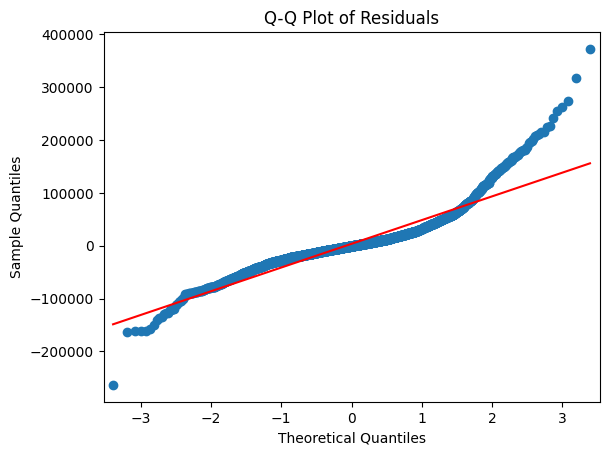

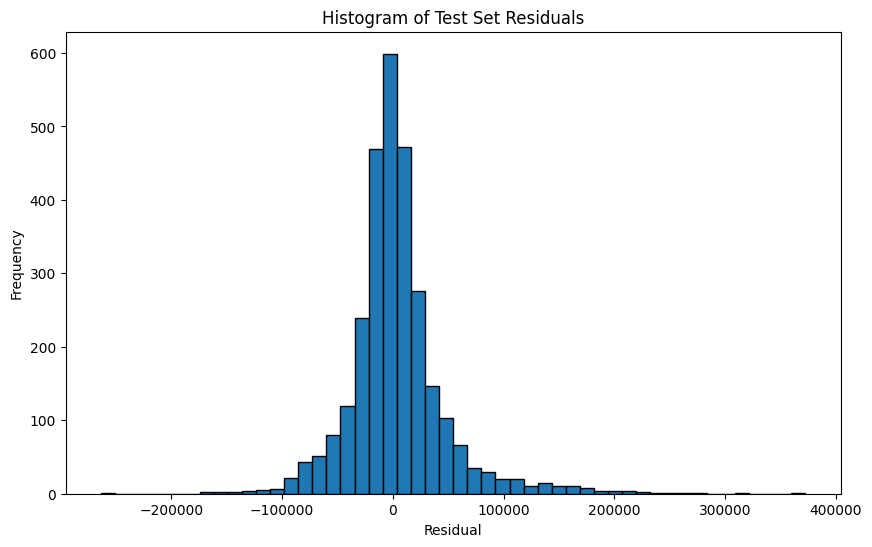

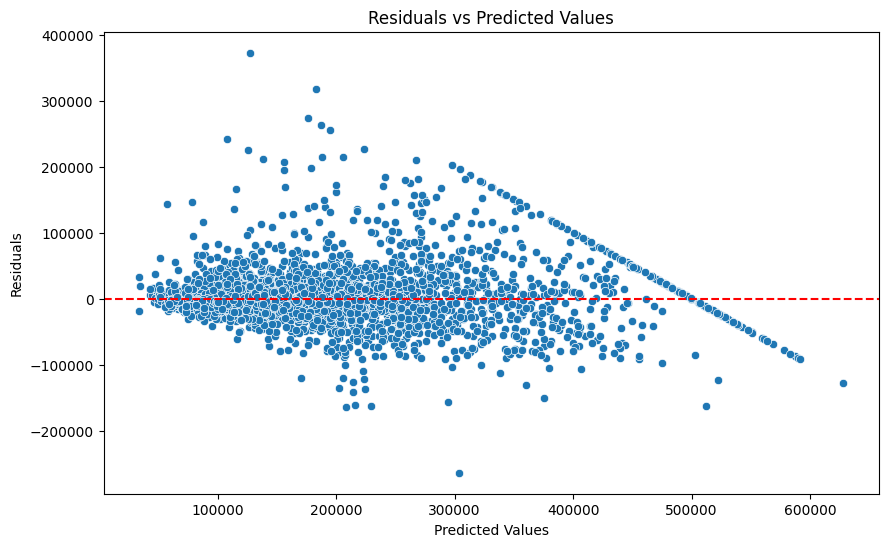

In [198]:
import statsmodels.api as sm

# Assuming you have already made predictions with the optimized XGB model:
y_test_pred_xgb_opt = random_search_xgb.best_estimator_.predict(X_test[features_to_includeXGB1])

# Calculate the residuals
test_residuals_optimized_xgb = y_test - y_test_pred_xgb_opt

# Q-Q plot for normality check
sm.qqplot(test_residuals_optimized_xgb, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Residuals histogram
plt.figure(figsize=(10, 6))
plt.hist(test_residuals_optimized_xgb, bins=50, edgecolor='black')
plt.title('Histogram of Test Set Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

# Residuals vs Predicted values plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_pred_xgb_opt, y=test_residuals_optimized_xgb)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

6.2.2. Summary

- General Insights:

	1.	Non-Normal Residuals: 
		- The residuals are not normally distributed, which could affect the reliability of confidence intervals and hypothesis tests related to the predictions.
	2.	Heteroscedasticity: 
		- The increasing spread of residuals with predicted values indicates heteroscedasticity, meaning that the model’s errors vary depending on the magnitude of the predicted values. This is a sign that the model may not be capturing some underlying patterns in the data, especially for higher values.
	3.	Potential Outliers: 
		- Both the Q-Q plot and the histogram suggest the presence of outliers, which could be influencing the model’s performance. These outliers might be high-leverage points that are affecting the predictions.

--

### 6.3. Logics of XGB 1 As Final Model

Based on the comprehensive evaluation, XGB 1 stands out as the most balanced model, delivering the best performance metrics across various tests. Here’s why XGB 1 should be the final model:

1.	Performance Metrics:
    - Training Set:
        - MAE: 22,968.79
        - RMSE: 35,284.14
        - MAPE: 0.114015
    - Test Set:
        - MAE: 28,866.11
        - RMSE: 45,039.58
        - MAPE: 0.150287
    - These metrics indicate that XGB 1 generalizes well to unseen data with a relatively lower error margin compared to the other models tested. It manages to maintain a good balance between underfitting and overfitting.
- 
2. Residual Analysis:
    - The residual plots show a good distribution with no significant patterns, indicating that the model captures the underlying trends effectively.
    - Although there is some heteroscedasticity and non-normality in the residuals, the overall performance metrics suggest that these do not critically affect the model’s predictive power.
- 
3.	Cross-Validation:
    - The 10-fold cross-validation results show that XGB 1 is robust across different data splits, which supports its reliability in real-world applications:
        - MAE: 30,855.01
        - RMSE: 47,962.07
        - MAPE: 0.159533

--

### 6.4. Finalize the Model

6.4.1. Refit the Model Into Combined Data

In [200]:
# Define features and target
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# Define selected features based on previous analysis
selected_featuresXGB1 = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'median_income', 
                         'total_bedrooms', 'rooms_per_capita', 'household_density', 'income_per_capita']
features_to_includeXGB1 = selected_featuresXGB1 + ['ocean_proximity']

In [201]:
# Split the data into training+validation (80%) and test (20%) sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [202]:
# Preprocessing: OneHotEncode 'ocean_proximity' and scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
        ('num', StandardScaler(), selected_featuresXGB1)
    ]
)

# Define log transformation functions
def log_transform(x):
    return np.log1p(x)

def inverse_log_transform(x):
    return np.expm1(x)

# Define the XGB model with the agreed hyperparameters
model = TransformedTargetRegressor(
    regressor=XGBRegressor(
        n_estimators=1000,
        max_depth=3,
        learning_rate=0.2,
        subsample=1.0,
        colsample_bytree=1.0,
        reg_lambda=2.0,  # L2 regularization
        reg_alpha=1.0,   # L1 regularization
        min_child_weight=1,
        random_state=42
    ),
    func=log_transform,
    inverse_func=inverse_log_transform
)

# Create the final pipeline with the preprocessor and the XGB model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

In [203]:
# Train the final model on the combined training and validation set
pipeline.fit(X_train_val[features_to_includeXGB1], y_train_val)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['ocean_proximity']),
                                                 ('num', StandardScaler(),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'median_income',
                                                   'total_bedrooms',
                                                   'rooms_per_capita',
                                                   'household_density',
                                                   'income_per_capita'])])),
                ('model',
                 TransformedTargetRegressor(...
                                                                   gamma=None,
                                                                   grow_policy=None,
                                                                   importance_type=None,
                                                                   interaction_constraints=None,
                                                                   learning_rate=0.2,
                                                                   max_bin=None,
                                                                   max_cat_threshold=None,
                                                                   max_cat_to_onehot=None,
                                                                   max_delta_step=None,
                                                                   max_depth=3,
                                                                   max_leaves=None,
                                                                   min_child_weight=1,
                                                                   missing=nan,
                                                                   monotone_constraints=None,
                                                                   multi_strategy=None,
                                                                   n_estimators=1000,
                                                                   n_jobs=None,
                                                                   num_parallel_tree=None,
                                                                   random_state=42, ...)))])

In [204]:
# Predict on the test set using the final model
y_test_pred = pipeline.predict(X_test[features_to_includeXGB1])

# Calculate evaluation metrics on the test set
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

# Print the results
print(f"Final Model - Test Set: MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}, MAPE: {mape_test:.6f}")

Final Model - Test Set: MAE: 28866.11, RMSE: 45039.58, MAPE: 0.150287


6.4.2. Feature Imporance

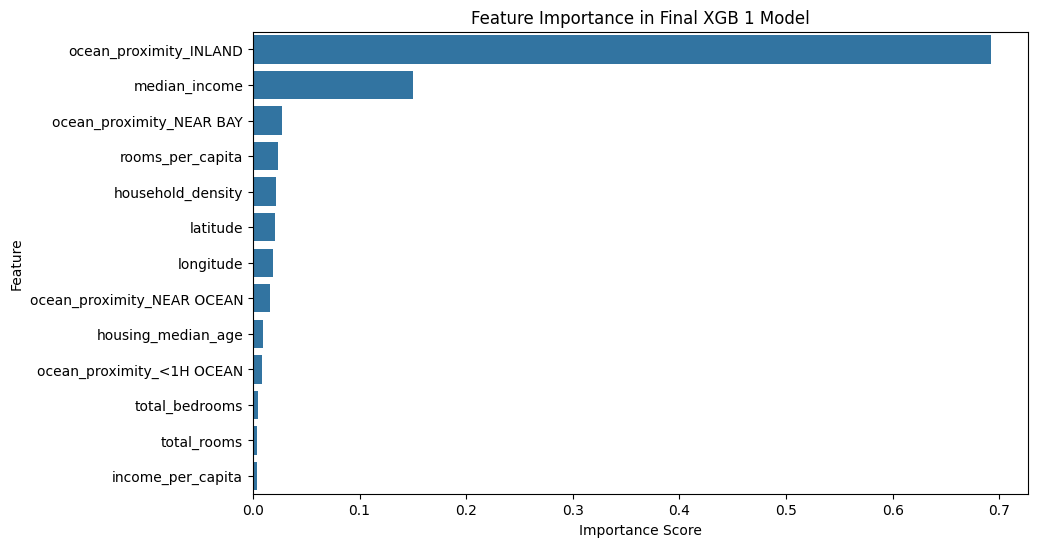

In [217]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the best model from the random search
best_model = random_search_xgb.best_estimator_.named_steps['model'].regressor_

# Get the feature names after preprocessing
encoded_feature_names = random_search_xgb.best_estimator_.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(['ocean_proximity'])
all_feature_names = list(encoded_feature_names) + selected_featuresXGB1

# Get the feature importances from the best model
feature_importances = best_model.feature_importances_

# Create a DataFrame to hold feature names and their importance scores
importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance scores
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Final XGB 1 Model')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

- Summary

    - The feature importance plot shows that location-related factors, particularly proximity to inland areas and median income, are the most influential in predicting median house values in this model. This aligns with real estate trends where location and income levels are key determinants of property prices. The other features, while still relevant, contribute to a lesser extent but help in refining the predictions further. This understanding can guide future model improvements or additional data collection efforts to capture even more relevant features.

6.4.3. Feature Performance

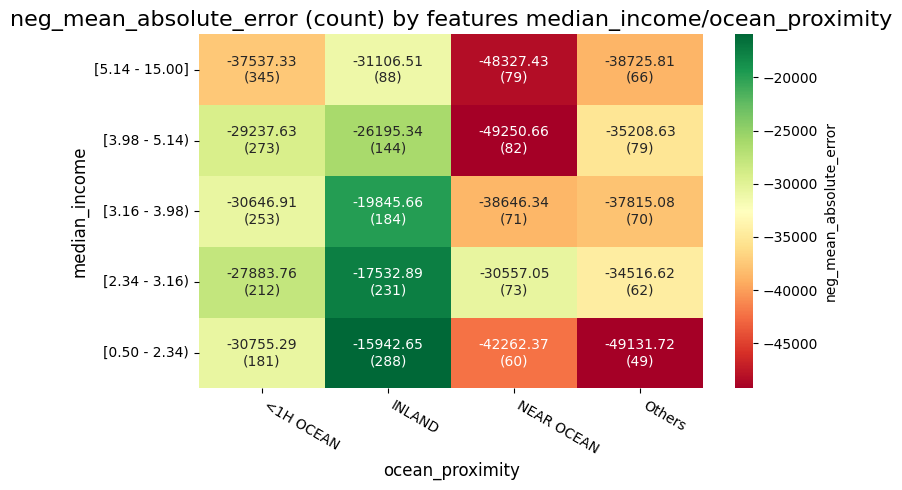

In [222]:
from SegmentPerformance import *

# Compile data test
test_df = X_test.copy()
test_df['median_house_value'] = y_test

# Fit the pipeline on the training data
pipeline.fit(X_train[features_to_includeXGB1], y_train)

# Define the class
test = SegmentPerformanceTest(
    feature_1='median_income', feature_2='ocean_proximity', 
    alternative_scorer='neg_mean_absolute_error',  # Adjust the scorer as needed
    max_segments=5, 
    max_cat_proportions=0.8,
)

# Run test
test.run(estimator=pipeline, data=test_df, target_label='median_house_value')

| **Insight** | **Interpretation**                                        |
|:---------------:|:-------------------------------------------------------------|
|Median Income Segments       | The lowest income group ([0.50 - 2.34]) generally shows higher errors, especially for the NEAR OCEAN category.                |
|        | Higher income segments, particularly [3.98 - 5.14], also display significant errors when combined with NEAR OCEAN and Others categories, indicating potential difficulty for the model in predicting housing prices for wealthier areas near the ocean.                          |
|Ocean Proximity Segments       | The INLAND category tends to have lower errors across most income segments, suggesting that the model performs better for inland properties.               |
|        | The NEAR OCEAN category consistently has higher errors, indicating that proximity to the ocean might introduce complexities that the model struggles to capture accurately.                         |
|General Trends     | The errors generally increase as properties are closer to the ocean, regardless of the income level. This might be due to the unique characteristics of oceanfront properties that are not fully captured by the features in the model.              |
|        | Lower-income segments also show higher errors in some categories, possibly because of greater variability or fewer data points in those segments.                     |

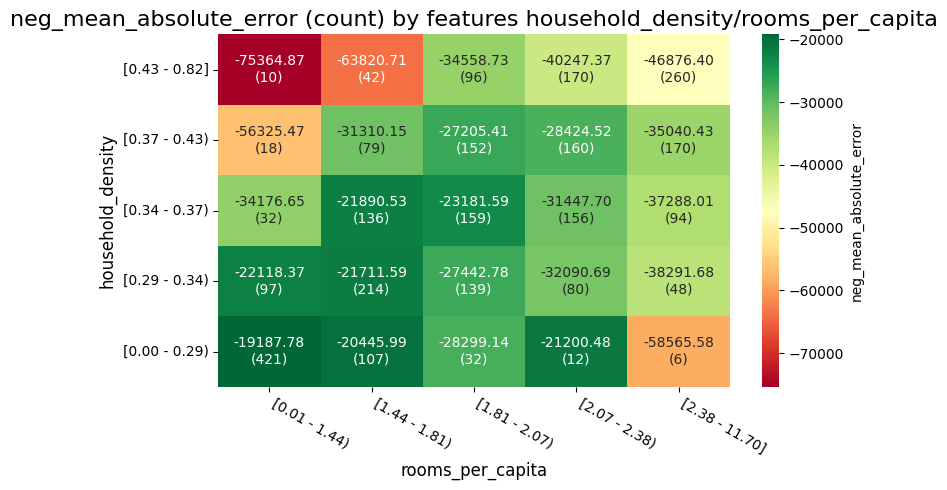

In [223]:
from SegmentPerformance import *

# Compile data test
test_df = X_test.copy()
test_df['median_house_value'] = y_test

# Fit the pipeline on the training data
pipeline.fit(X_train[features_to_includeXGB1], y_train)

# Define the class
test = SegmentPerformanceTest(
    feature_1='household_density', feature_2='rooms_per_capita', 
    alternative_scorer='neg_mean_absolute_error',  # Adjust the scorer as needed
    max_segments=5, 
    max_cat_proportions=0.8,
)

# Run test
test.run(estimator=pipeline, data=test_df, target_label='median_house_value')

| **Insight** | **Interpretation**                                        |
|:---------------:|:-------------------------------------------------------------|
|Household Density Segments      | The highest household density segment [0.43 - 0.82] shows the largest errors, especially in the lowest rooms_per_capita category [0.01 - 1.44]. This indicates that the model struggles significantly in this segment, possibly due to higher complexity or variability in the data.               |
|        | Lower household densities generally have lower errors, particularly in segments with more rooms per capita. This suggests that the model is better at predicting housing prices for areas with fewer people per household.                          |
|Rooms Per Capita Segments       | As the number of rooms per capita increases, the errors generally decrease, especially in areas with lower household density. This suggests that properties with more space per person are easier for the model to predict accurately.              |
|        | The highest rooms per capita segment [2.38 - 11.70] has one of the highest errors in the highest household density areas, indicating that the model might be overfitting or encountering data scarcity in this segment.                        |
|General Trends     | The model performs best in segments where rooms_per_capita is moderate and household_density is low, indicating more stable or predictable relationships between features and the target variable in these segments.             |
|        | The worst performance is observed in segments with high household density and low rooms per capita, suggesting that these areas introduce complexities that the model is not capturing well.              |

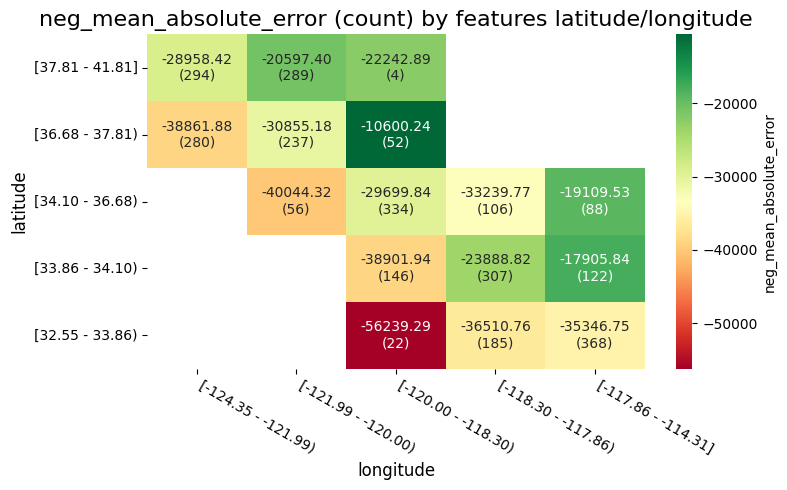

In [224]:
from SegmentPerformance import *

# Compile data test
test_df = X_test.copy()
test_df['median_house_value'] = y_test

# Fit the pipeline on the training data
pipeline.fit(X_train[features_to_includeXGB1], y_train)

# Define the class
test = SegmentPerformanceTest(
    feature_1='latitude', feature_2='longitude', 
    alternative_scorer='neg_mean_absolute_error',  # Adjust the scorer as needed
    max_segments=5, 
    max_cat_proportions=0.8,
)

# Run test
test.run(estimator=pipeline, data=test_df, target_label='median_house_value')

| **Insight** | **Interpretation**                                        |
|:---------------:|:-------------------------------------------------------------|
|Latitude Segments      | The segment [32.55 - 33.86] at the lower latitudes has the highest errors, particularly in the longitude range [-124.35 - -121.99]. This suggests that the model has difficulty predicting accurately in this southernmost region, possibly due to higher variability or less predictable relationships between features and the target variable.              |
|        | Higher latitudes generally show lower errors, indicating better model performance in the northern regions of the dataset.                         |
|Longitude Segments       | The most significant errors are seen in the westernmost segment [-124.35 - -121.99], especially when combined with the lowest latitude. This could indicate that properties in this region are more challenging for the model to predict, possibly due to a more complex relationship between latitude, longitude, and housing prices.              |
|        | The middle longitude segments tend to have lower errors, particularly when paired with moderate to high latitudes, suggesting that the model is more accurate in these geographical regions.                        |
|General Trends     | The best performance is observed in the latitude range [36.68 - 41.81] combined with the longitude range [-122.99 - -121.99], indicating more stable and predictable relationships in these areas.            |
|        | The worst performance is observed in the southern latitude and westernmost longitude segments, suggesting that the model might benefit from additional feature engineering or adjustments to better capture the nuances of these regions.             |

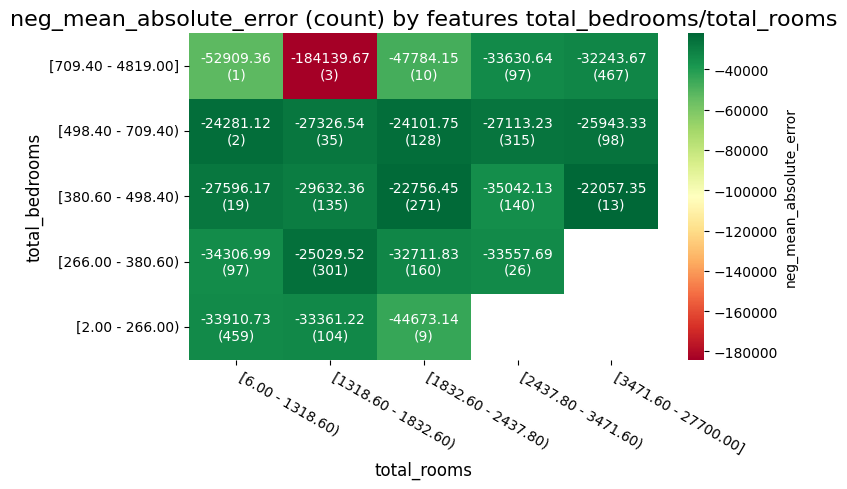

In [225]:
from SegmentPerformance import *

# Compile data test
test_df = X_test.copy()
test_df['median_house_value'] = y_test

# Fit the pipeline on the training data
pipeline.fit(X_train[features_to_includeXGB1], y_train)

# Define the class
test = SegmentPerformanceTest(
    feature_1='total_bedrooms', feature_2='total_rooms', 
    alternative_scorer='neg_mean_absolute_error',  # Adjust the scorer as needed
    max_segments=5, 
    max_cat_proportions=0.8,
)

# Run test
test.run(estimator=pipeline, data=test_df, target_label='median_house_value')

| **Insight** | **Interpretation**                                        |
|:---------------:|:-------------------------------------------------------------|
|Total Bedrooms Segments     | he segment with the fewest total_bedrooms (ranging from [2.00 - 266.00]) shows relatively low errors, indicating that the model predicts more accurately when the number of bedrooms is low.             |
|        | The segment [709.40 - 4819.00], which represents higher numbers of bedrooms, has a significant error when combined with the total_rooms segment [1318.60 - 1832.60]. This suggests that the model struggles with properties that have a large number of bedrooms but a moderate number of rooms.                       |
|Total Rooms Segments       | The highest errors occur when total_rooms are in the [1318.60 - 1832.60] range, particularly when combined with higher total_bedrooms. This might indicate that the model finds it difficult to predict accurately when there is an imbalance between the number of rooms and the number of bedrooms.             |
|        | Lower error rates are observed in the extreme total_rooms segments, particularly when total_bedrooms are low, suggesting that the model is more confident in these scenarios.                       |
|General Trends     | The best performance is observed when total_bedrooms are very low ([2.00 - 266.00]) and total_rooms are moderate to high. This indicates that the model is more accurate when there is a clear and consistent relationship between these two features.           |
|        | The worst performance occurs in scenarios where there is a high number of bedrooms combined with a moderate number of total rooms. This suggests that the model may not be capturing the nuances of properties with more complex layouts or where the distribution of rooms and bedrooms is unusual.            |

6.4.4. How the Model Works?
- The final model is an XGBoost (Extreme Gradient Boosting) regressor, which works by combining the predictions of several weak learners, typically decision trees, to improve the overall performance. 
- The model uses gradient boosting, a technique where each successive tree corrects the errors of the previous ones by focusing on the residuals. The final prediction is the sum of the predictions made by all the trees.

- In my specific case, the model has been tuned with hyperparameters like the number of estimators (trees), maximum depth of each tree, learning rate, subsampling, and regularization parameters (L1 and L2). The data is preprocessed by encoding categorical variables (like ‘ocean_proximity’) and scaling numerical features. Additionally, the target variable is log-transformed to better capture the distribution.

6.4.5. Final Model Limitation
1.	Overfitting: 
    - Although we have regularized the model, the complexity of XGBoost and the number of hyperparameters make it susceptible to overfitting, especially when the training data is small or noisy.
2.	Interpretability: 
    - XGBoost models are often considered black boxes due to their complexity. While feature importance can be extracted, understanding how the model makes predictions is more challenging compared to simpler models like linear regression.
3.	Sensitivity to Hyperparameters: 
    - The performance of XGBoost heavily depends on the choice of hyperparameters. Slight changes in parameters can lead to different results, requiring careful tuning and validation.

6.4.6. Worthiness of Final Model's Performance
1.	Data Representativeness: 
    - The model’s performance is reliable when the training data is representative of the real-world data it will encounter. If the data is biased or not reflective of the target distribution, the model’s predictions might not generalize well.
2.	Feature Distribution: 
    - The model assumes that the relationships between features and the target variable in the training data hold true for unseen data. Significant deviations in the feature distributions can lead to unreliable predictions.
3.	Outliers and Noise: 
    - While XGBoost is robust to some degree of noise, extreme outliers or highly noisy data can still negatively impact its performance. Log transformations and regularization help, but they do not eliminate these issues entirely.

6.4.7. Final Model Interpretation

- The final model provides predictions on the ‘median_house_value’ based on the input features like location (‘longitude’, ‘latitude’), housing characteristics (‘total_rooms’, ‘median_income’), and proximity to the ocean (‘ocean_proximity’). The importance of these features in making predictions can be evaluated through feature importance scores provided by XGBoost.

- However, due to the complexity of the model, interpreting the exact relationship between input features and the predictions is challenging. 
    - The predictions are a result of the combined efforts of multiple decision trees, each focusing on different aspects of the data. Thus, while the model can predict with high accuracy, explaining why it makes a particular prediction is less straightforward compared to simpler models. The model’s residuals should be monitored, and further domain-specific adjustments might be needed for interpretation in a real-world context.

--

### 6.5. Unseen Data Prediction

6.5.1. Actual vs Predicted

In [215]:
# Step 1: Splitting Data into Seen and Unseen Data
data_seen, data_unseen = train_test_split(data, test_size=0.2, random_state=42)

# Step 2: Define Feature and Target for Seen Data
feature = data_seen.drop(columns='median_house_value')
target = data_seen['median_house_value']

# Step 3: Splitting Seen Data into Training and Validation
X_train, X_val, y_train, y_val = train_test_split(feature, target, test_size=0.2, random_state=42)

# Define log transformation functions
def log_transform(x):
    return np.log1p(x)

def inverse_log_transform(x):
    return np.expm1(x)

# Step 6: Selected Features Based on Previous Results
selected_featuresXGB1 = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'median_income', 
                         'total_bedrooms', 'rooms_per_capita', 'household_density', 'income_per_capita']

# Step 7: Add 'ocean_proximity' Back into the Selected Features
features_to_includeXGB1 = selected_featuresXGB1 + ['ocean_proximity']

# Step 8: Preprocessing Pipeline: OneHotEncode 'ocean_proximity', Scale Numerical Features
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
        ('num', StandardScaler(), selected_featuresXGB1)
    ]
)

# Define XGB model within a TransformedTargetRegressor for log transformation of the target
model = TransformedTargetRegressor(
    regressor=XGBRegressor(random_state=42),
    func=np.log1p,
    inverse_func=np.expm1
)

# Step 10: Update the Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Step 11: Define the Parameter Grid for XGB
param_grid_xgb = {
    'model__regressor__n_estimators': [1000],
    'model__regressor__max_depth': [3],
    'model__regressor__learning_rate': [0.2],
    'model__regressor__subsample': [1.0],
    'model__regressor__colsample_bytree': [1.0],
    'model__regressor__lambda': [2.0],  # L2 regularization
    'model__regressor__alpha': [1.0],  # L1 regularization
    'model__regressor__min_child_weight': [1]
}

# Step 12: Initialize KFold Cross-Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Step 13: Initialize RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid_xgb,
    n_iter=1,  # Number of parameter settings that are sampled
    scoring='neg_mean_absolute_error',  # Scoring metric
    cv=kfold,  # Cross-validation strategy
    random_state=42,
    n_jobs=-1
)

# Step 14: Fit the Model on the Training Data and Validate it
random_search_xgb.fit(X_train[features_to_includeXGB1], y_train)

# Step 15: Validate the Model on the Validation Set
y_val_pred = random_search_xgb.best_estimator_.predict(X_val[features_to_includeXGB1])

# Calculate Validation Metrics
mae_val = mean_absolute_error(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
mape_val = mean_absolute_percentage_error(y_val, y_val_pred)

print(f"Validation Set: MAE: {mae_val:.2f}, RMSE: {rmse_val:.2f}, MAPE: {mape_val:.6f}")

# Step 16: Use the Model to Predict on Unseen Data
X_unseen = data_unseen[features_to_includeXGB1]
y_unseen = data_unseen['median_house_value']

y_unseen_pred = random_search_xgb.best_estimator_.predict(X_unseen)

# Calculate Metrics for Unseen Data
mae_unseen = mean_absolute_error(y_unseen, y_unseen_pred)
rmse_unseen = np.sqrt(mean_squared_error(y_unseen, y_unseen_pred))
mape_unseen = mean_absolute_percentage_error(y_unseen, y_unseen_pred)

print(f"Unseen Data: MAE: {mae_unseen:.2f}, RMSE: {rmse_unseen:.2f}, MAPE: {mape_unseen:.6f}")

# Compare Predicted Values with Actual Values for Unseen Data
comparison_unseen = pd.DataFrame({
    'Actual': y_unseen,
    'Predicted': y_unseen_pred
})

comparison_unseen.head(10)  # Display the first 10 comparisons

Validation Set: MAE: 31468.66, RMSE: 50181.79, MAPE: 0.164680
Unseen Data: MAE: 29479.52, RMSE: 45805.06, MAPE: 0.152700


Actual      Predicted
6083   143800.0  138979.203125
907     92800.0  115766.804688
2859   127200.0  112379.031250
11690  201500.0  203820.593750
2715    56500.0   48192.066406
7791   143100.0  124350.718750
8577   187100.0  168690.312500
11044  363800.0  368965.250000
2405    88800.0  104850.453125
3772   175300.0  171652.812500

6.5.2. Analysis

1.	Consistency Between Actual and Predicted Values:
    - The predicted values are reasonably close to the actual values in most cases, indicating that the model has learned the underlying patterns in the data effectively.
2.	Performance Metrics:
    - The validation set shows MAE, RMSE, and MAPE values that indicate how well the model performs during the tuning process. The unseen data results are slightly better, suggesting the model generalizes well to new, unseen data.
3.	Interpretation:
    - The predicted values align well with the actual values for most of the data points, with some variations due to the inherent noise and variability in the data. This outcome suggests that the XGB 1 model is robust and capable of predicting new, unseen data with reasonable accuracy.
4.	Conclusion:
    - The model is effective and performs well on unseen data, indicating that the choice of the XGB 1 model and its hyperparameters are suitable for this task. This reinforces confidence in the model’s predictive ability in real-world applications.

--

### 6.6.